**Youtube Trending Section Analysis - USA**

The trending section of youtube is one of the most active social platforms on the internet today. The videos on the trending section are updated daily, which gives generates a lot of data with regards to views x likes x dislikes x comments. This current USA dataset is spanning over 205 Days, and contains over 40,000 trending videos.''

**Goal:** The goal of the analysis is to get an insight into what runs the youtube trending section, by comparing videos and video data in the dataset against each other.

**Assumption:** More views come with more likes, comments and dislikes. 

**Data Aquisition:** Youtube API, Exisiting Databases

Start of the Analysis

**List of Imports**

Before we begin we need to import all the packages we need for Data analysis which in our case are mainly python pandas and tools to visualize our data for which we use matplotlib.

In [99]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud 
from wordcloud import WordCloud, STOPWORDS
import json
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

Now we set parameters to beautify our visualizations to give us a consitent and clear way to analyse the data further.

In [2]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

**Reading the Dataset**

The dataset we have the file format of .csv, a comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. We also have a .json file with the information on the different categories of the Trending section of Youtube. We compare the category ID in the csv file to the list of categories in the json file and map the corresponding categories to a new column in the csv file called category name.

In [3]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/USvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

**Data Exploration**

First we explore the csv files to see the different columns and data we have. 

The Data Skeleton includes:
1. Video ID
2. Trending date
3. Title
4. Channel title
5. Category ID 
6. Publish  time
7. Tags 
8. Views 
9. Likes 
10. Dislikes 
11. Comments count 
12. Description
13. Category name

In [4]:
df.head(5)

trending_date                                              title  \
video_id                                                                       
2kyS6SvSYSE      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1ZAPwfrtAFY      17.14.11  The Trump Presidency: Last Week Tonight with J...   
5qpjK5DgCt4      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
puqaWrEC7tY      17.14.11                   Nickelback Lyrics: Real or Fake?   
d380meD0W0M      17.14.11                           I Dare You: GOING BALD!?   

                     channel_title  category_id              publish_time  \
video_id                                                                    
2kyS6SvSYSE           CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1ZAPwfrtAFY        LastWeekTonight           24  2017-11-13T07:30:00.000Z   
5qpjK5DgCt4           Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
puqaWrEC7tY  Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
d380meD0W0M               nigahiga           24  2017-11-12T18:01:41.000Z   

                                                          tags    views  \
video_id                                                                  
2kyS6SvSYSE                                    SHANtell martin   748374   
1ZAPwfrtAFY  last week tonight trump presidency|"last week ...  2418783   
5qpjK5DgCt4  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434   
puqaWrEC7tY  rhett and link|"gmm"|"good mythical morning"|"...   343168   
d380meD0W0M  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731   

              likes  dislikes  comment_count  \
video_id                                       
2kyS6SvSYSE   57527      2966          15954   
1ZAPwfrtAFY   97185      6146          12703   
5qpjK5DgCt4  146033      5339           8181   
puqaWrEC7tY   10172       666           2146   
d380meD0W0M  132235      1989          17518   

                                             thumbnail_link  \
video_id                                                      
2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
puqaWrEC7tY  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
2kyS6SvSYSE              False             False                   False   
1ZAPwfrtAFY              False             False                   False   
5qpjK5DgCt4              False             False                   False   
puqaWrEC7tY              False             False                   False   
d380meD0W0M              False             False                   False   

                                                   description   category_name  
video_id                                                                        
2kyS6SvSYSE  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs  
1ZAPwfrtAFY  One year after the presidential election, John...   Entertainment  
5qpjK5DgCt4  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy  
puqaWrEC7tY  Today we find out if Link is a Nickelback amat...   Entertainment  
d380meD0W0M  I know it's been a while since we did this sho...   Entertainment

**Exploring the different Categories set (Json)**

Similarly, lets check the content of the categories file to see if the list of all categories is present in the data, and how they are represented. 

In [5]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Lets check how the category ID maps to the Category name in the Dataframe.

In [6]:
df[['category_id', 'category_name']].head()

category_id   category_name
video_id                                
2kyS6SvSYSE           22  People & Blogs
1ZAPwfrtAFY           24   Entertainment
5qpjK5DgCt4           23          Comedy
puqaWrEC7tY           24   Entertainment
d380meD0W0M           24   Entertainment

Some information about the dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 16 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


The initial look into the Data frame shows us that there are **40949 rows** of data spanning over 16 columns. We can all see all the columns are full except one i.e Description which has around 40379 non null rows. So Description has some null values that we may need to filter to as part of the **Data cleaning** process.

Let's check the total values in different categories.

In [8]:
category_count = df['category_name'].value_counts()
category_count

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_name, dtype: int64

**Analysis:**

We can see that for this dataset, the most number of videos are from the Entertainment Category, followed by music. The least number is shared by Shows and Nonprofit/Activism videos category.

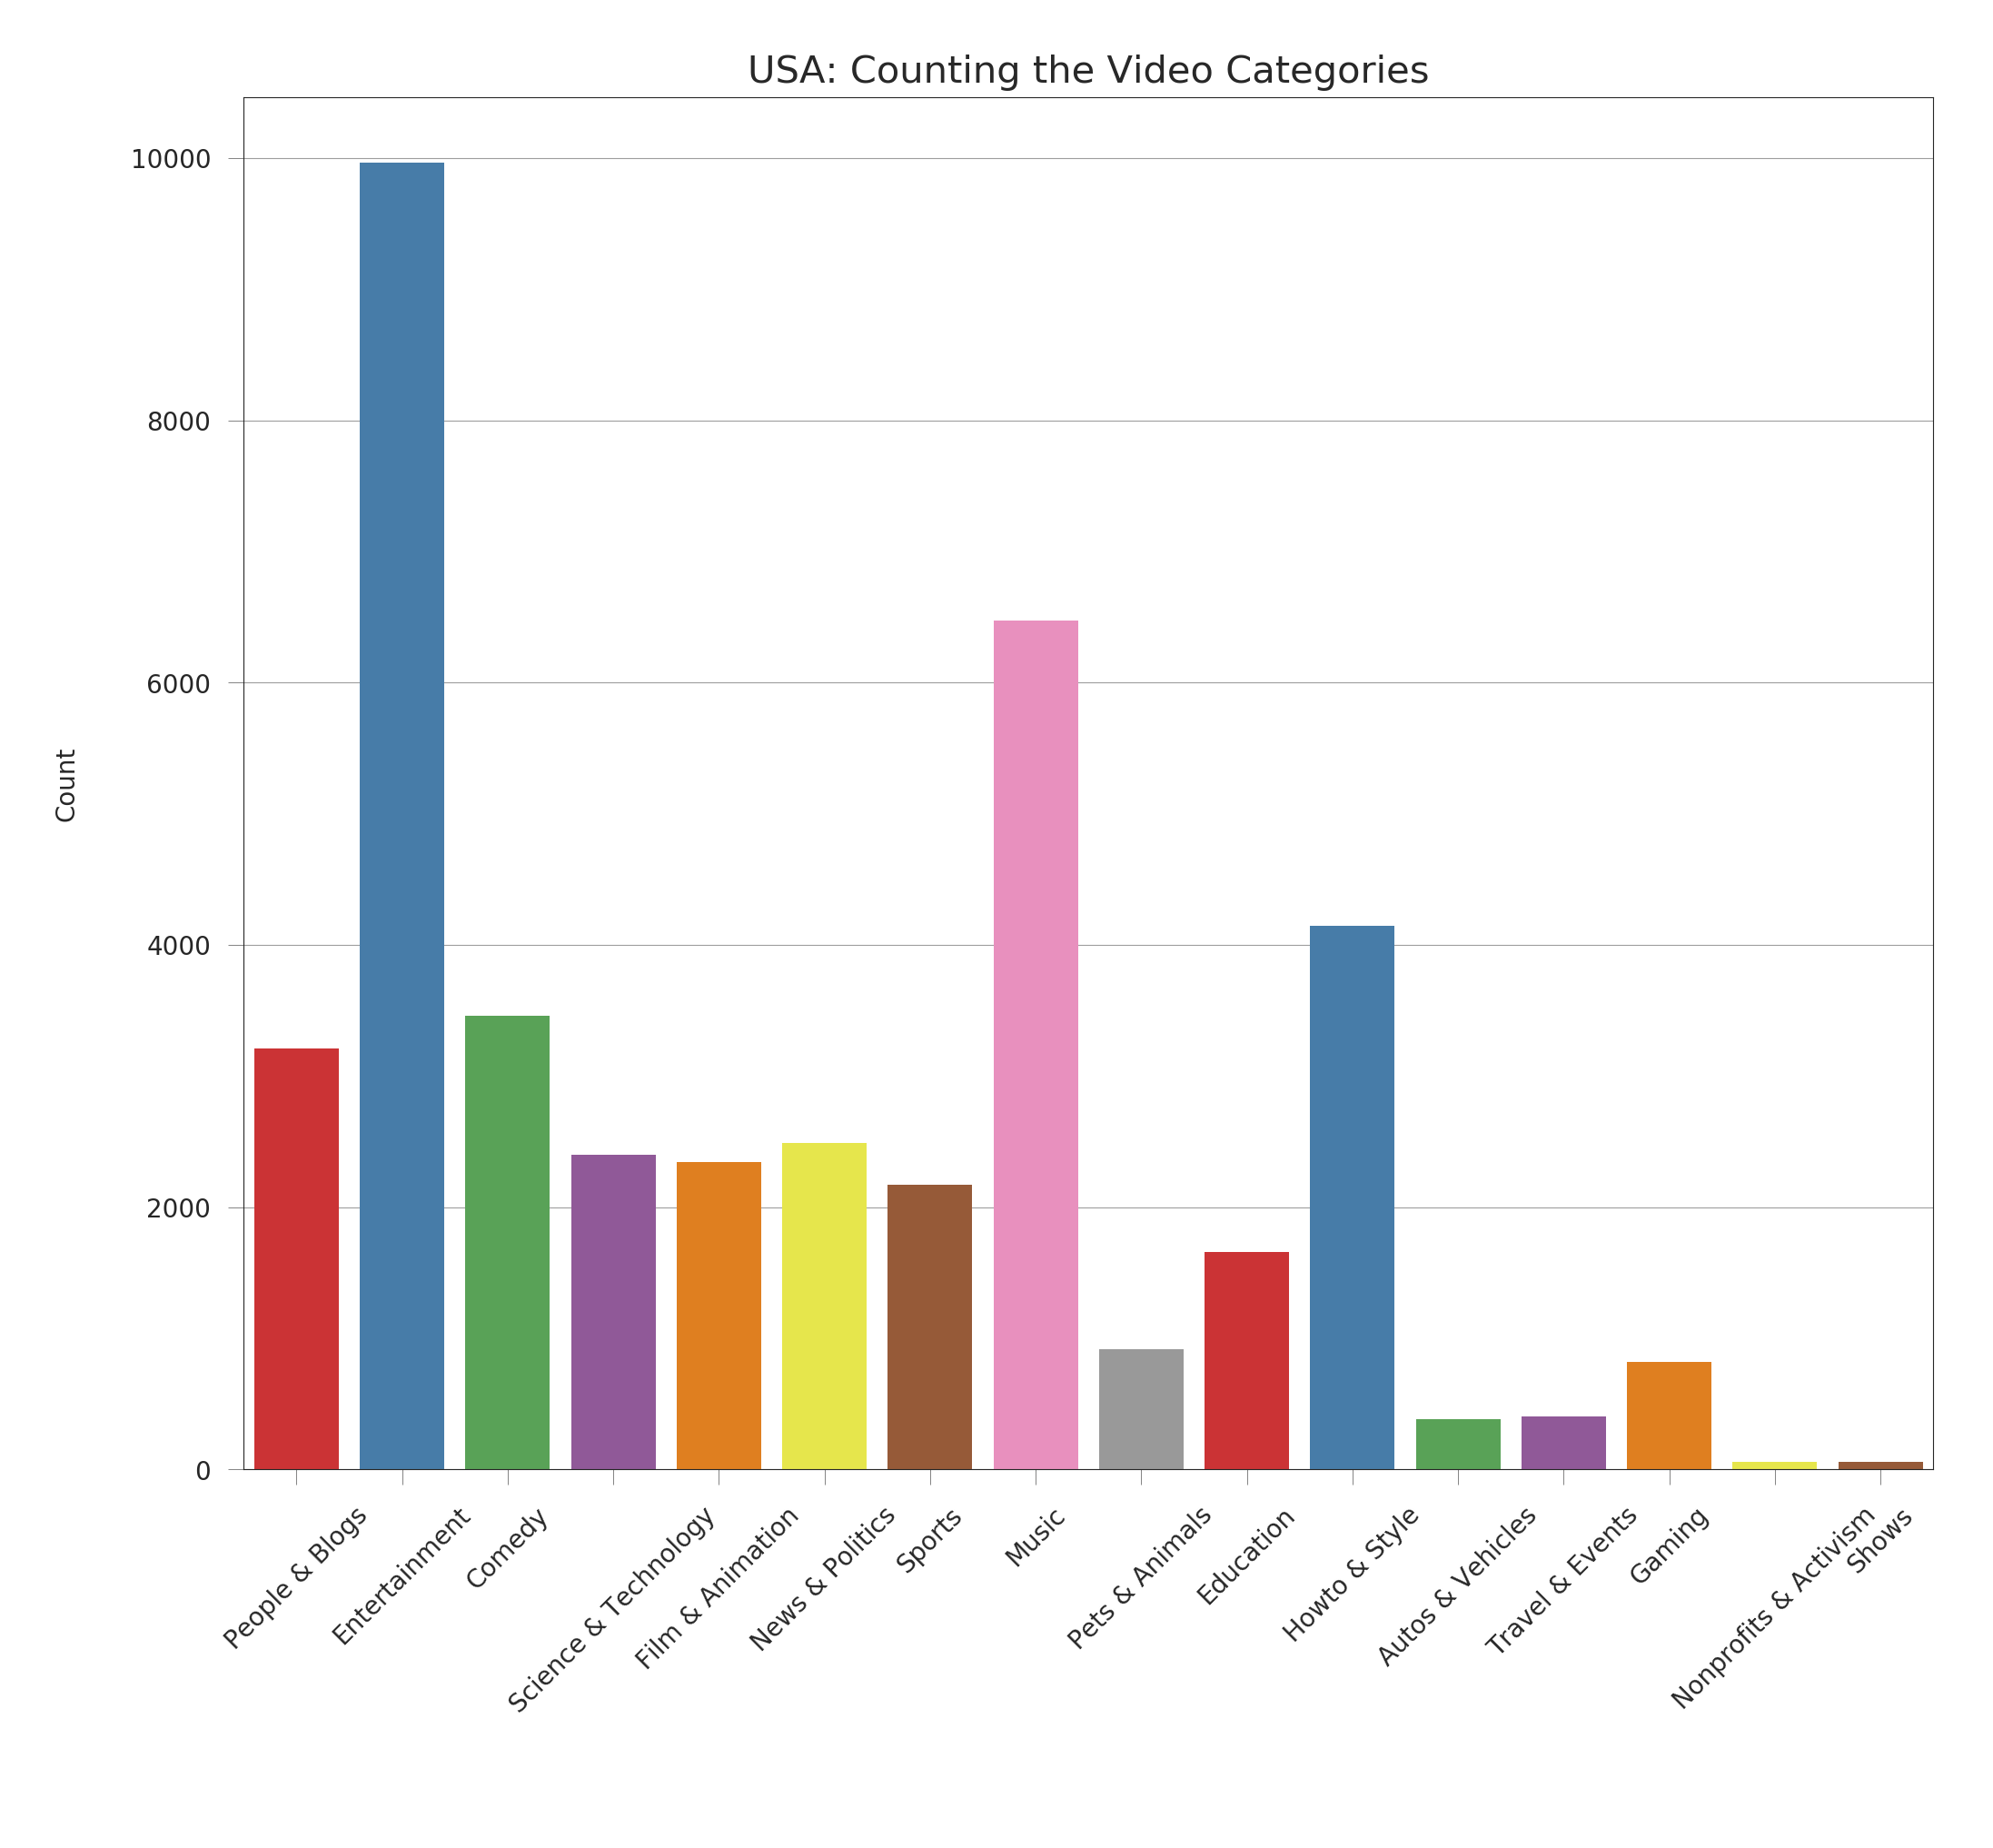

In [9]:
plt.figure(figsize = (12,10))
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("USA: Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

The plot further illustrate the different categories we have and the total frequency in each category with regards to the videos.

Lets look at some technical information about the dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 16 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 5.7+ MB


**Observation:** Lets check which days the videos were published and which hours were the most frequent during publishing.

In [11]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [12]:
df["publishing_day"].value_counts()

Fri    7002
Thu    6950
Tue    6786
Wed    6762
Mon    6177
Sun    3679
Sat    3593
Name: publishing_day, dtype: int64

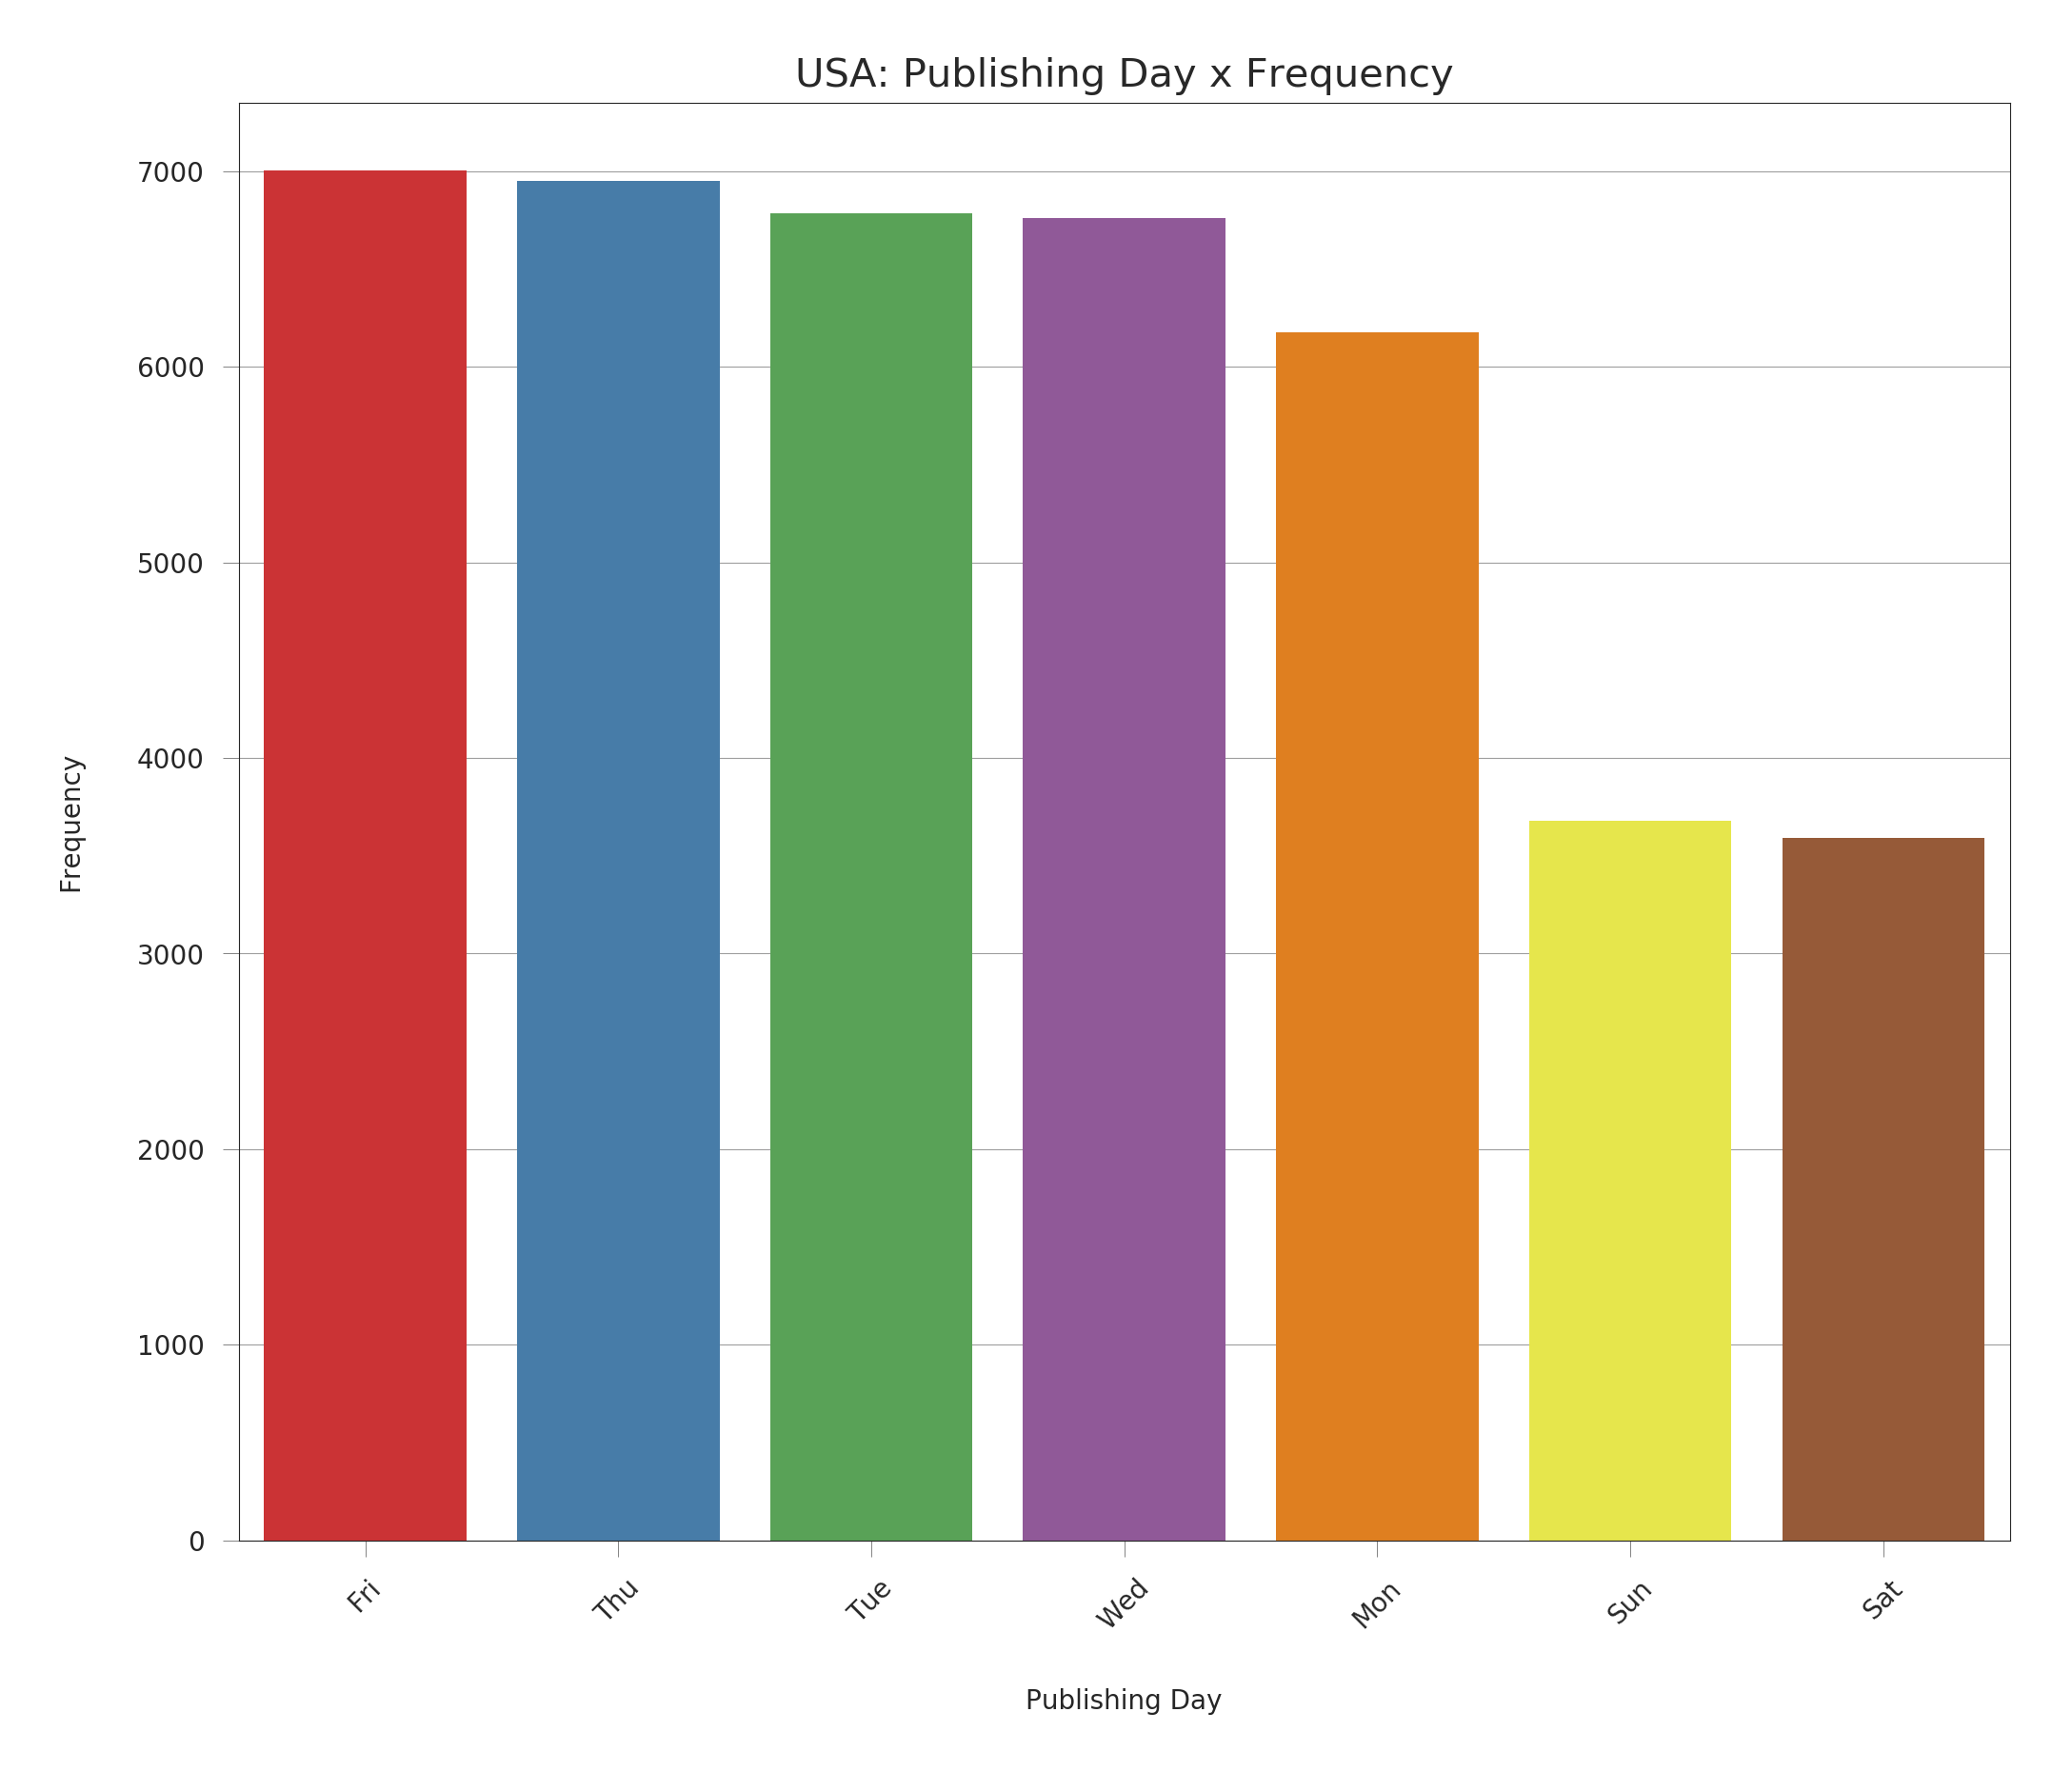

In [13]:
publishD_df= df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_day", y="No_of_videos", data=publishD_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("USA: Publishing Day x Frequency", fontsize=15)
g.set_xlabel("Publishing Day", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [14]:
df["publishing_hour"].value_counts()

16    3669
15    3483
17    3447
18    2889
14    2807
20    2136
19    2132
13    2105
21    2104
22    1959
12    1551
23    1495
00    1436
01    1318
04    1262
05    1253
03     944
02     936
11     856
08     790
07     700
09     605
10     541
06     531
Name: publishing_hour, dtype: int64

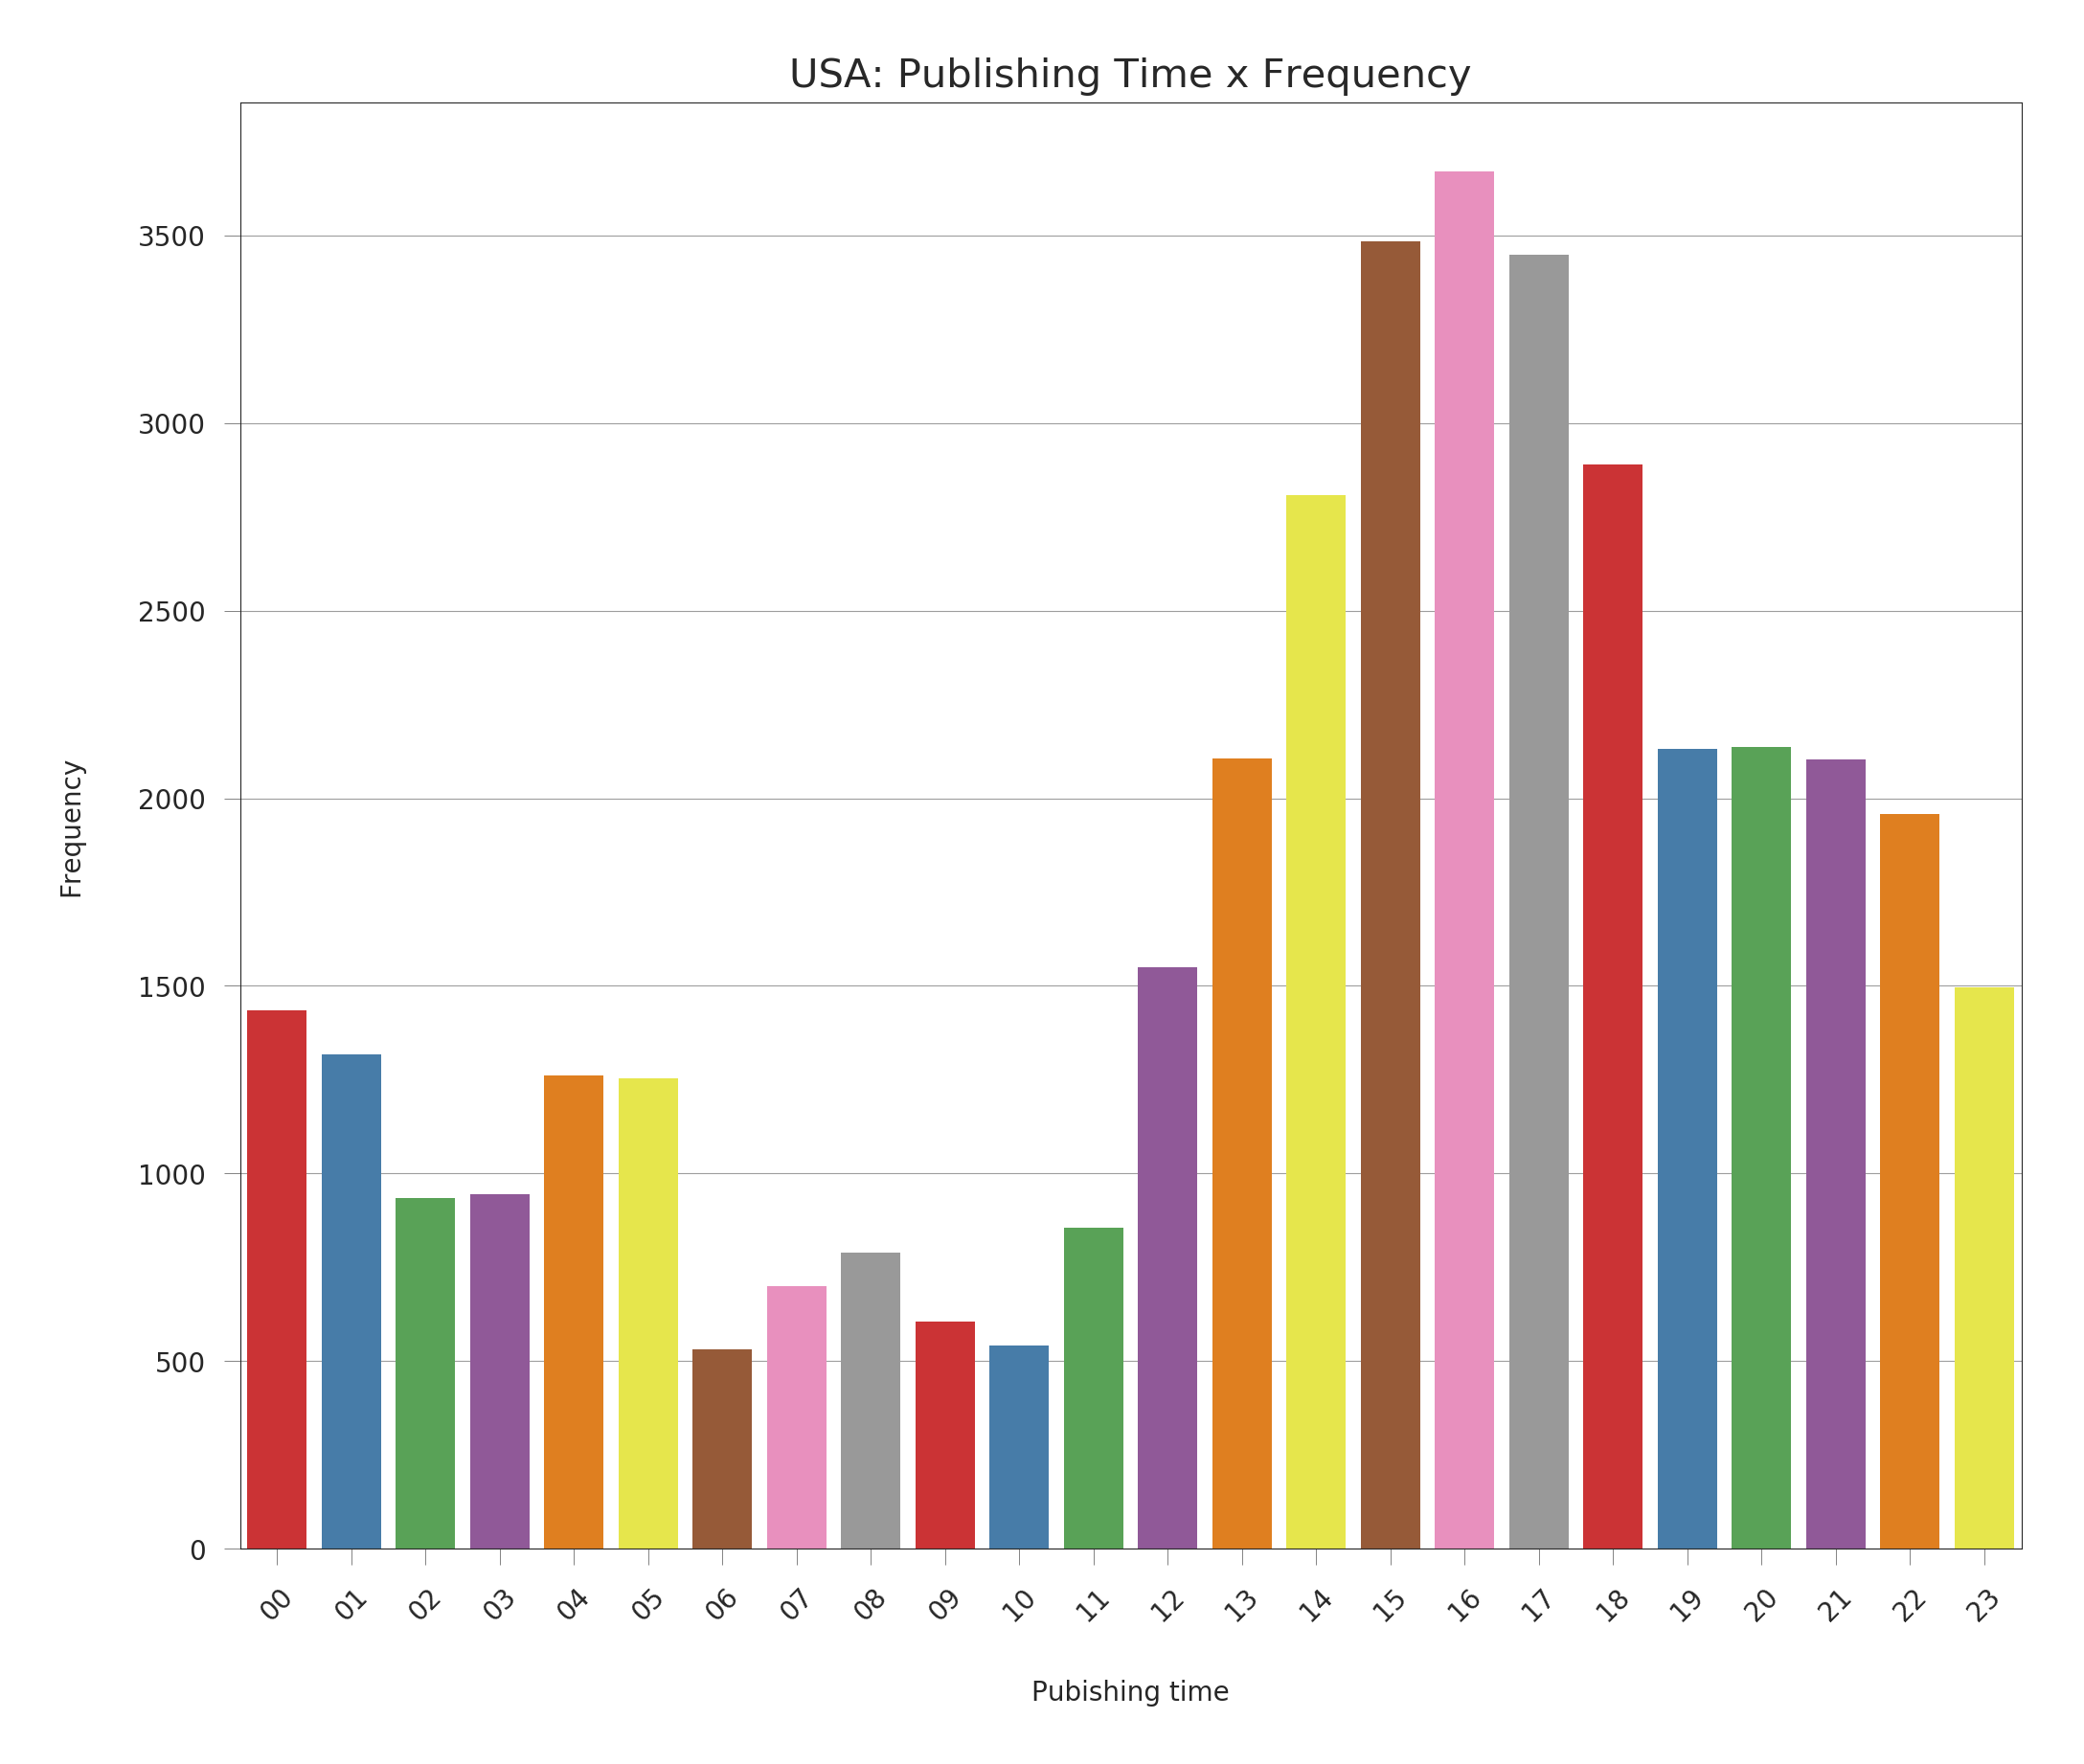

In [15]:
publishT_df= df["publishing_hour"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_hour", y="No_of_videos", data=publishT_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("USA: Publishing Time x Frequency", fontsize=15)
g.set_xlabel("Pubishing time", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

**Observation** 

1. It is clear that the frequency of videos uploaded on Saturday and Sunday is considerably lower than videos uploaded on the weekdays. Friday is the most famous day for publishing of a trending video.  

2. Time from 1300 to 1900 is the most famous time to upload a video to make it to the trending section while the early in the morning i.e 0600 to 1000 is the lowest in terms of videos uploaded but trended.

**Reasoning:**
This case could be that people choose to upload more videos on the weekends giving people the time to watch and make the video trend, and the upload hours of later in the day clearly show a pattern in choosing to upload the video later in the afternoon or the evenings of the day rather than the early mornings which might not result in a trending video rank. 

**Observation:**
Lets take a look at the trending date. 

In [16]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts()
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    31349
2017     9600
Name: trending_date, dtype: int64

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

In [17]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

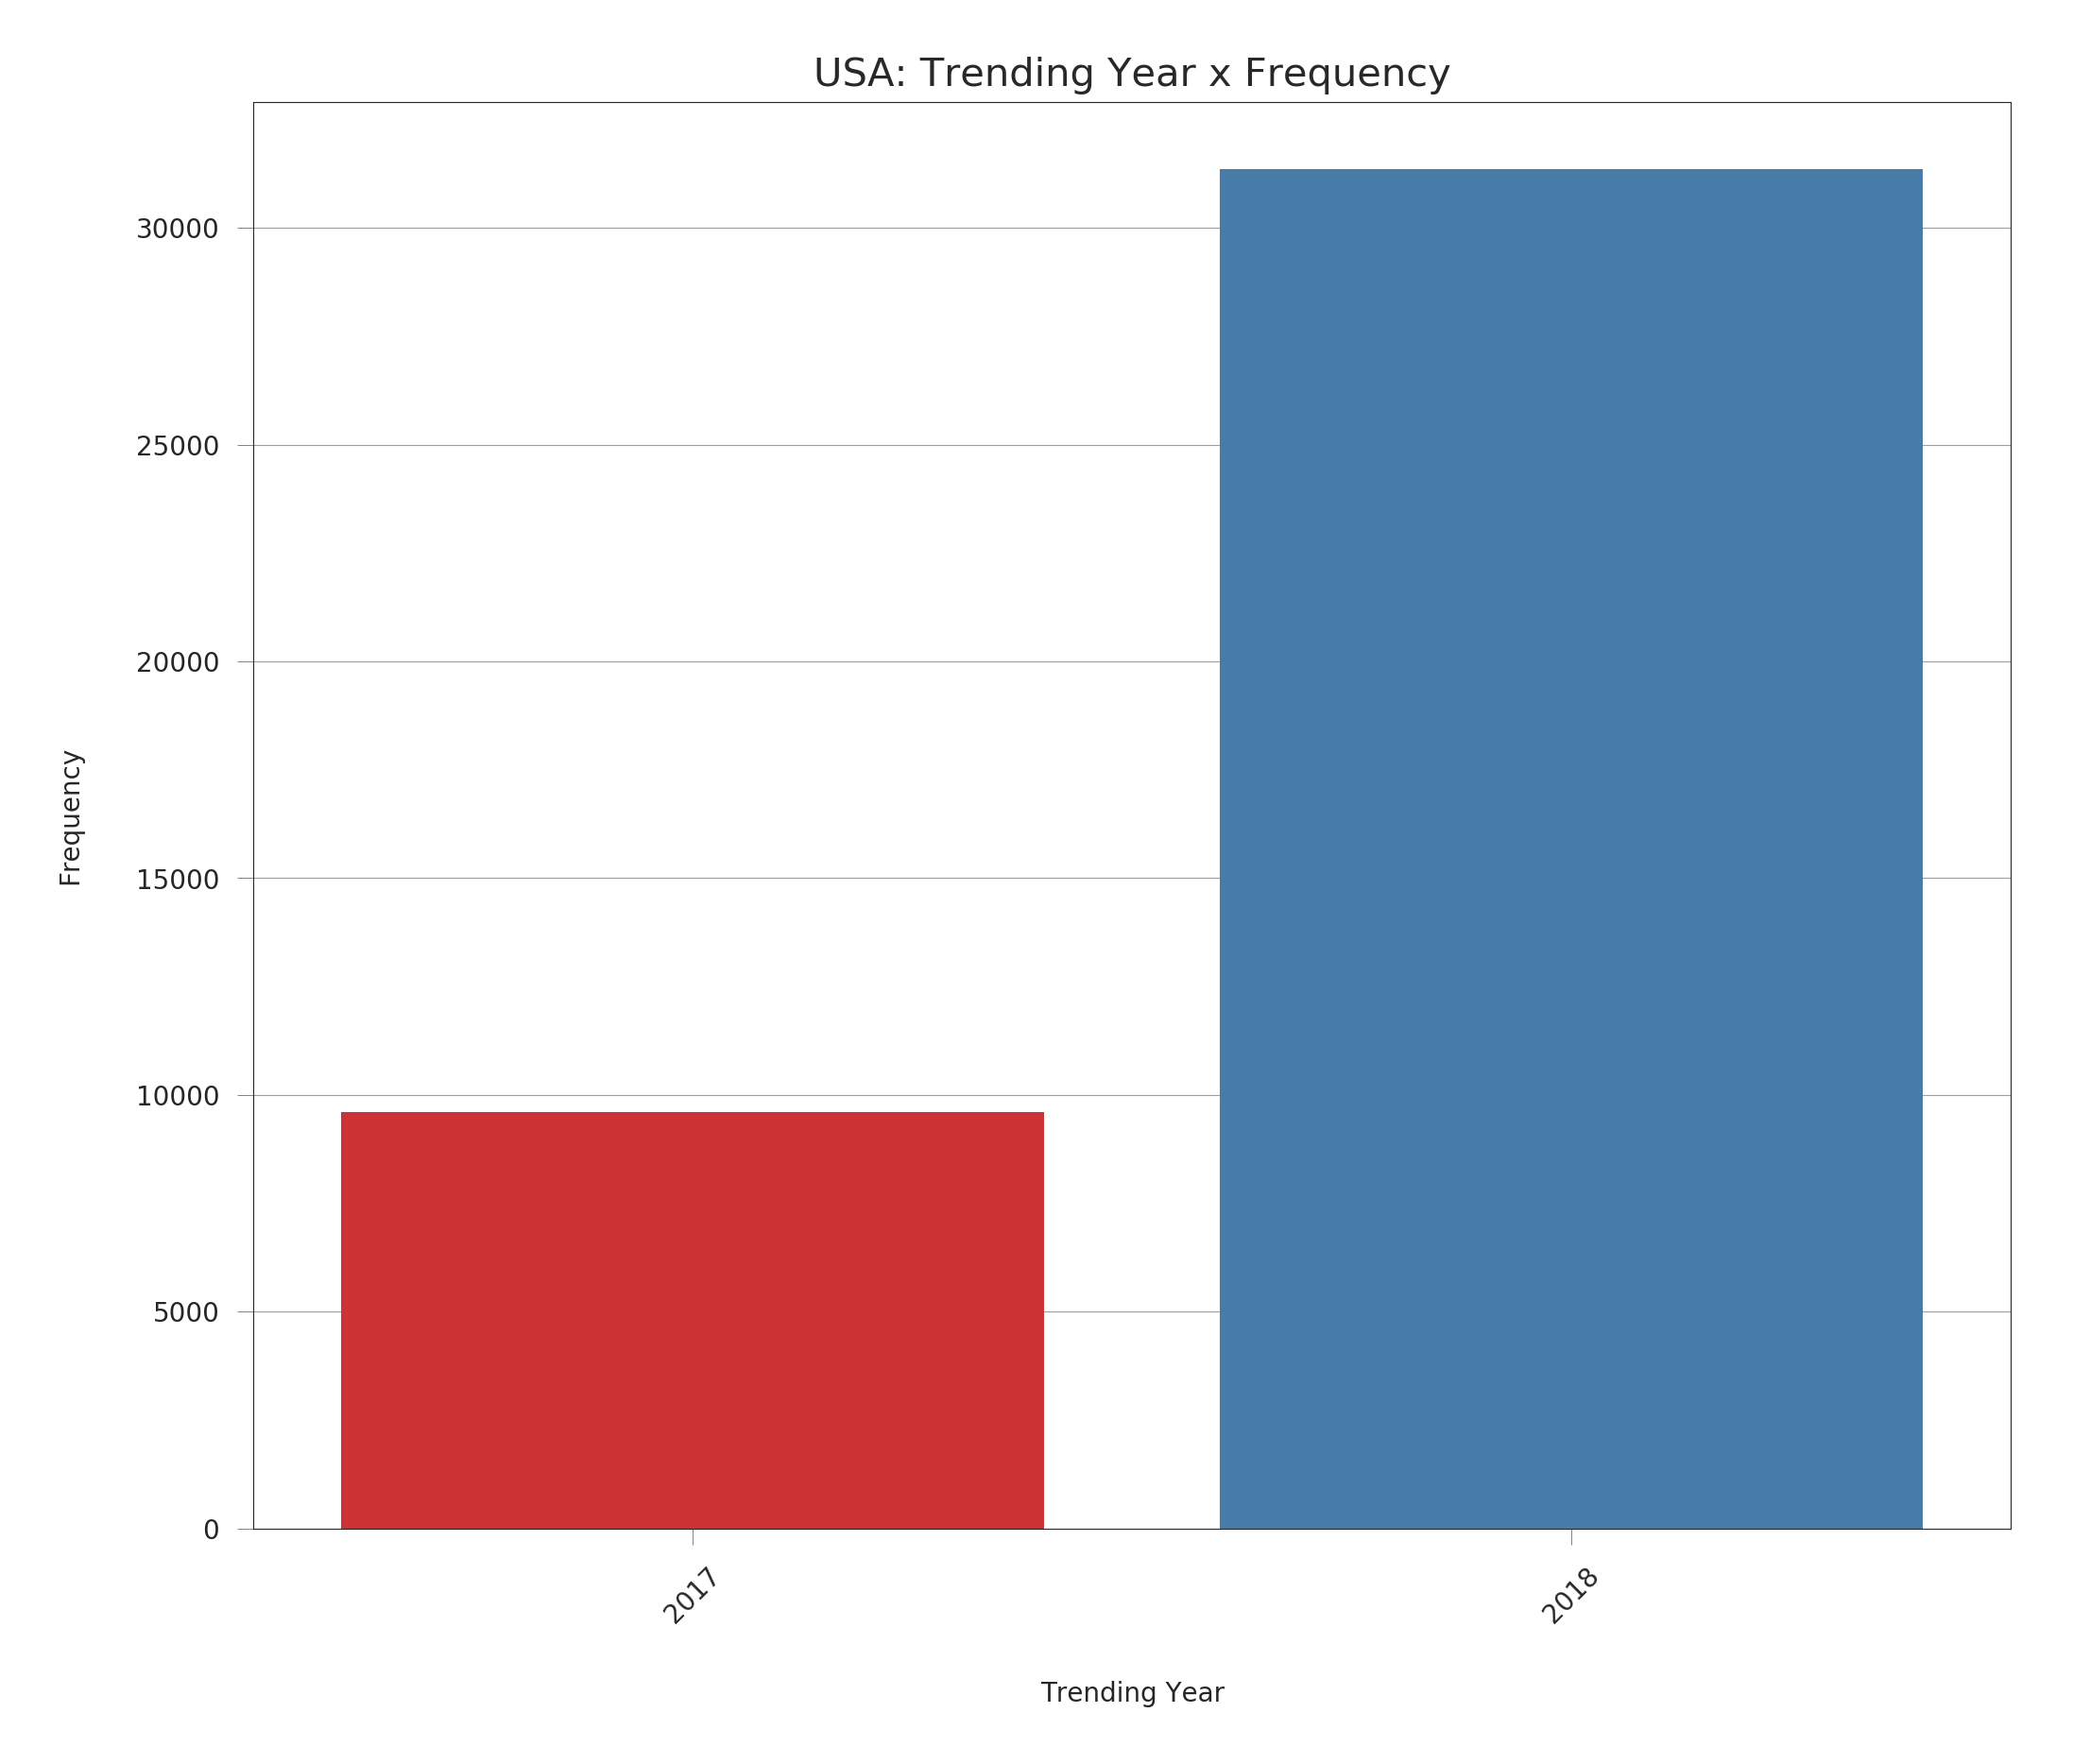

In [18]:
trendingY_df = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="year", y="No_of_videos", data=trendingY_df , palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("USA: Trending Year x Frequency", fontsize=15)
g.set_xlabel("Trending Year", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [19]:
df.describe()

category_id        views      likes   dislikes  comment_count
count     40949.00     40949.00   40949.00   40949.00       40949.00
mean         19.97   2360784.64   74266.70    3711.40        8446.80
std           7.57   7394113.76  228885.34   29029.71       37430.49
min           1.00       549.00       0.00       0.00           0.00
25%          17.00    242329.00    5424.00     202.00         614.00
50%          24.00    681861.00   18091.00     631.00        1856.00
75%          25.00   1823157.00   55417.00    1938.00        5755.00
max          43.00 225211923.00 5613827.00 1674420.00     1361580.00

We convert all the required columns into integer datatype to make it easier for analysis.

In [20]:
df.info()

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 18 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
publishing_day            40949 non-null object
publishing_hour           40949 non-null object
dtypes: bool(3), int64(5), 

In [21]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(5)

trending_date                                              title  \
video_id                                                                       
NZFhMSgbKKM      17.14.11  Dennis Smith Jr. and LeBron James go back and ...   
sbcbvuitiTc      17.14.11  Stephon Marbury and Jimmer Fredette fight in C...   
4d07RXYLsJE      17.14.11                Sphaera - demonstrating interaction   
NZFhMSgbKKM      17.15.11  Dennis Smith Jr. and LeBron James go back and ...   
sbcbvuitiTc      17.15.11  Stephon Marbury and Jimmer Fredette fight in C...   

                        channel_title category_id              publish_time  \
video_id                                                                      
NZFhMSgbKKM              Ben Rohrbach          17  2017-11-13T15:11:00.000Z   
sbcbvuitiTc  NBA Highlights · YouTube          17  2017-11-10T18:23:05.000Z   
4d07RXYLsJE              Jenny Hanell          28  2017-11-04T20:48:16.000Z   
NZFhMSgbKKM              Ben Rohrbach          17  2017-11-13T15:11:00.000Z   
sbcbvuitiTc  NBA Highlights · YouTube          17  2017-11-10T18:23:05.000Z   

                                  tags    views  likes  dislikes  \
video_id                                                           
NZFhMSgbKKM                     [none]      945      7         5   
sbcbvuitiTc  NBA|"Basketball"|"Sports"   956169   2017      2425   
4d07RXYLsJE                     [none]     1827      3         0   
NZFhMSgbKKM                     [none]    21544     83        74   
sbcbvuitiTc  NBA|"Basketball"|"Sports"  1015189   2133      2483   

             comment_count                                  thumbnail_link  \
video_id                                                                     
NZFhMSgbKKM              8  https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg   
sbcbvuitiTc           1447  https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg   
4d07RXYLsJE              2  https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg   
NZFhMSgbKKM             62  https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg   
sbcbvuitiTc           1465  https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
NZFhMSgbKKM              False             False                   False   
sbcbvuitiTc              False             False                   False   
4d07RXYLsJE              False             False                   False   
NZFhMSgbKKM              False             False                   False   
sbcbvuitiTc              False             False                   False   

            description         category_name publishing_day publishing_hour  
video_id                                                                      
NZFhMSgbKKM         NaN                Sports            Mon              15  
sbcbvuitiTc         NaN                Sports            Fri              18  
4d07RXYLsJE         NaN  Science & Technology            Sat              20  
NZFhMSgbKKM         NaN                Sports            Mon              15  
sbcbvuitiTc         NaN                Sports            Fri              18

Description is now cleaned with removing and replacing null values with an empty string. 

In [22]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 18 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null object
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_name             40949 non-null object
publishing_day            40949 non-null object
publishing_hour           40949 non-null object
dtypes: bool(3), int64(4),

Lets check the description of the frame. 

In [23]:
df.describe()

views      likes   dislikes  comment_count
count     40949.00   40949.00   40949.00       40949.00
mean    2360784.64   74266.70    3711.40        8446.80
std     7394113.76  228885.34   29029.71       37430.49
min         549.00       0.00       0.00           0.00
25%      242329.00    5424.00     202.00         614.00
50%      681861.00   18091.00     631.00        1856.00
75%     1823157.00   55417.00    1938.00        5755.00
max   225211923.00 5613827.00 1674420.00     1361580.00

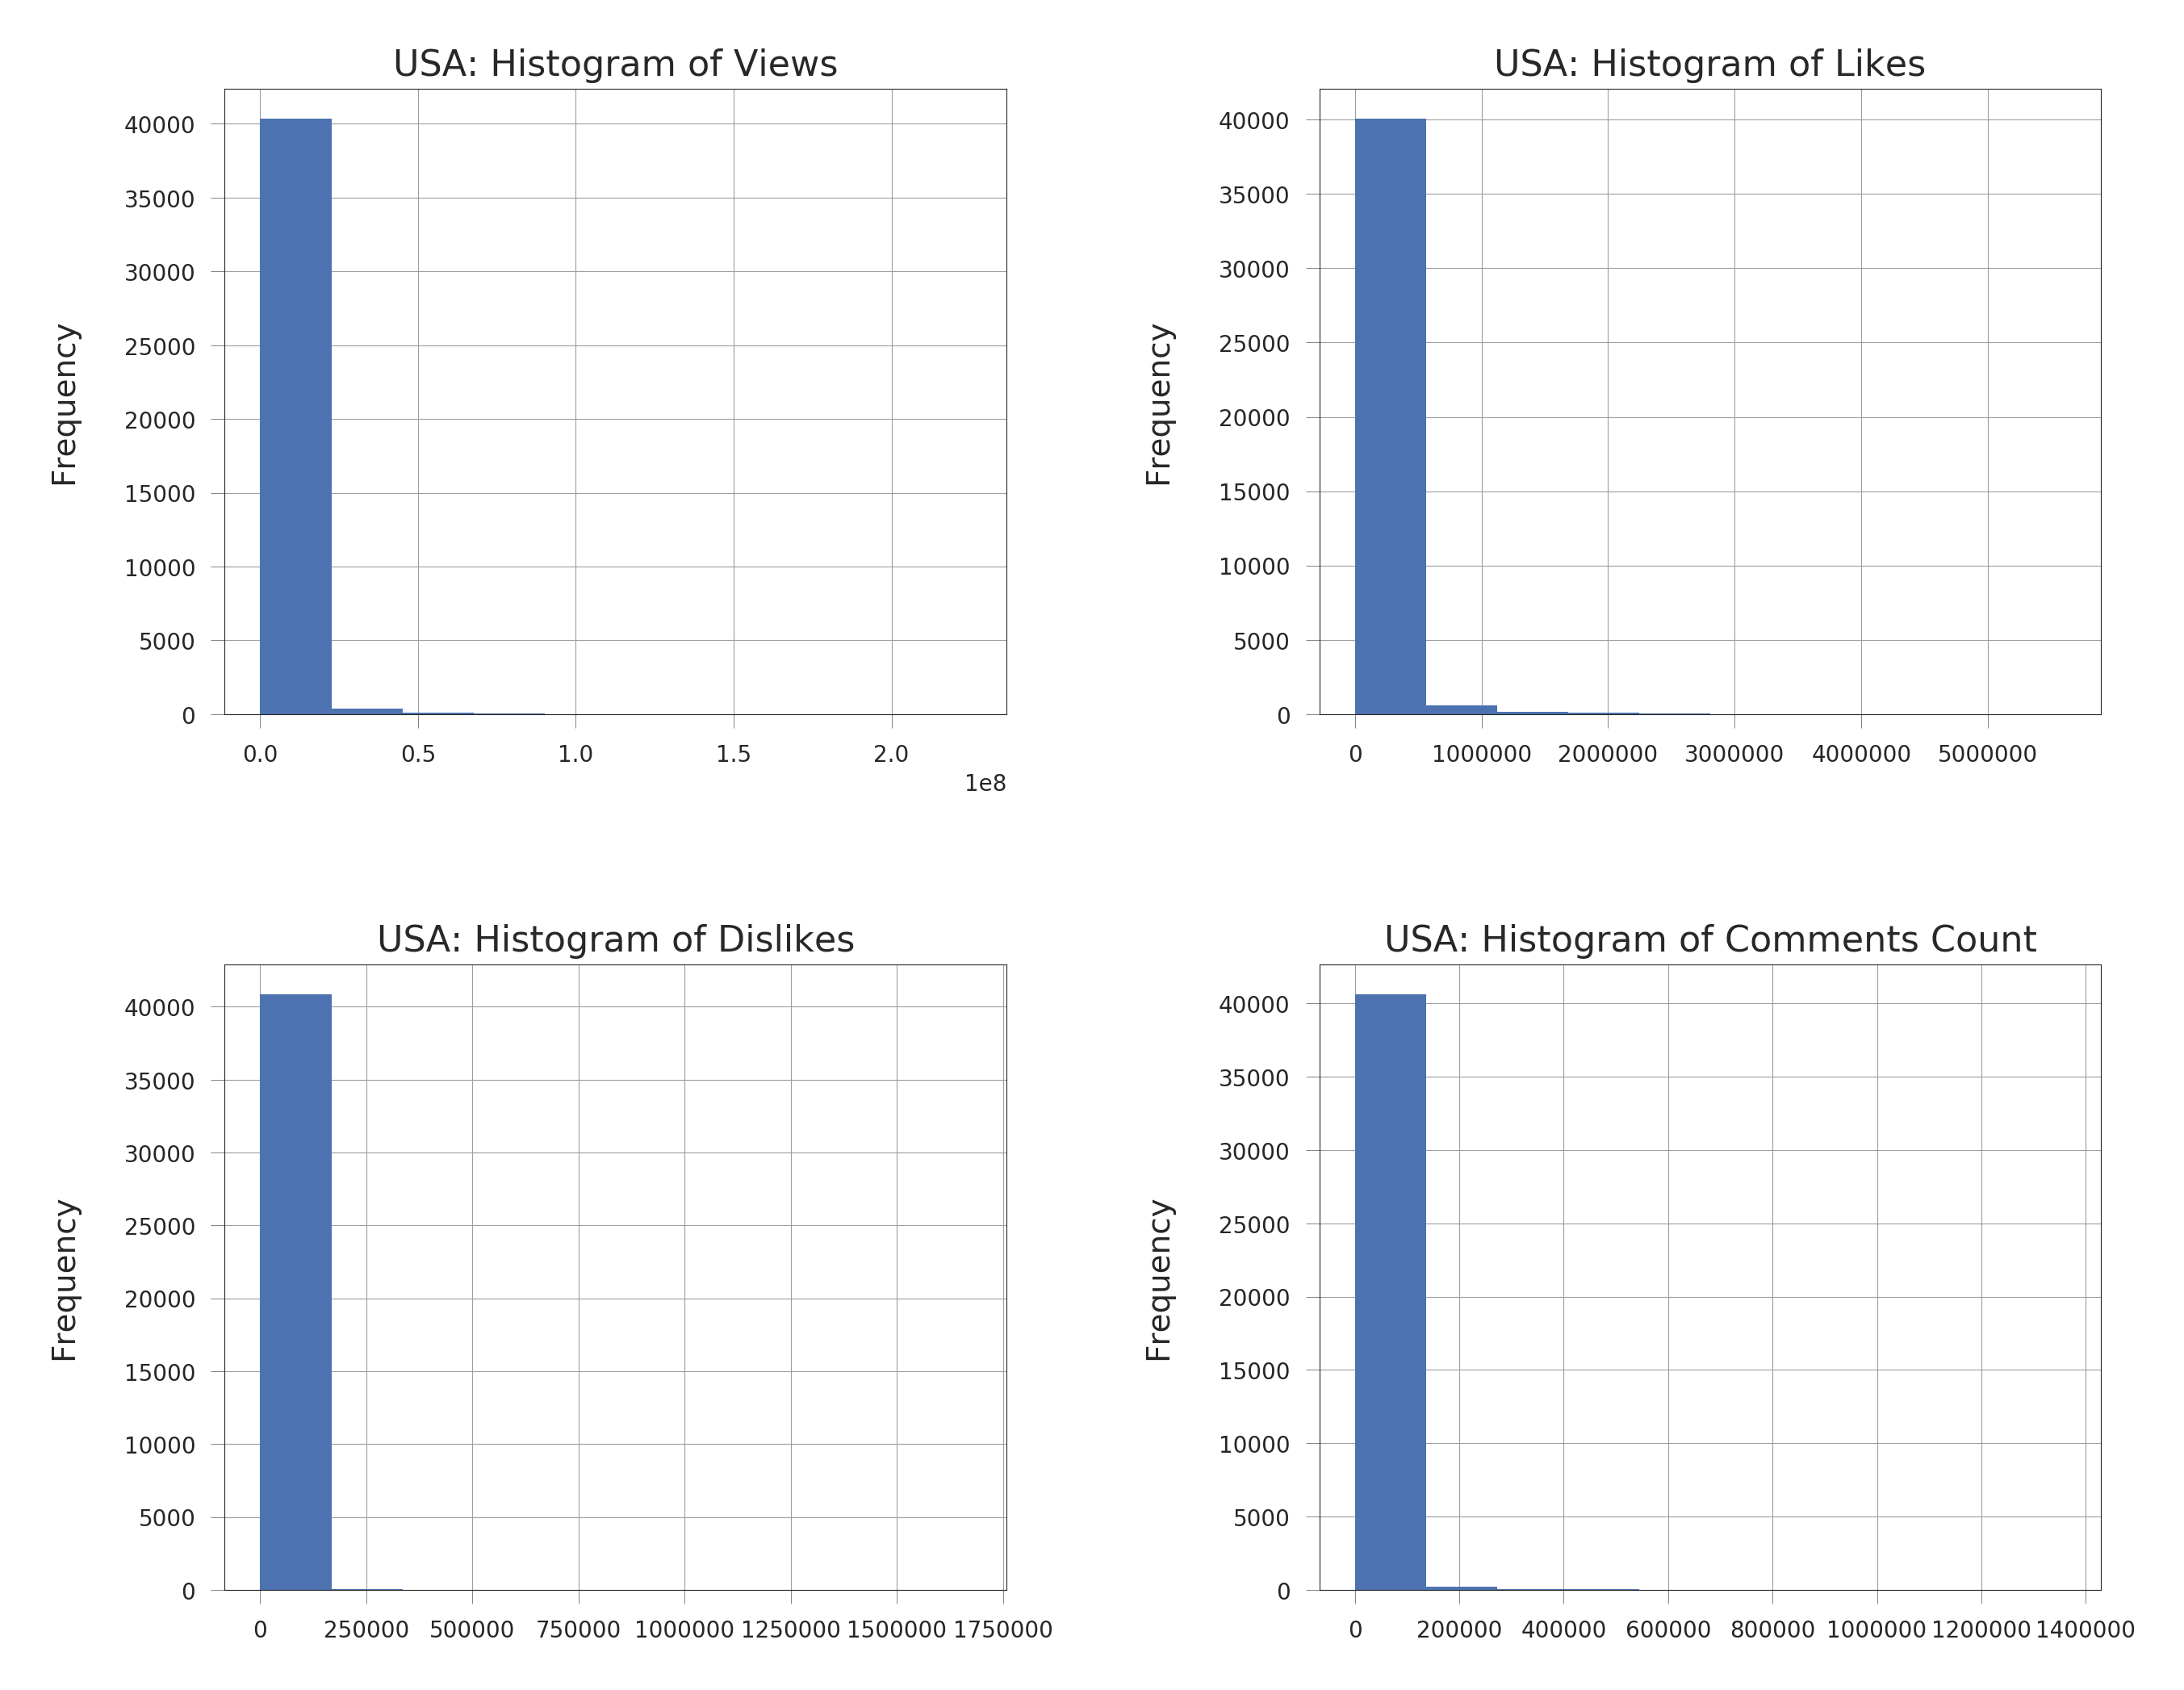

In [24]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("USA: Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("USA: Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("USA: Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("USA: Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

In [25]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.85      0.47           0.62
likes           0.85   1.00      0.45           0.80
dislikes        0.47   0.45      1.00           0.70
comment_count   0.62   0.80      0.70           1.00

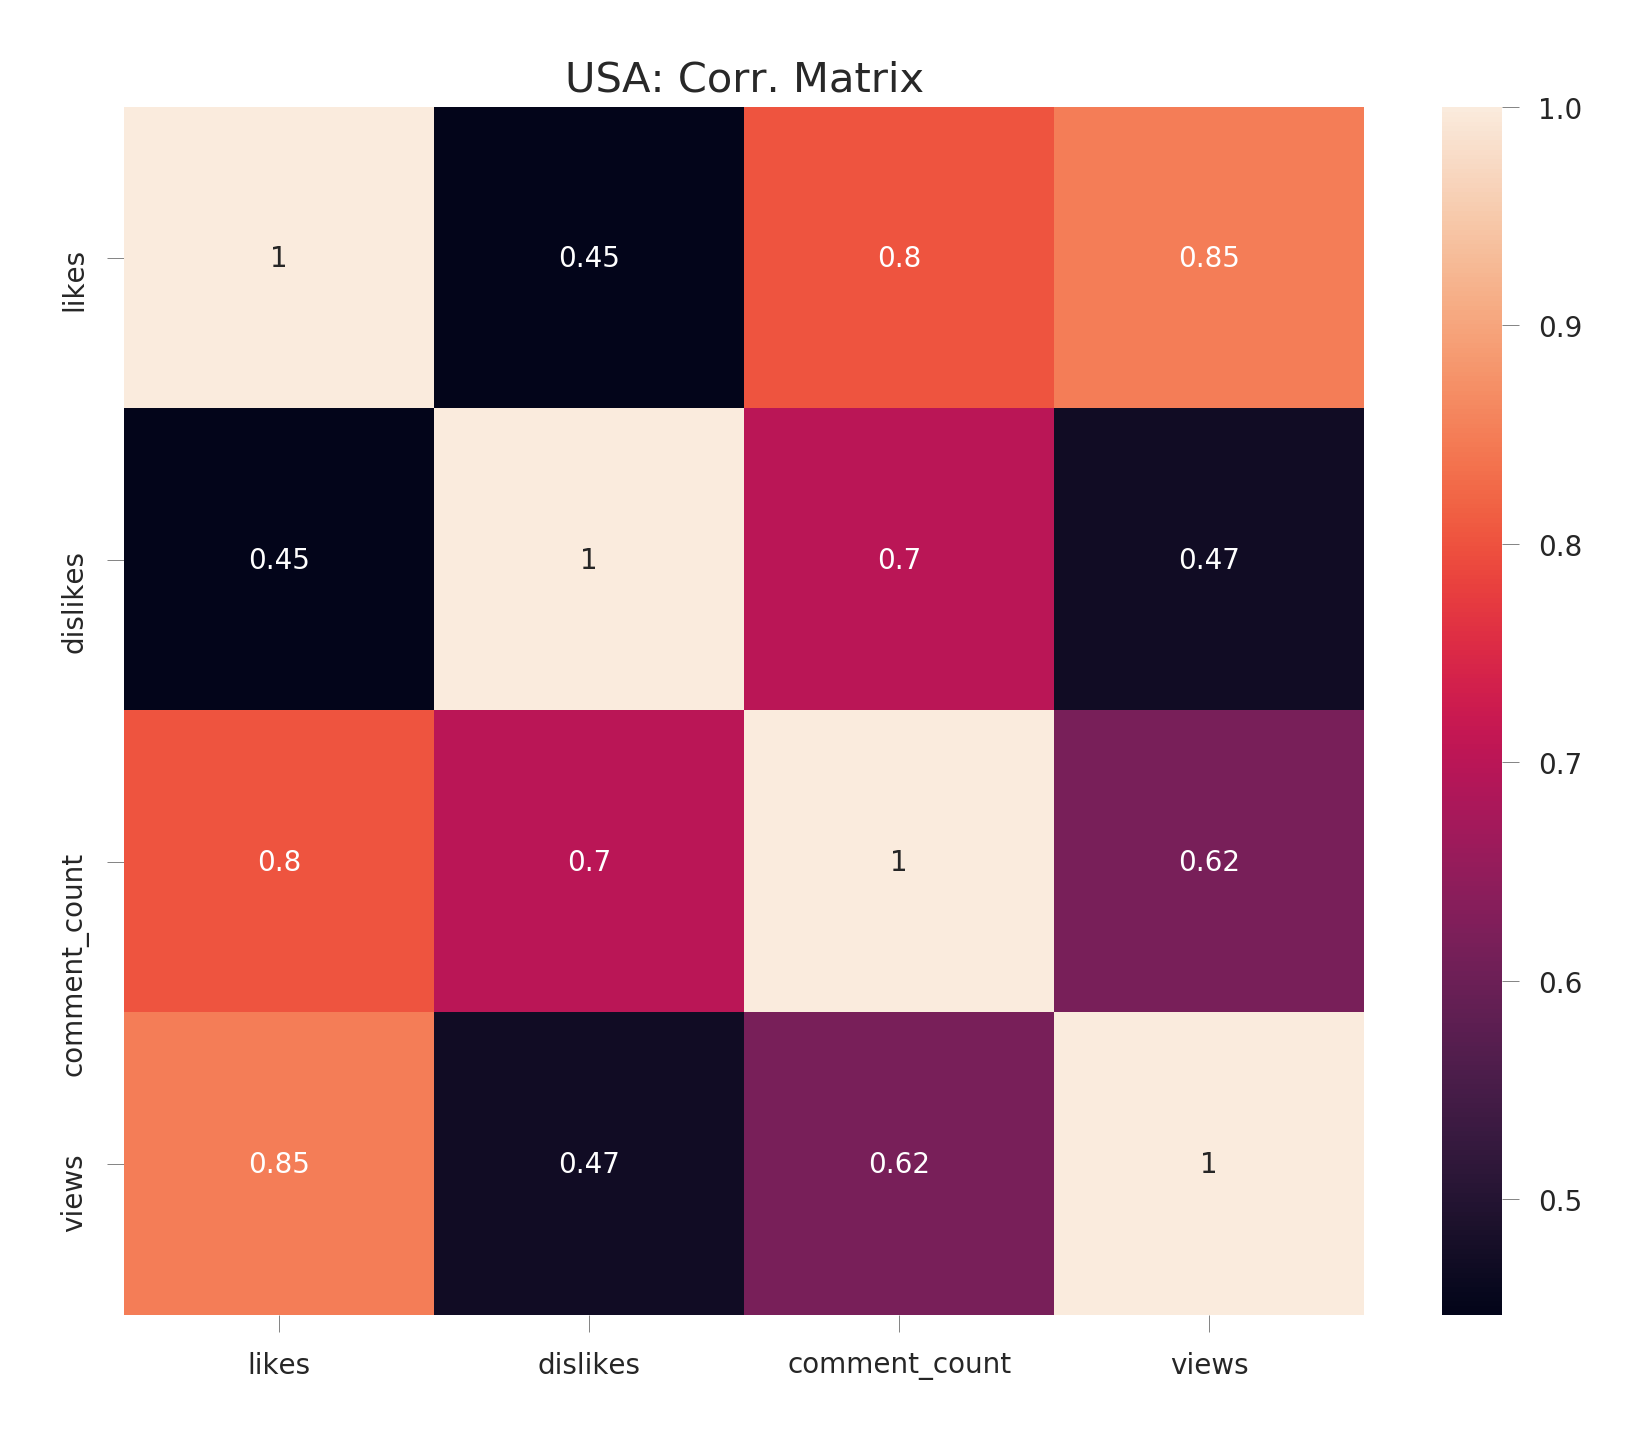

In [26]:
plt.figure(figsize = (10,8))
g = sns.heatmap(df[['likes', 'dislikes', 'comment_count', 'views']].corr(), annot=True)
g.set_title("USA: Corr. Matrix", fontsize=15)
plt.show();

Videos that trended the longest days?

In [27]:
df['title'].value_counts()

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                                           30
The ULTIMATE $30,000 Gaming PC Setup                                                                 29
Charlie Puth - BOY [Official Audio]                                                                  29
Sam Smith - Pray (Official Video) ft. Logic                                                          29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                                        29
Rooster Teeth Animated Adventures - Millie So Serious                                                29
Why I'm So Scared (being myself and crying too much)                                                 29
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                         29
Rita Ora - Girls ft. Cardi B, Bebe Rexha & Charli XCX (Official Lyric Video)                         28
The Deadliest Being on Planet Earth – The Bacteriophage         

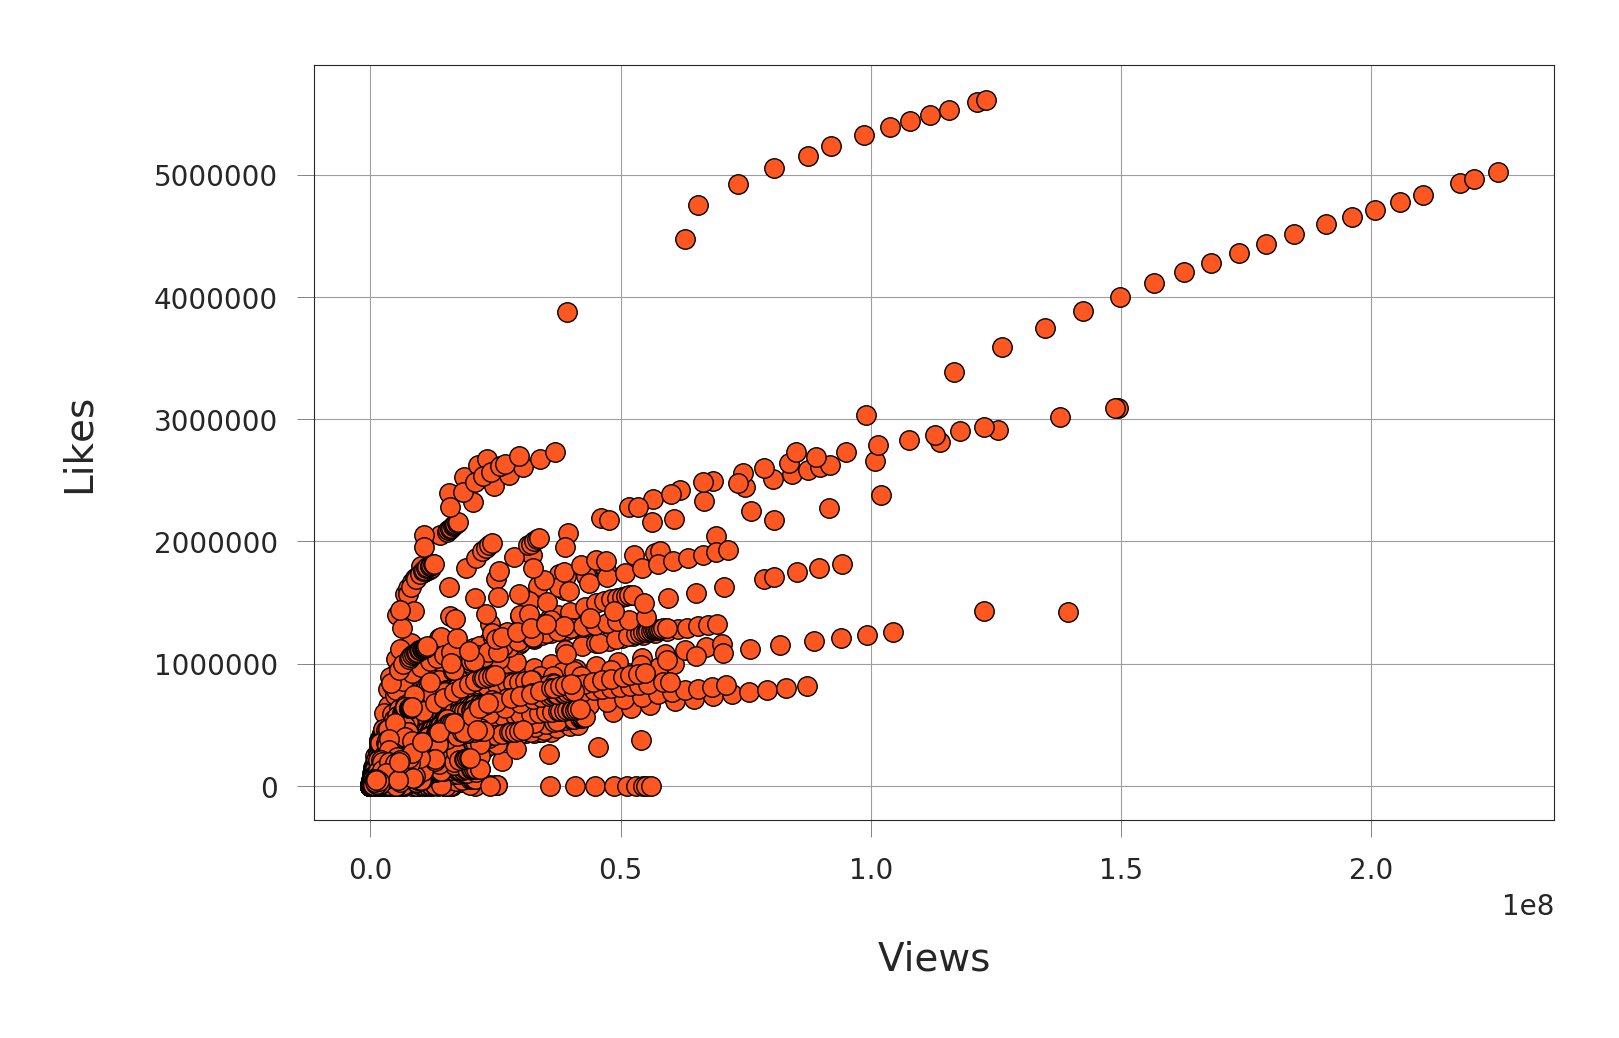

In [31]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

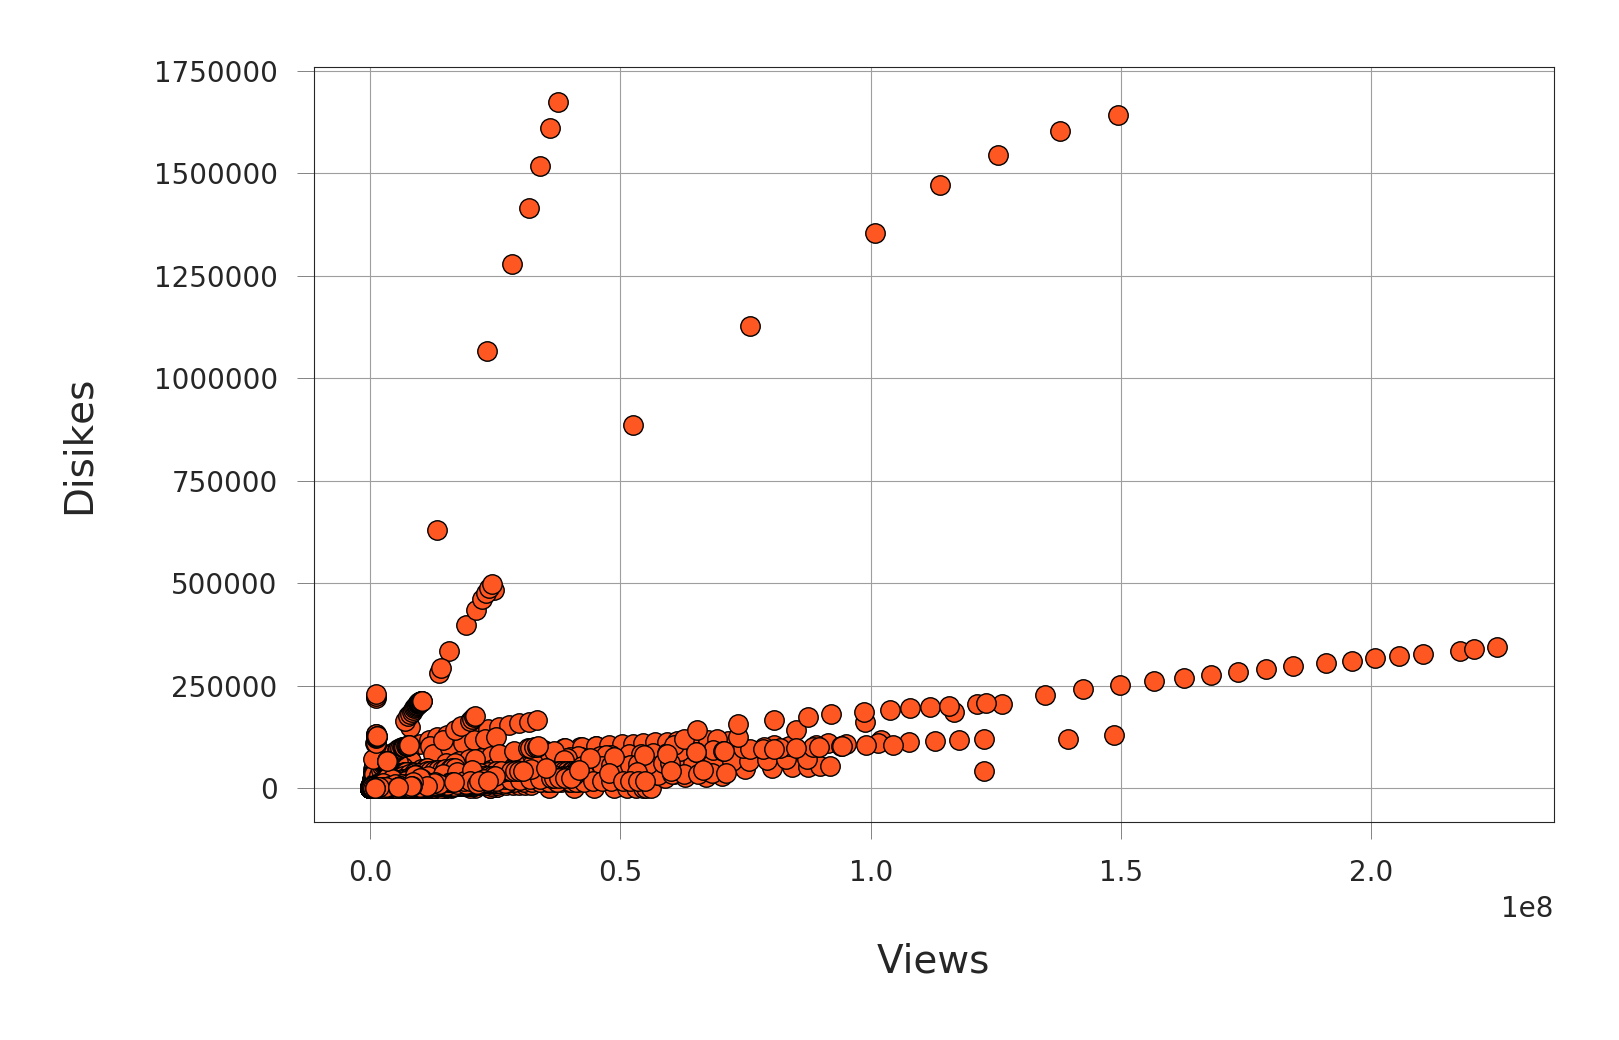

In [32]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Disikes");

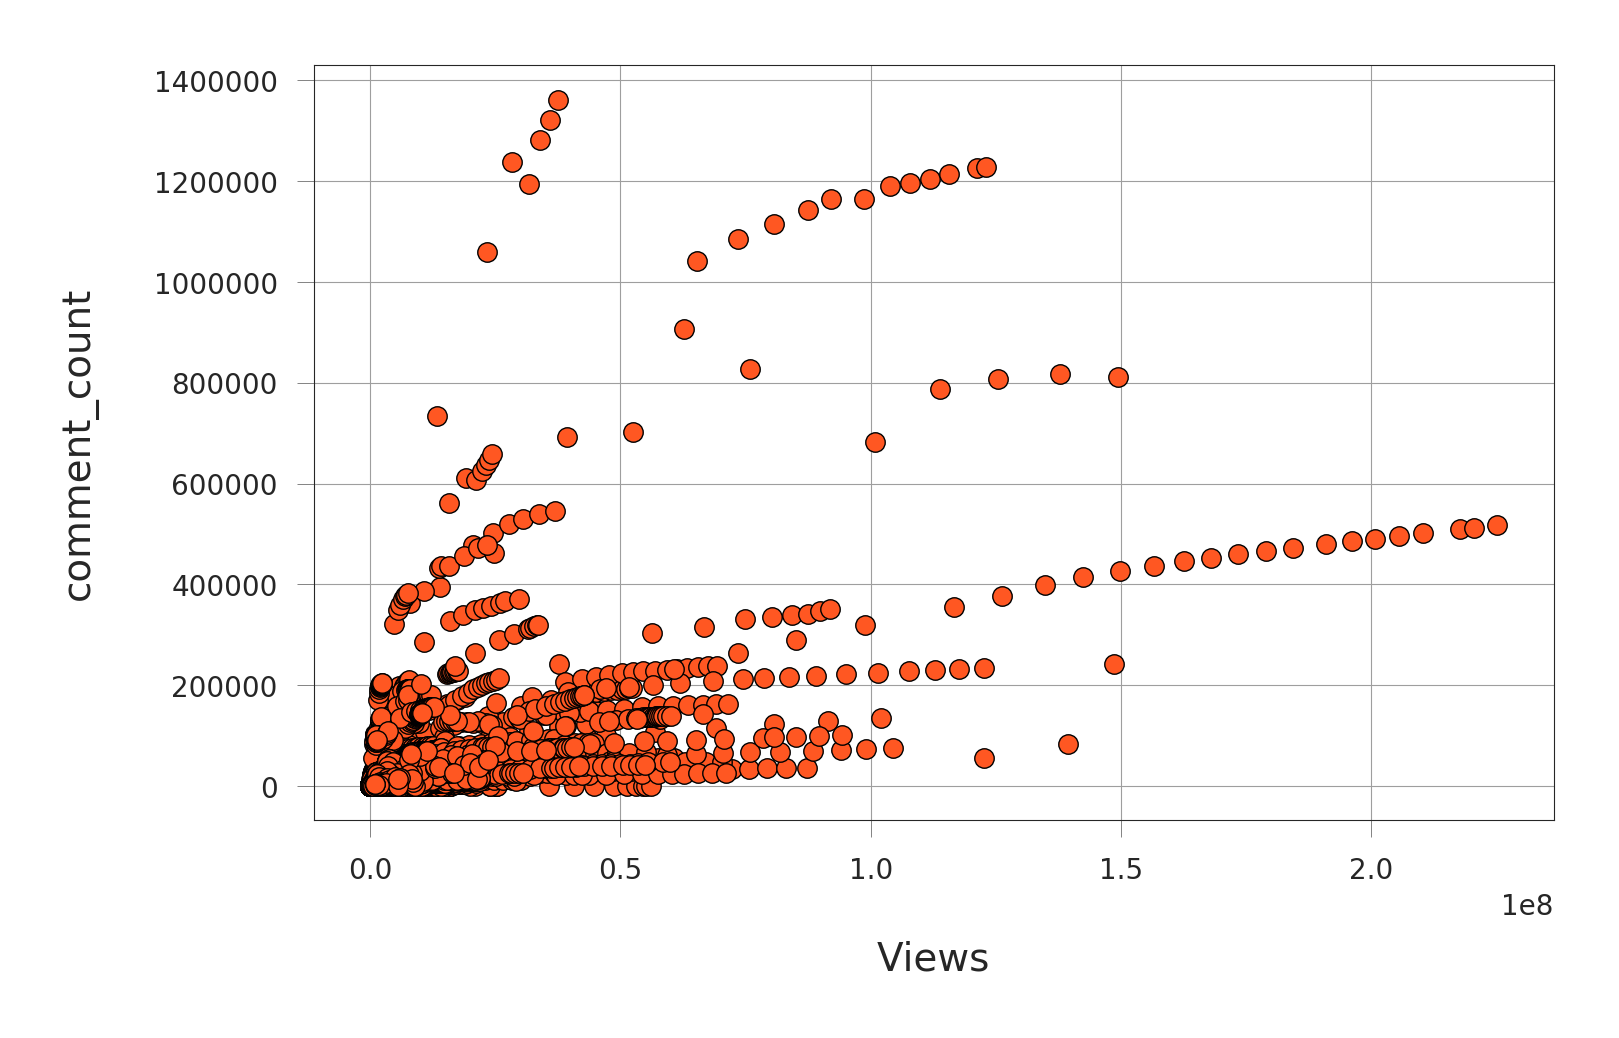

In [33]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="comment_count");

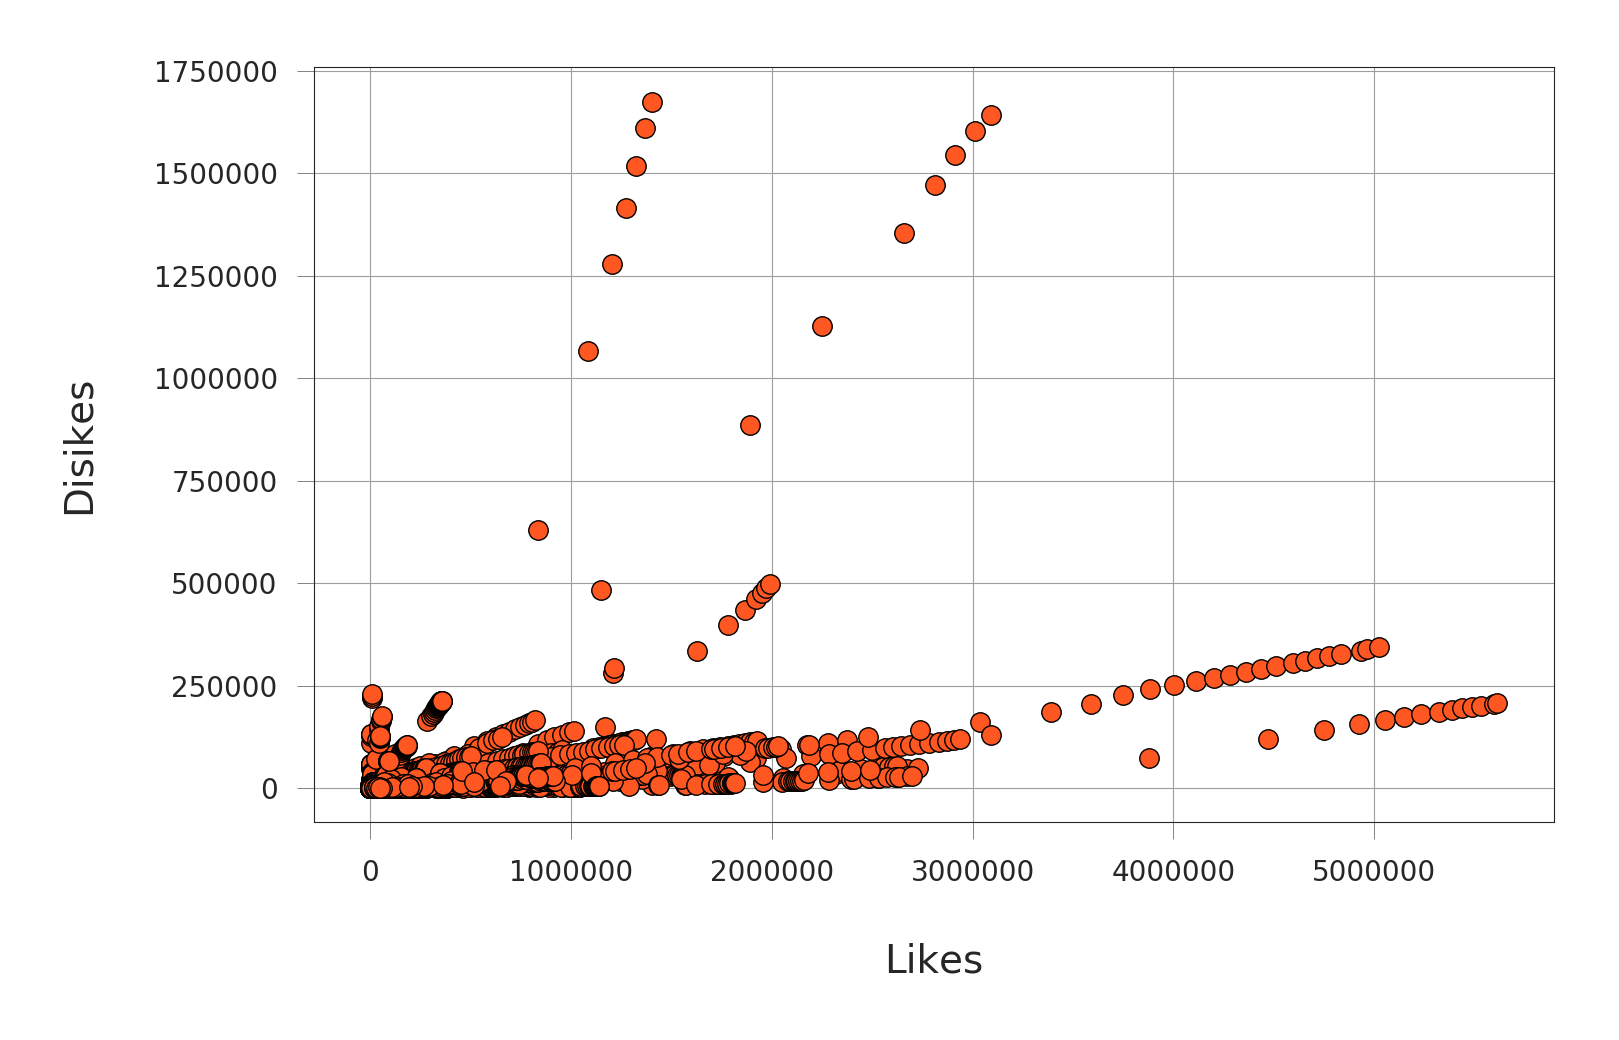

In [34]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="Disikes");

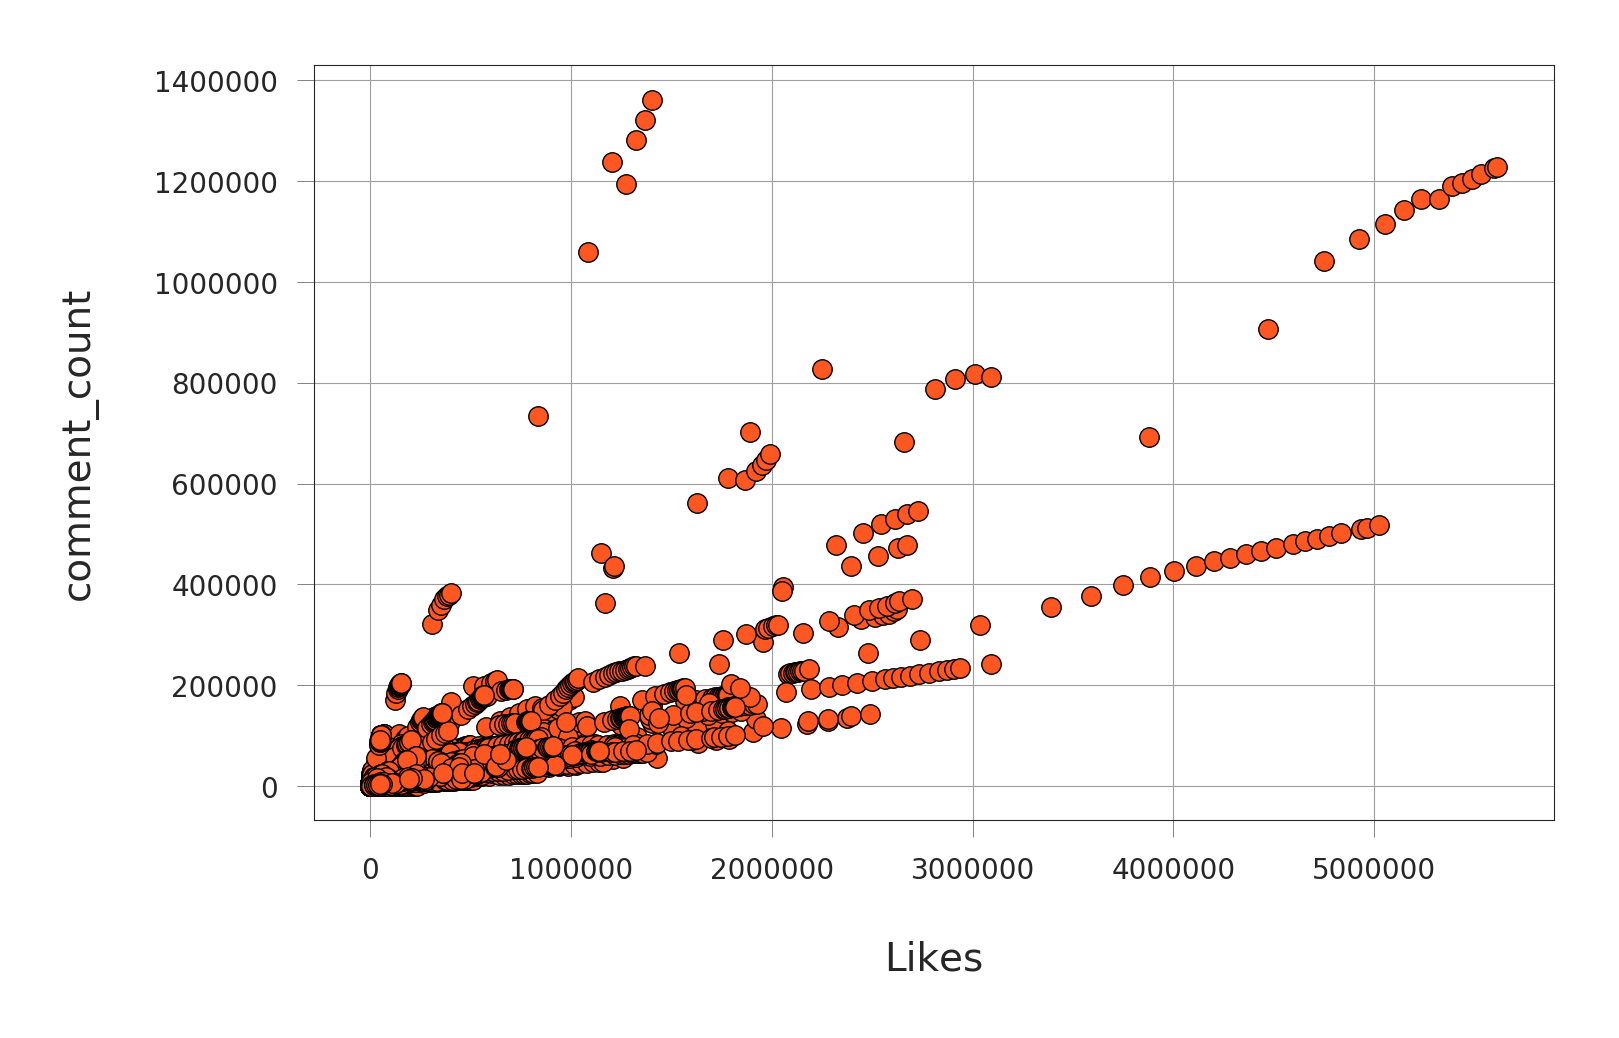

In [35]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

In [36]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100

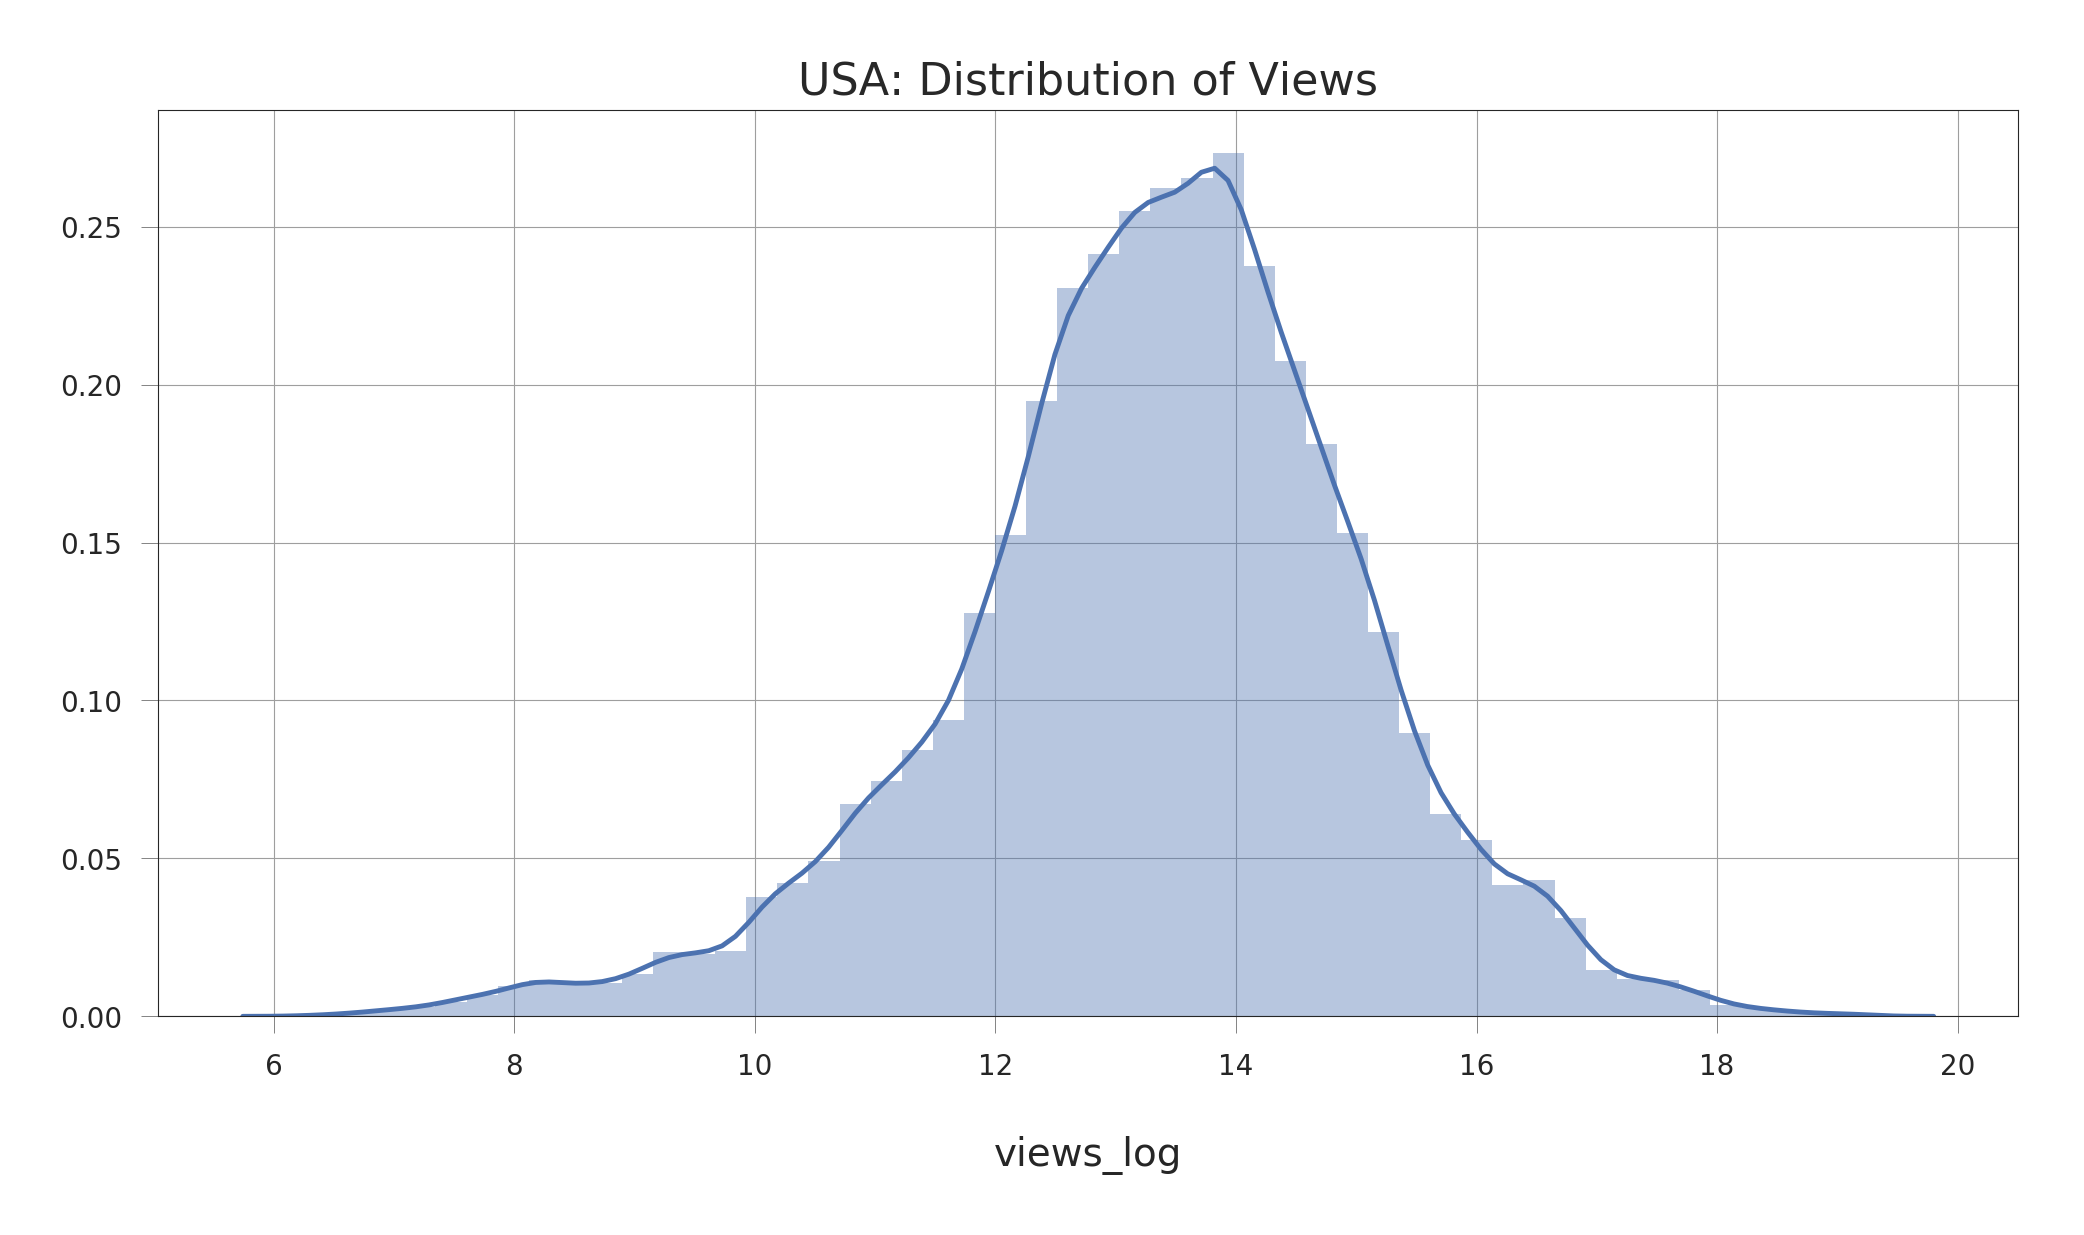

In [37]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("USA: Distribution of Views", fontsize=16);

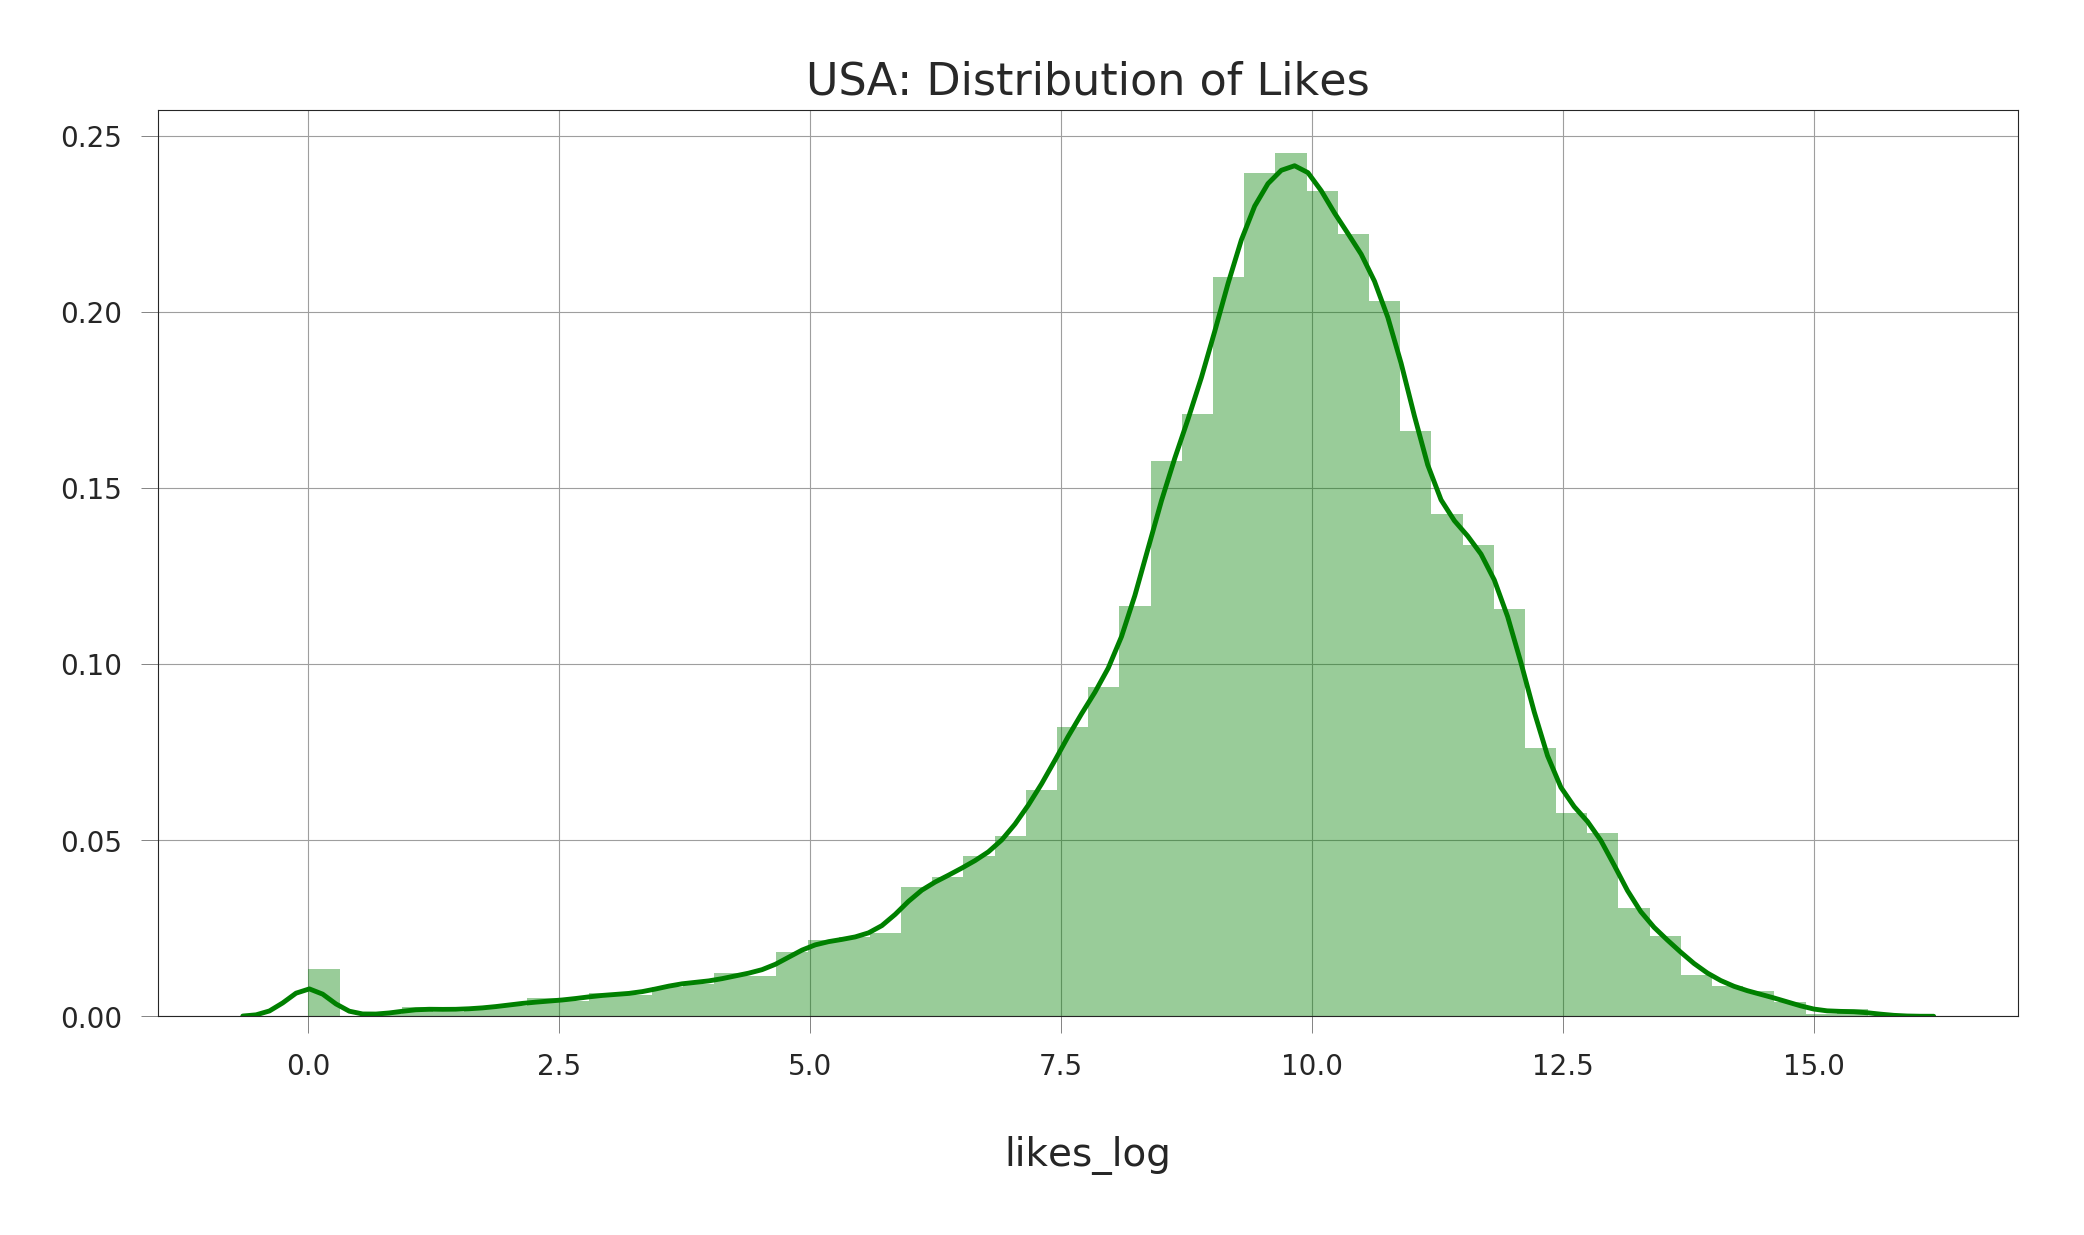

In [38]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('USA: Distribution of Likes', fontsize=16);

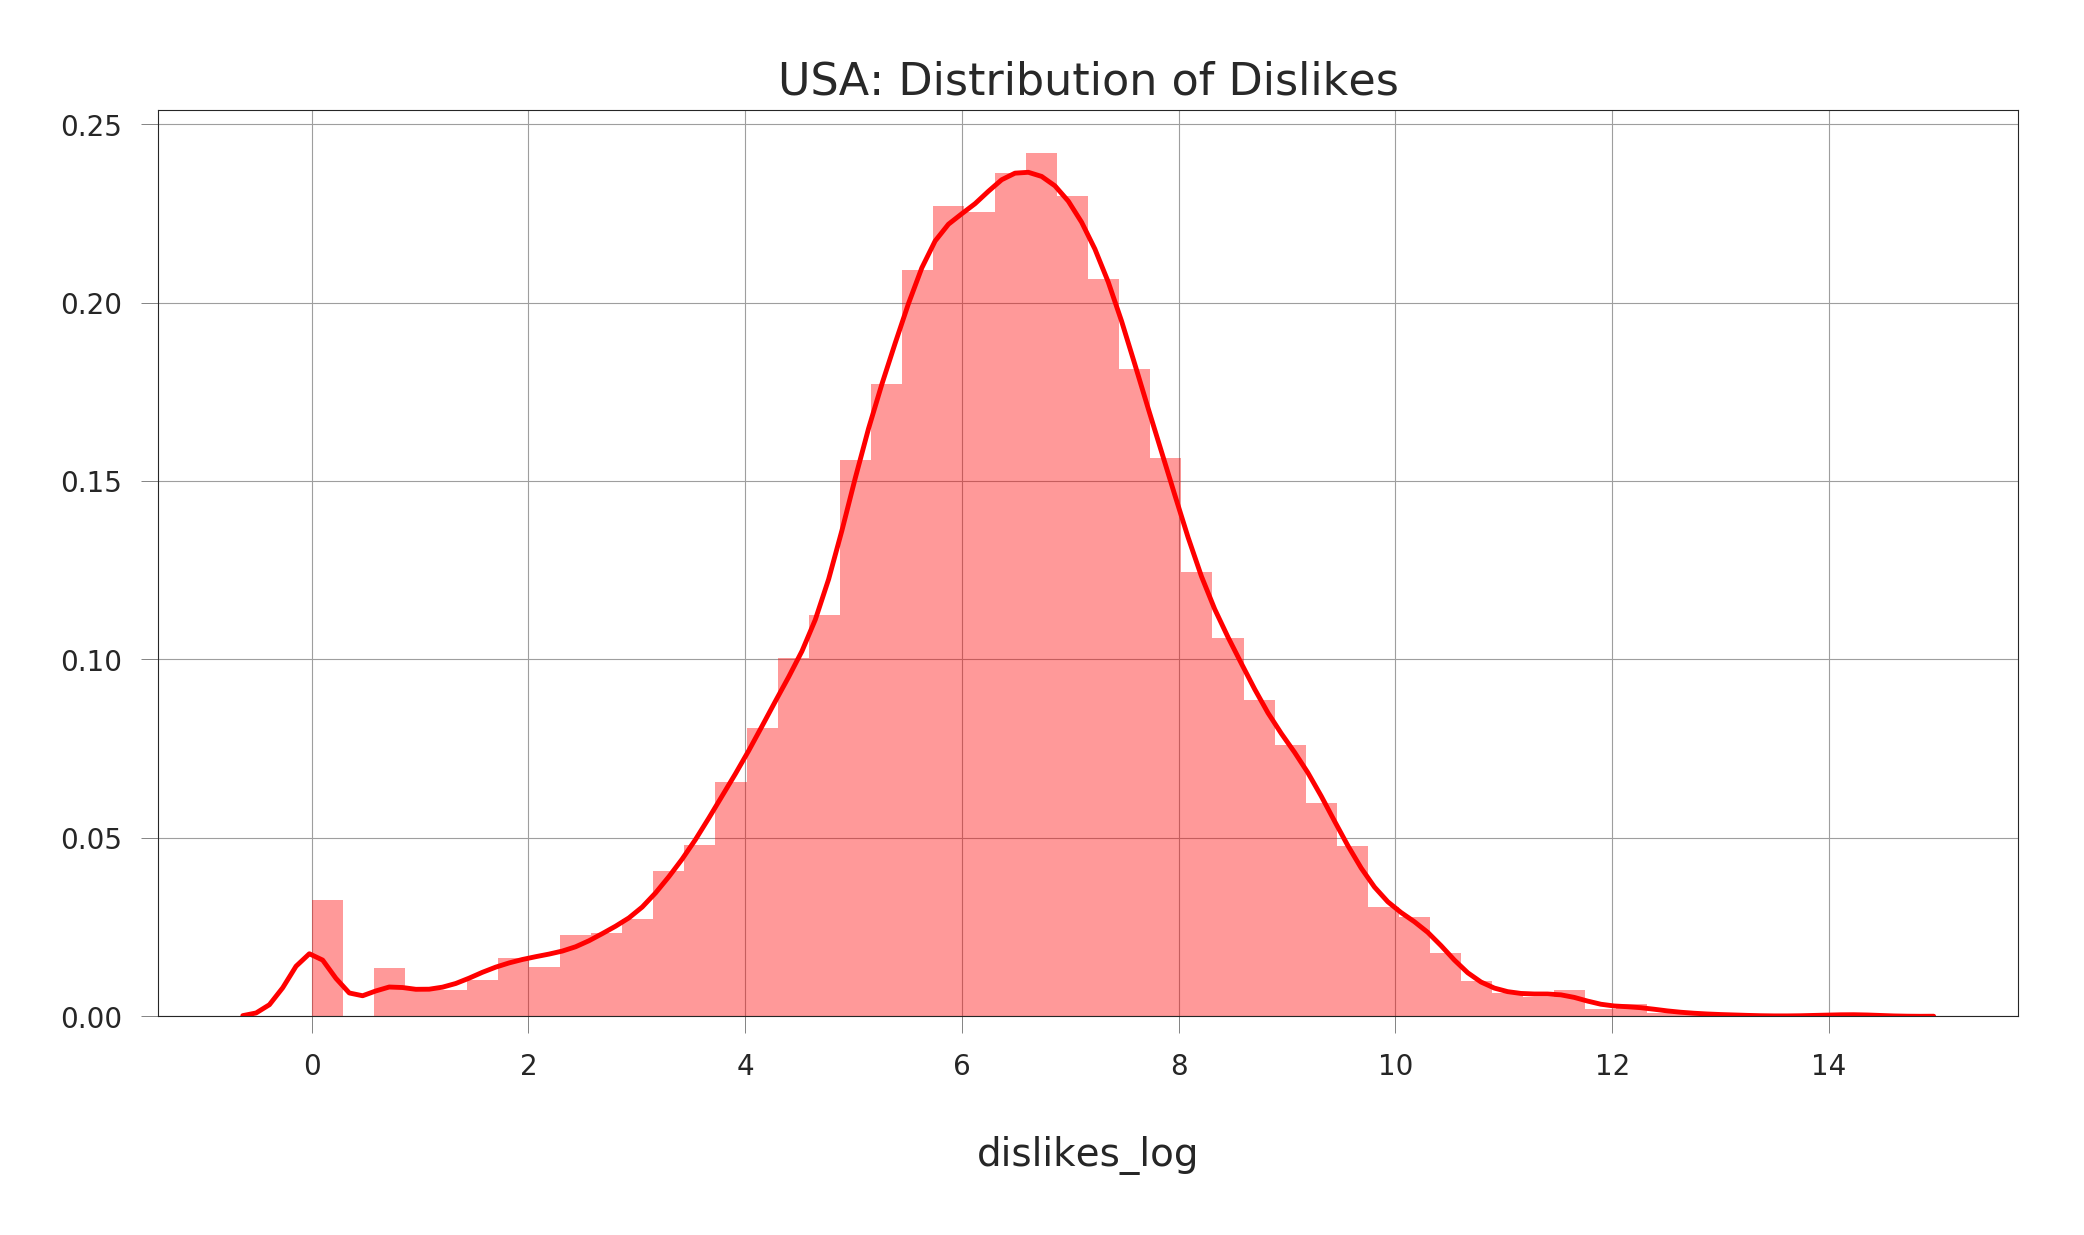

In [39]:
plt.figure(figsize = (12,6))
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("USA: Distribution of Dislikes", fontsize=16);

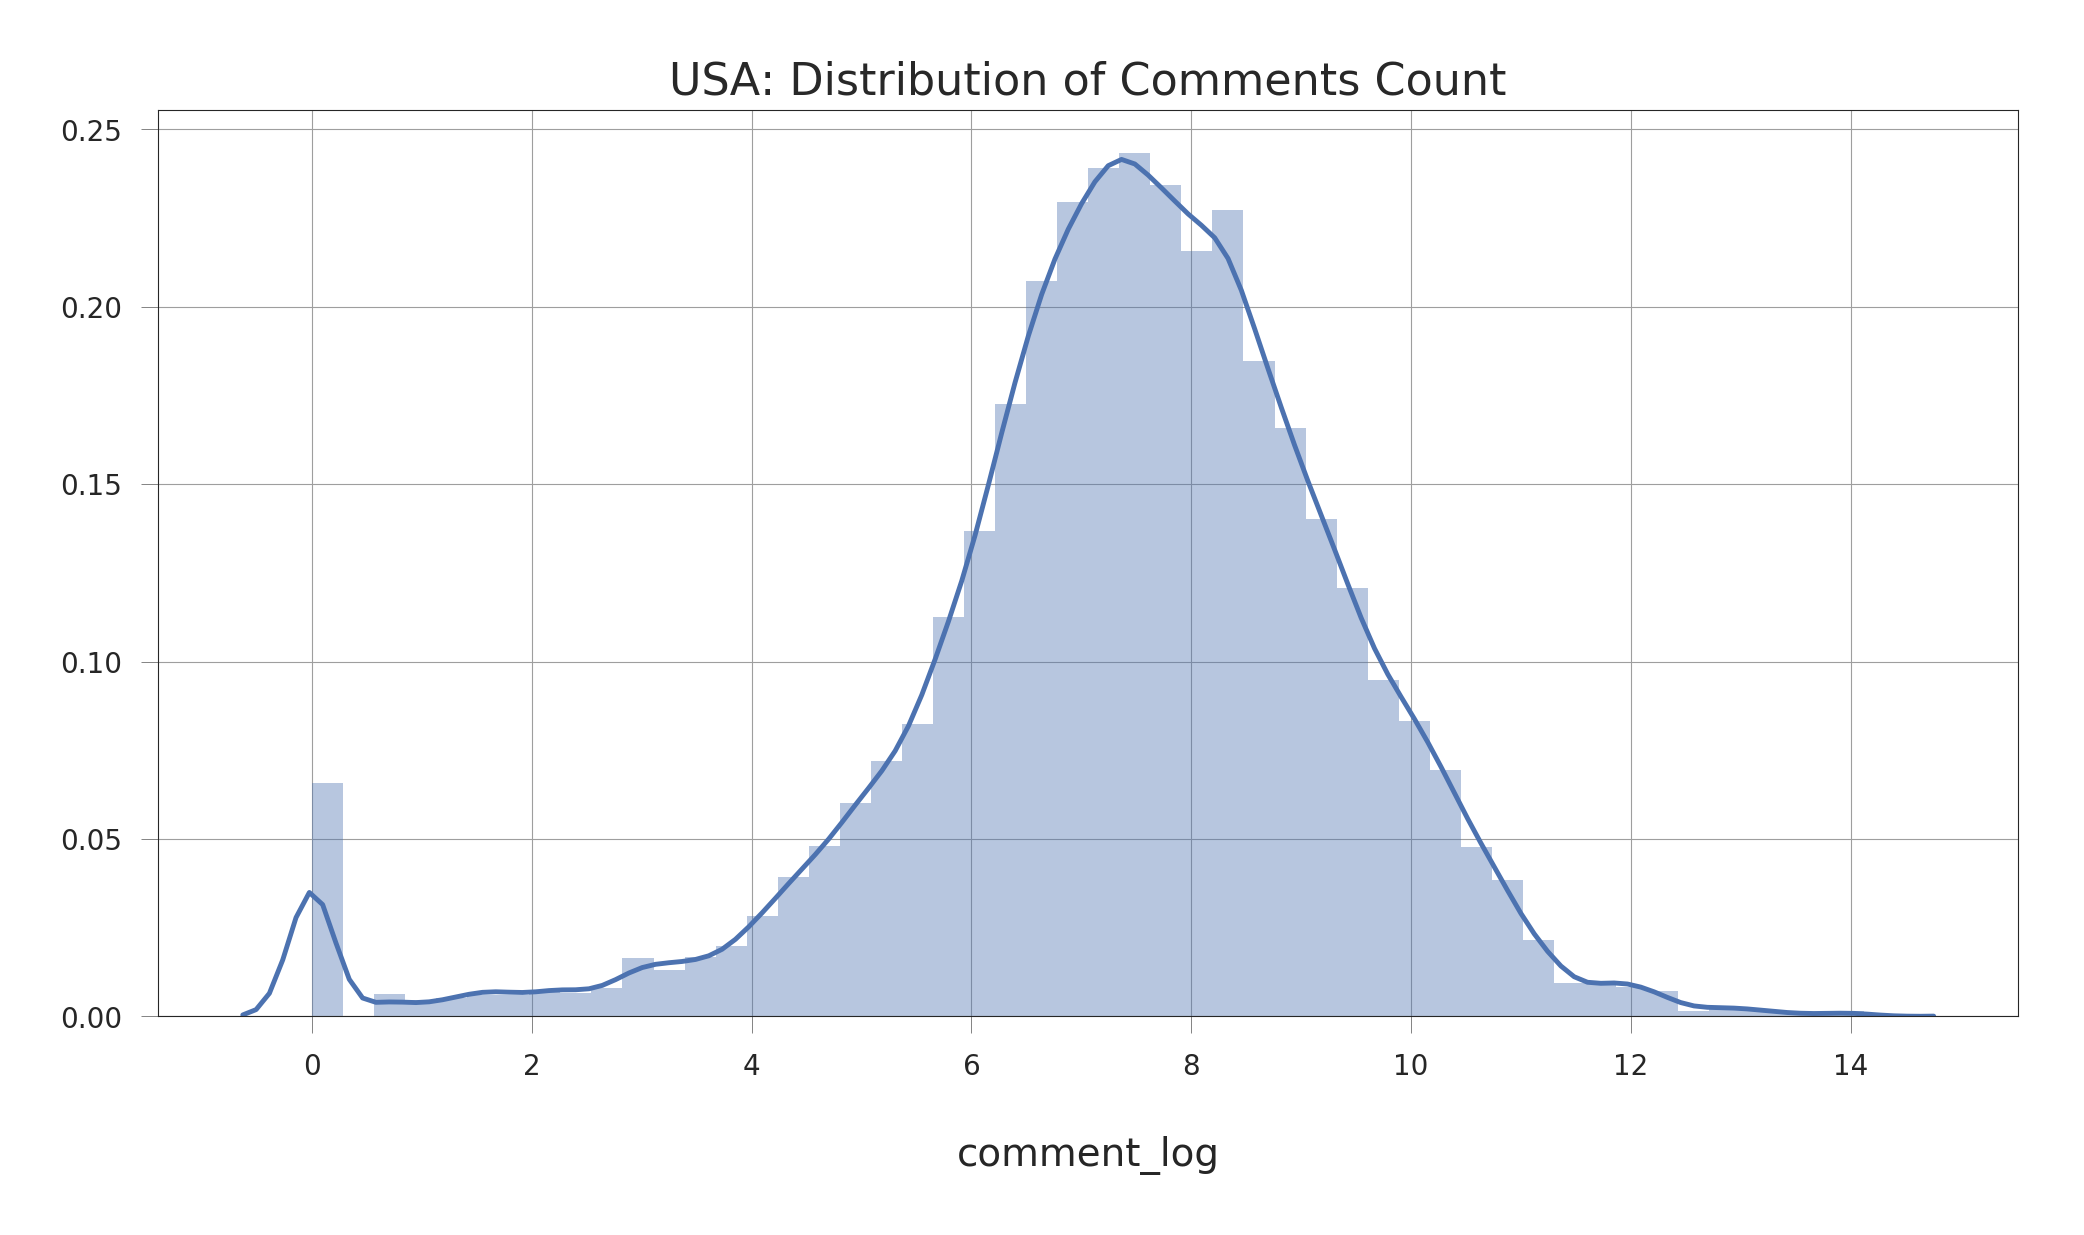

In [40]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("USA: Distribution of Comments Count", fontsize=16);

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 25 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null object
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_name             40949 non-null object
publishing_day            40949 non-null object
publishing_hour           40949 non-null object
likes_log                 

In [41]:
df['comments_disabled'].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

In [43]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [44]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [45]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

publish_date publish_time
video_id                             
2kyS6SvSYSE   2017-11-13     17:13:01
1ZAPwfrtAFY   2017-11-13     07:30:00
5qpjK5DgCt4   2017-11-12     19:05:24
puqaWrEC7tY   2017-11-13     11:00:04
d380meD0W0M   2017-11-12     18:01:41

In [46]:
df.info()

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 26 columns):
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null object
publish_date              40949 non-null object
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_name             40949 non-null object
publishing_day            40949 non-null object
publishing_hour   

In [47]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

Empty DataFrame
Columns: [trending_date, title, channel_title, category_id, publish_date, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description, category_name, publishing_day, publishing_hour, likes_log, views_log, dislikes_log, comment_log, like_rate, dislike_rate, comment_rate]
Index: []

[0 rows x 26 columns]

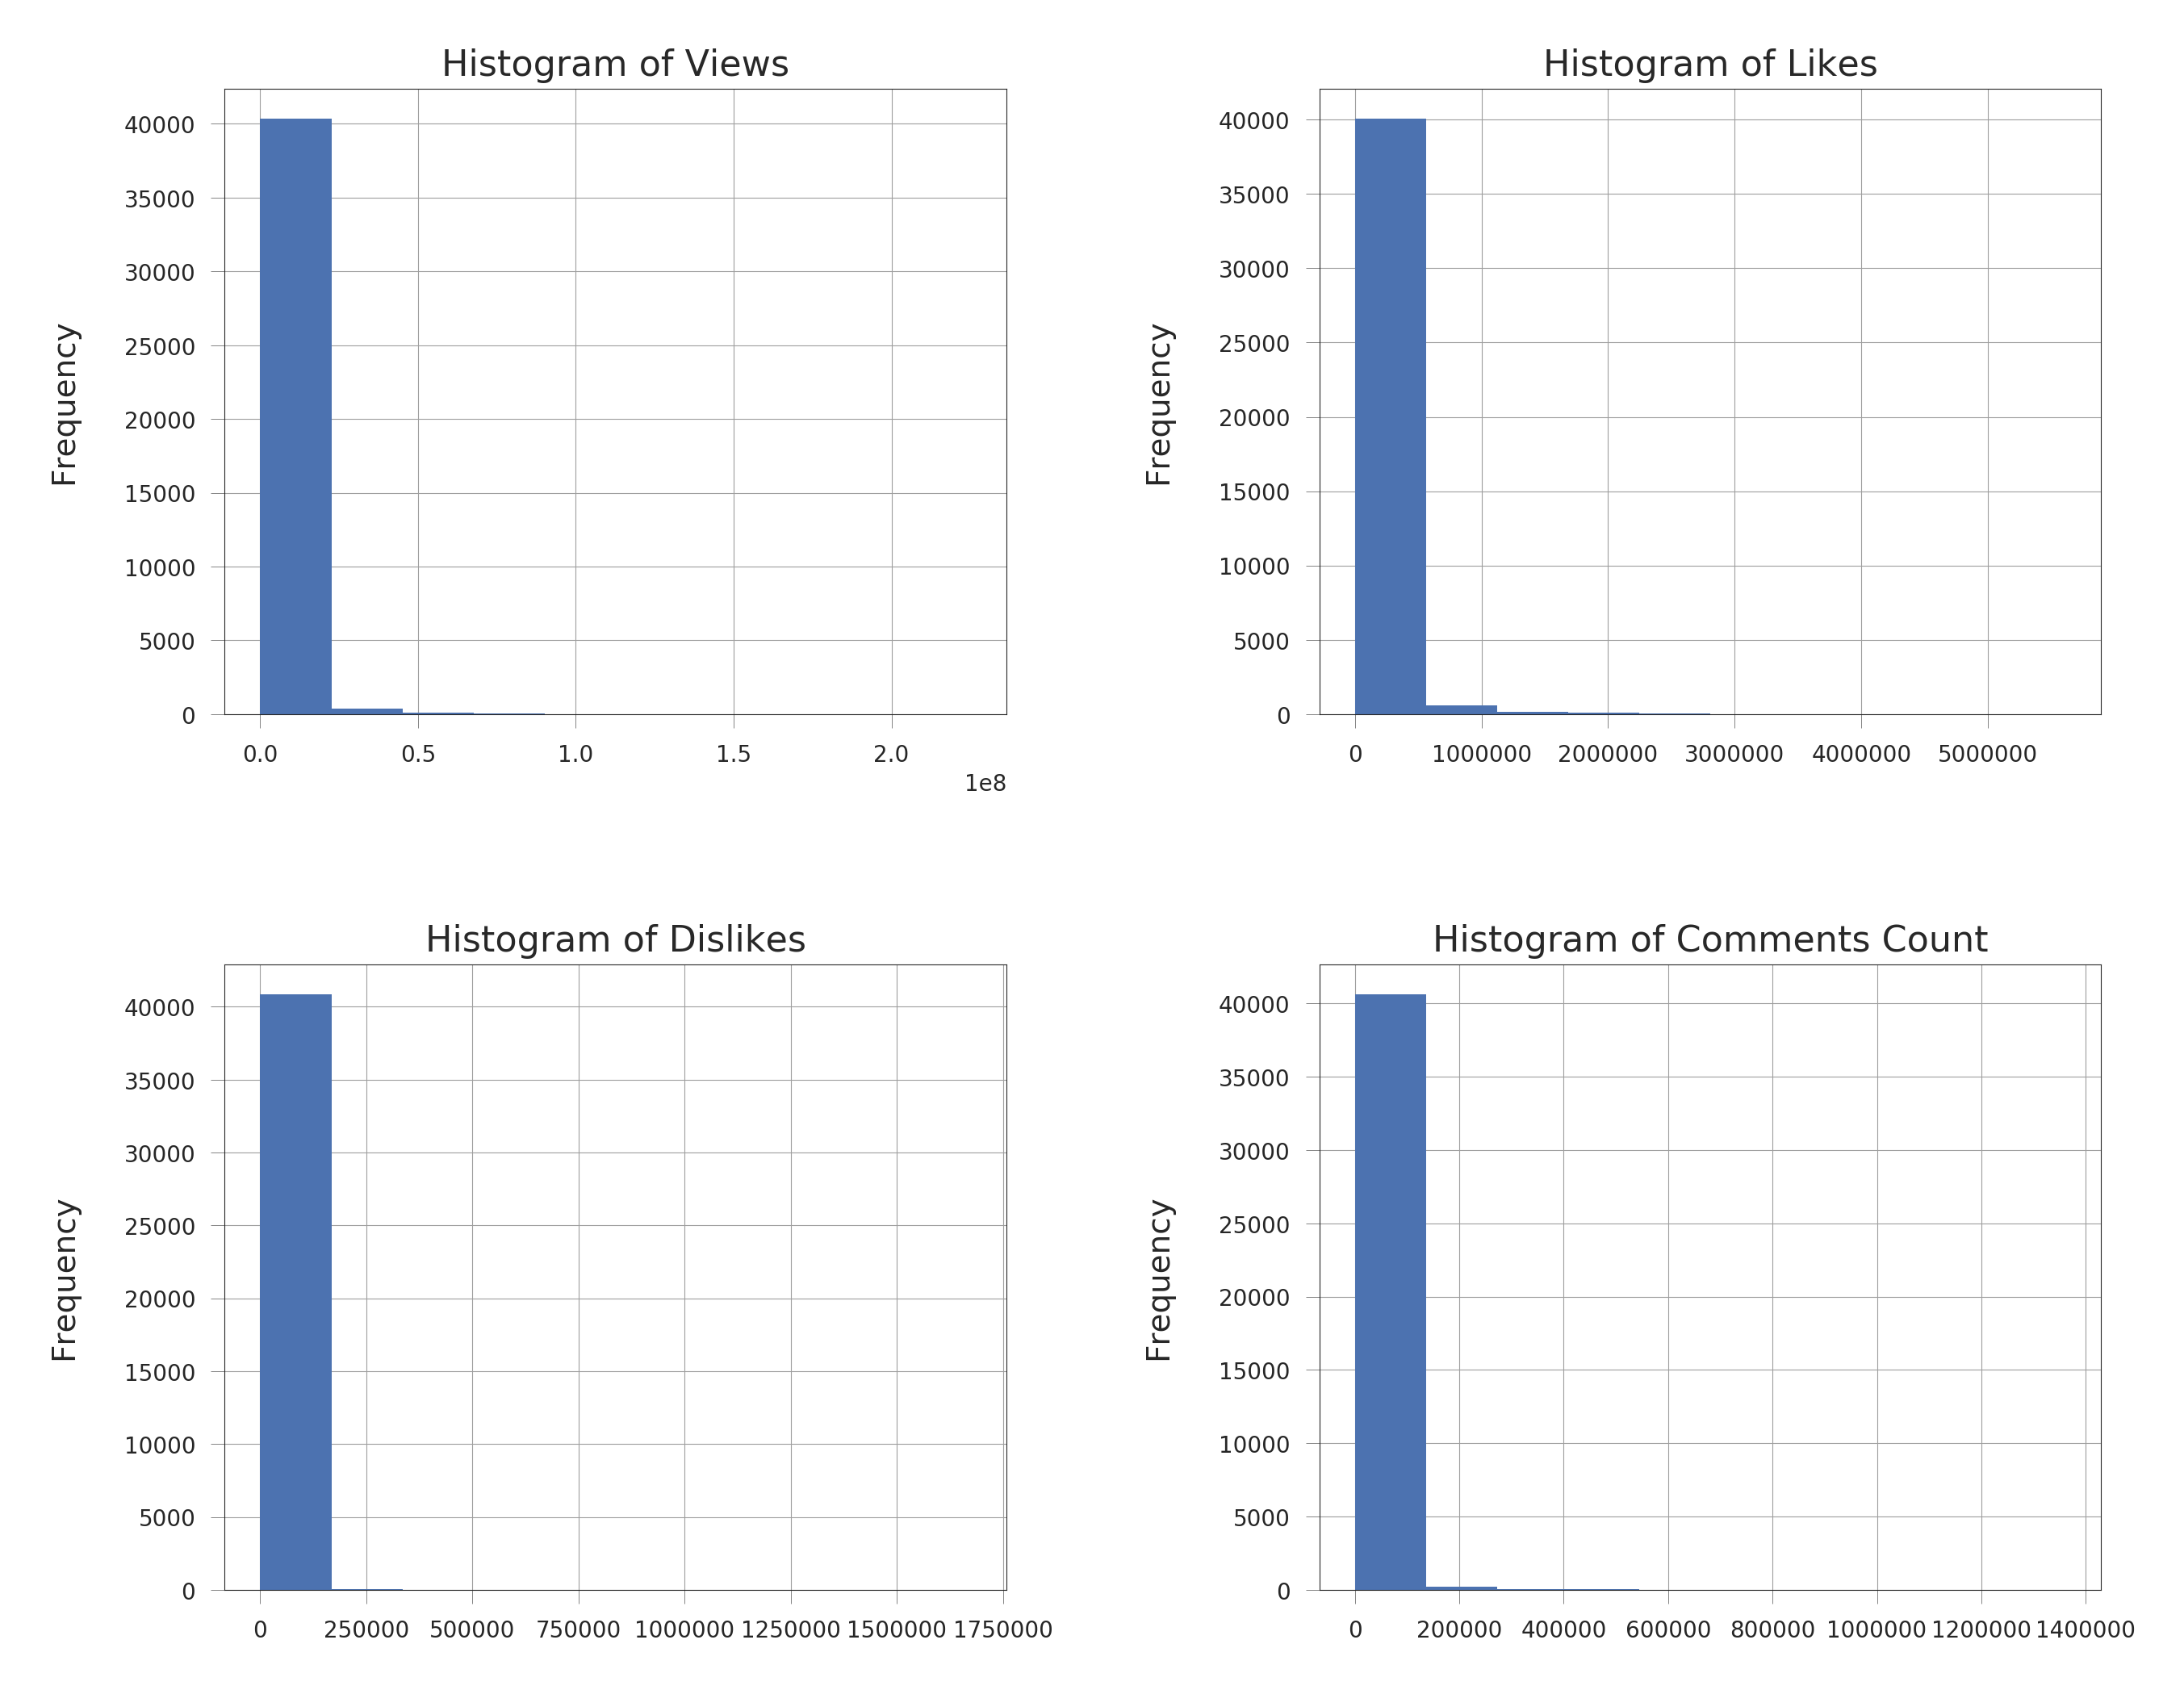

In [48]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

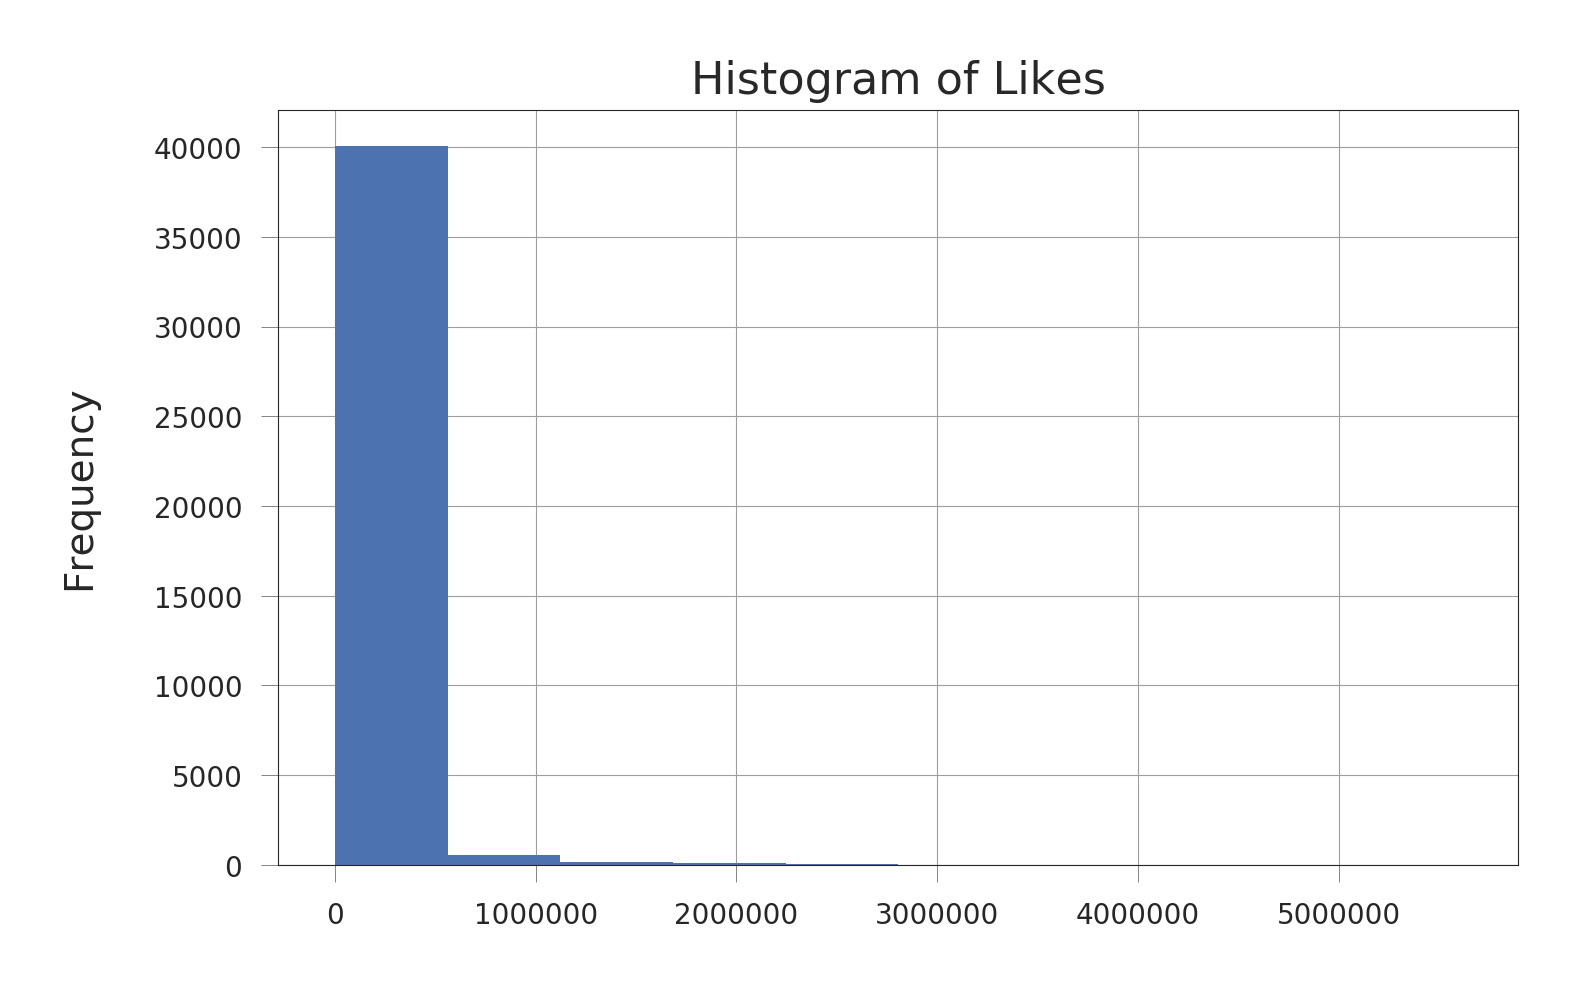

In [49]:
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16);

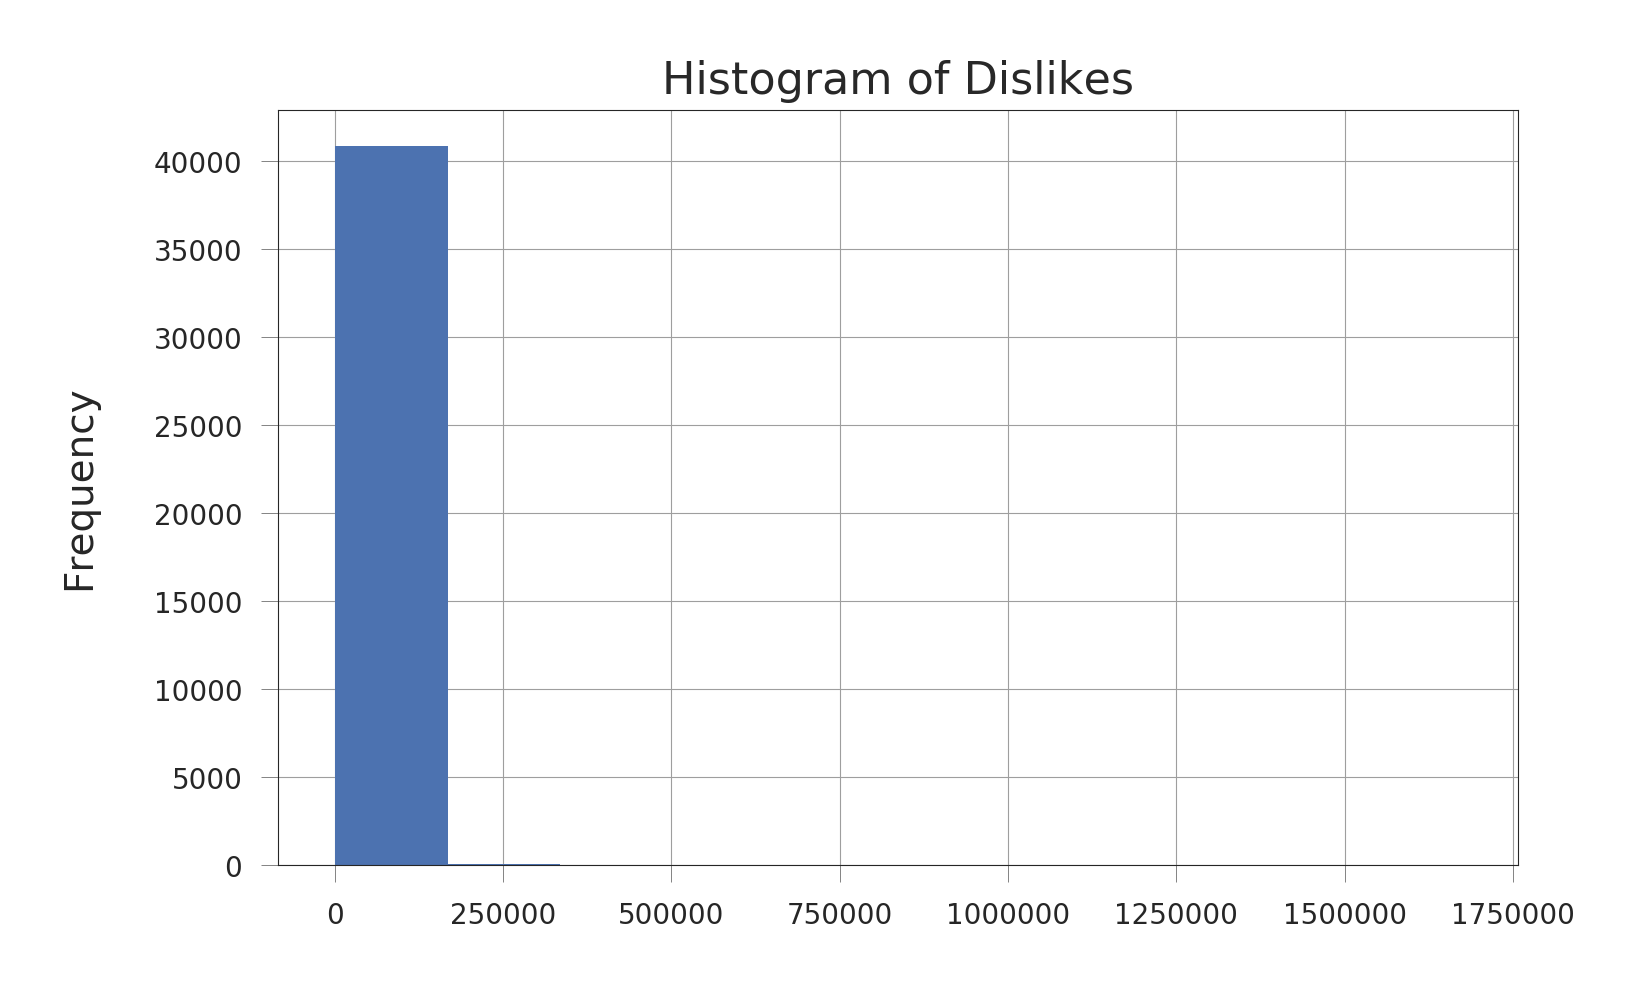

In [50]:
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16);

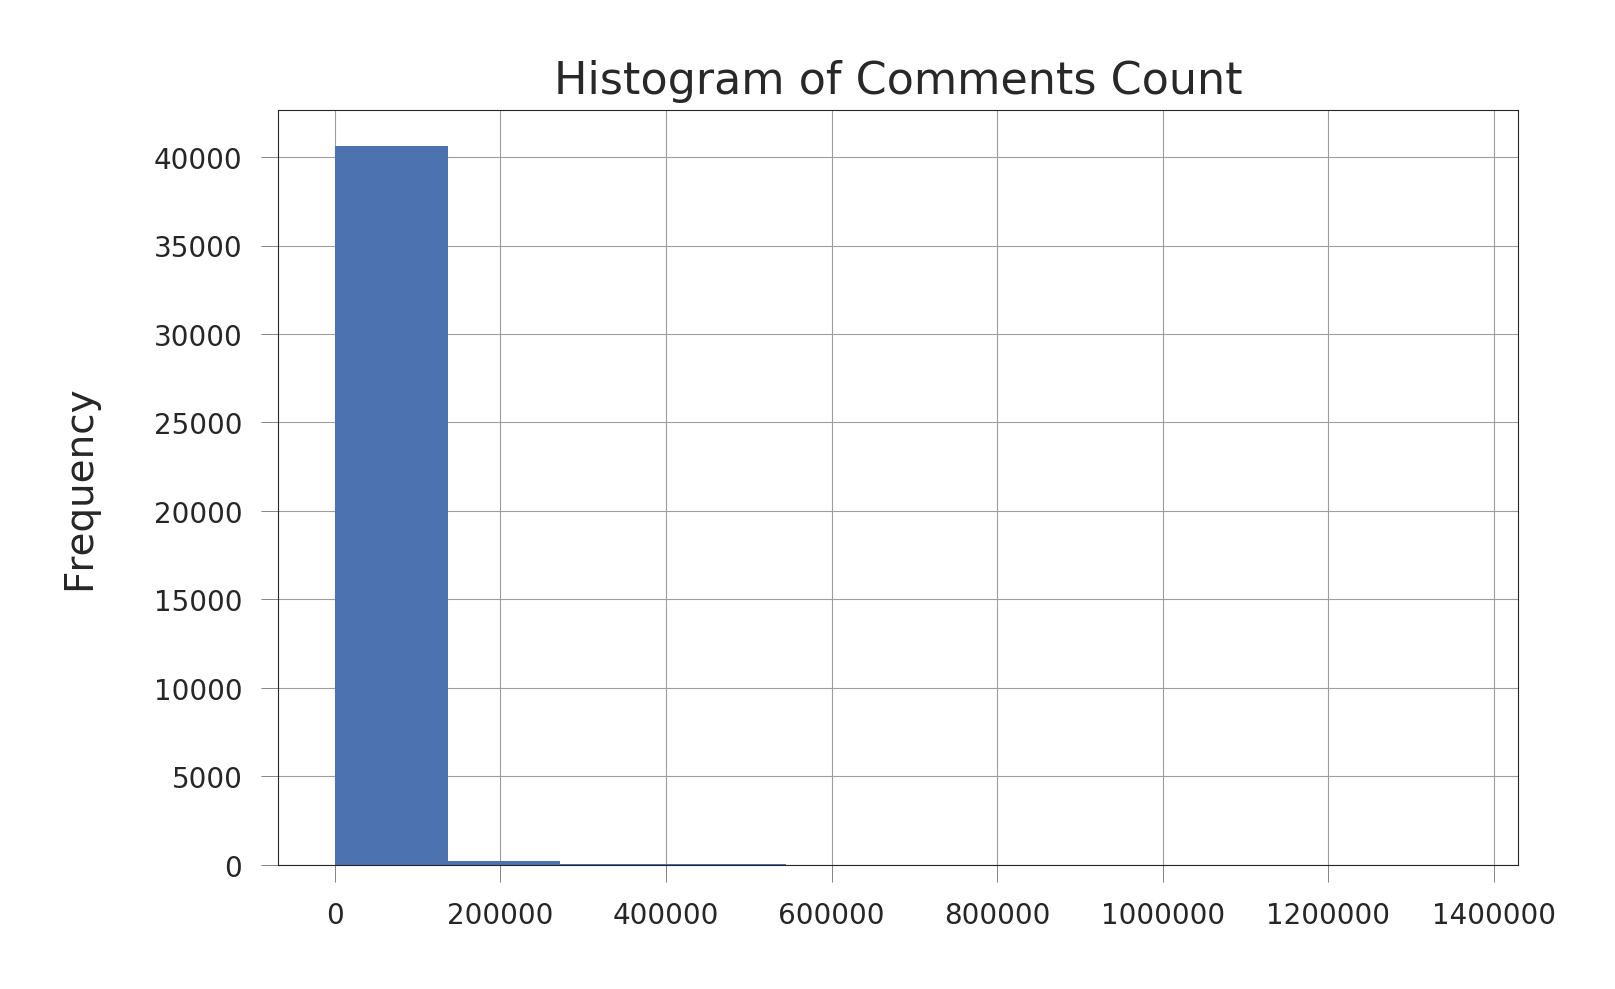

In [51]:
h=df['comment_count'].plot.hist()
h.set_title("Histogram of Comments Count", fontsize=16);

In [52]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix 

views  likes  dislikes  comment_count
views           1.00   0.85      0.47           0.62
likes           0.85   1.00      0.45           0.80
dislikes        0.47   0.45      1.00           0.70
comment_count   0.62   0.80      0.70           1.00

In [53]:
df['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

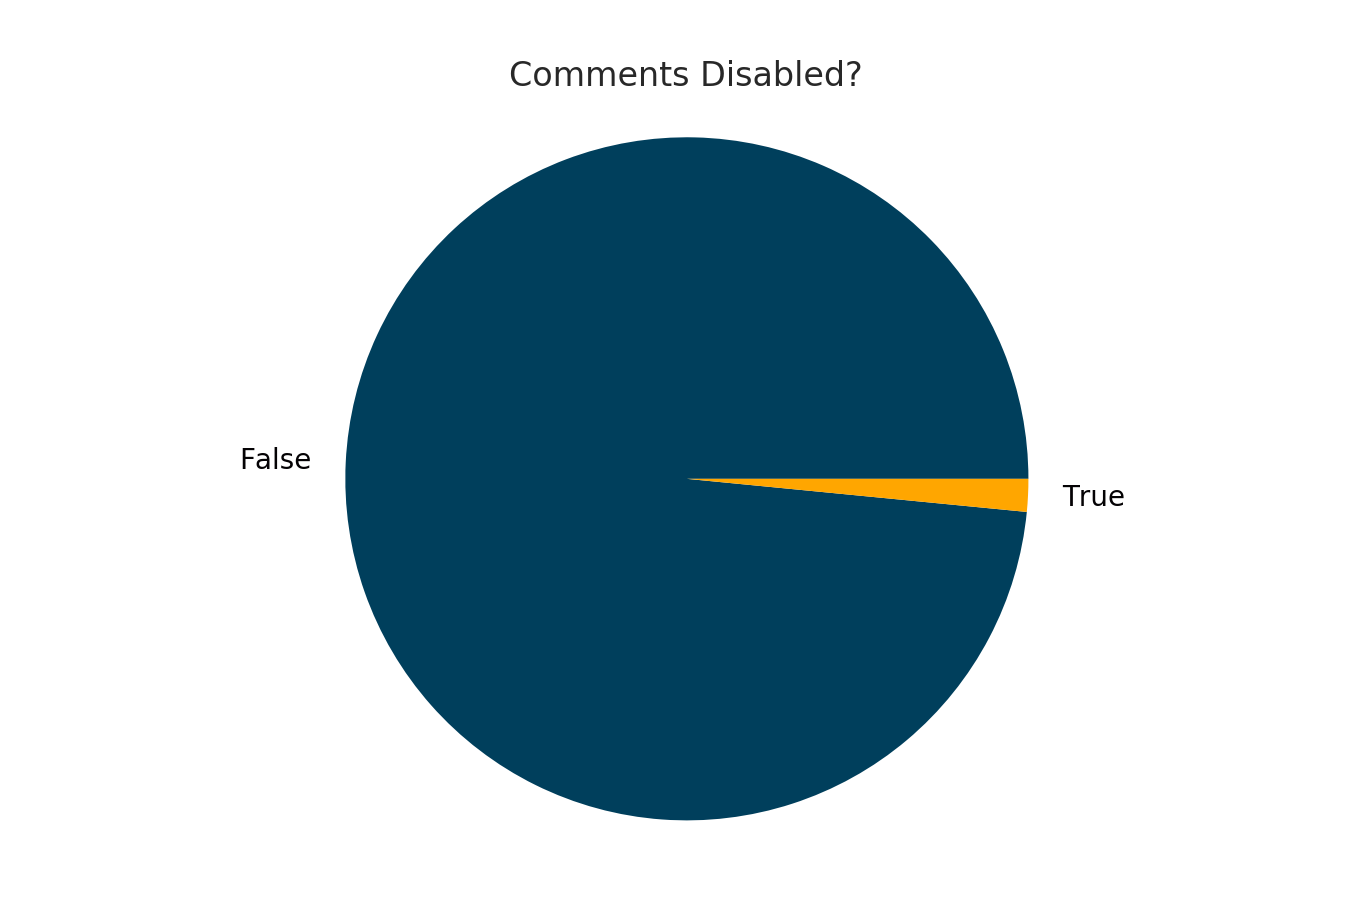

In [54]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

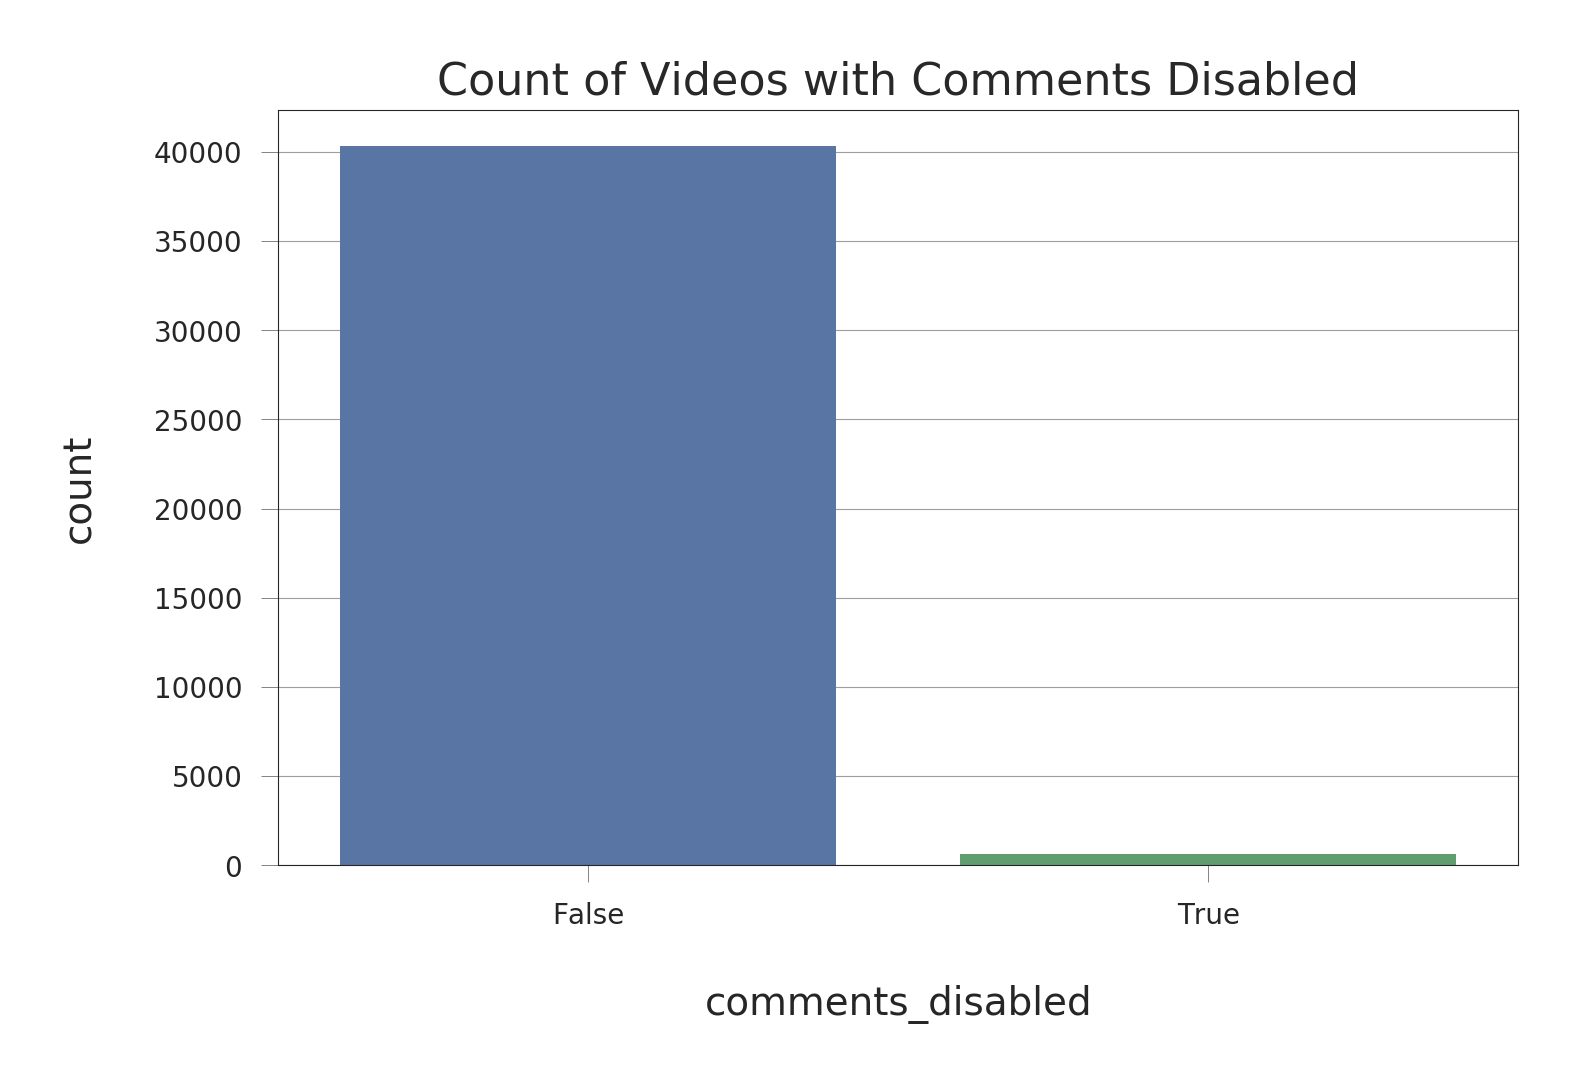

In [55]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);


In [56]:
df['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

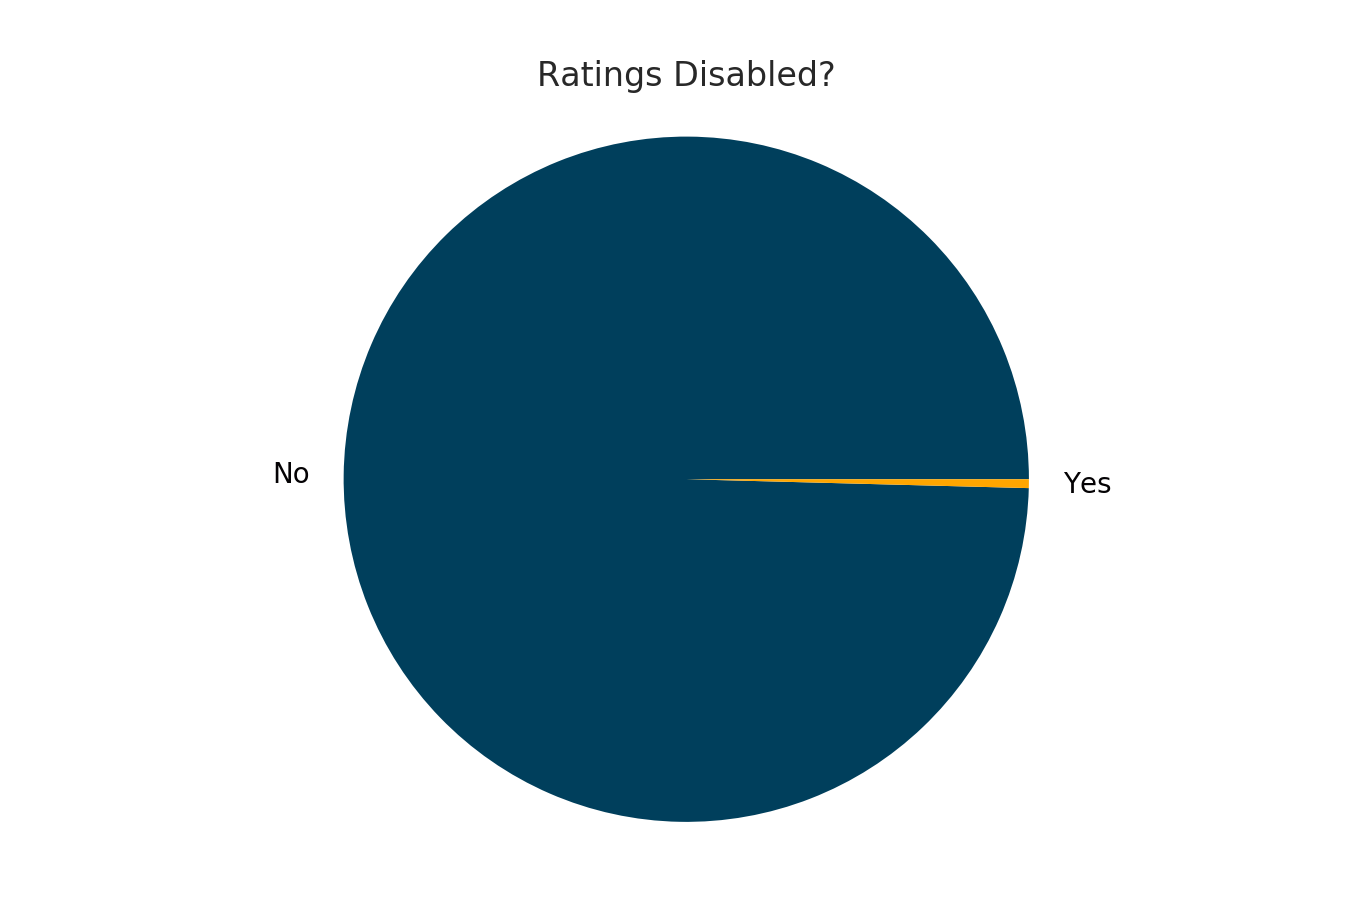

In [57]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

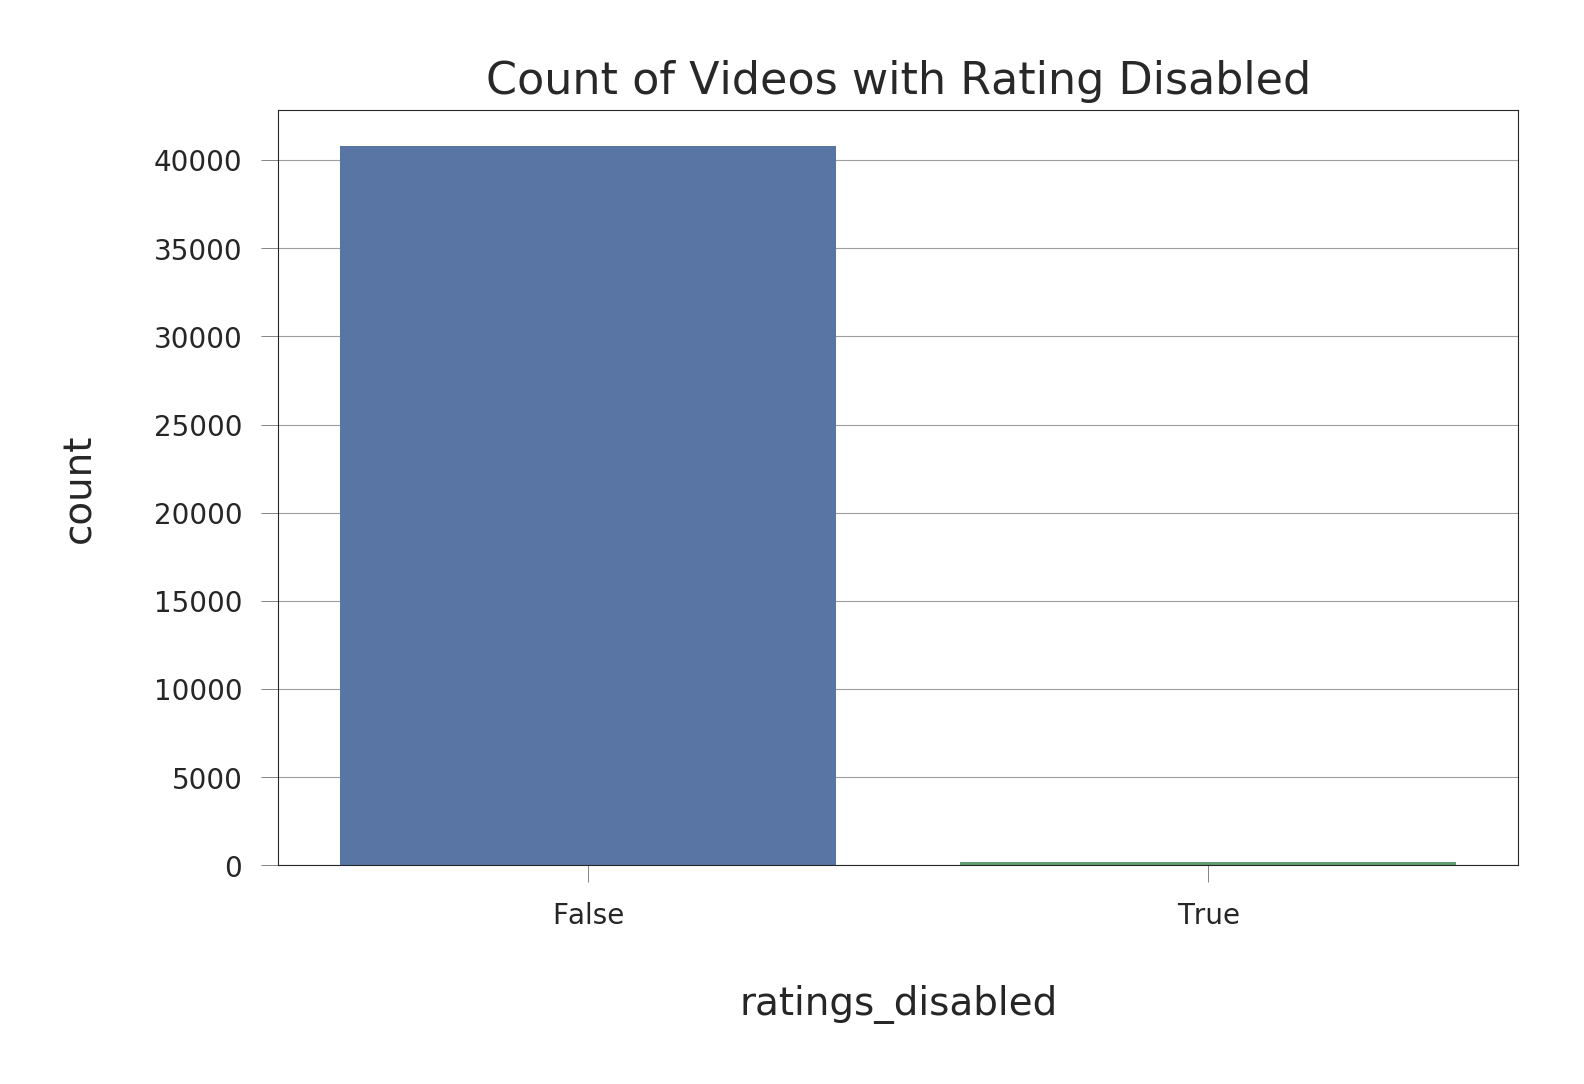

In [58]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [59]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

In [60]:
df['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

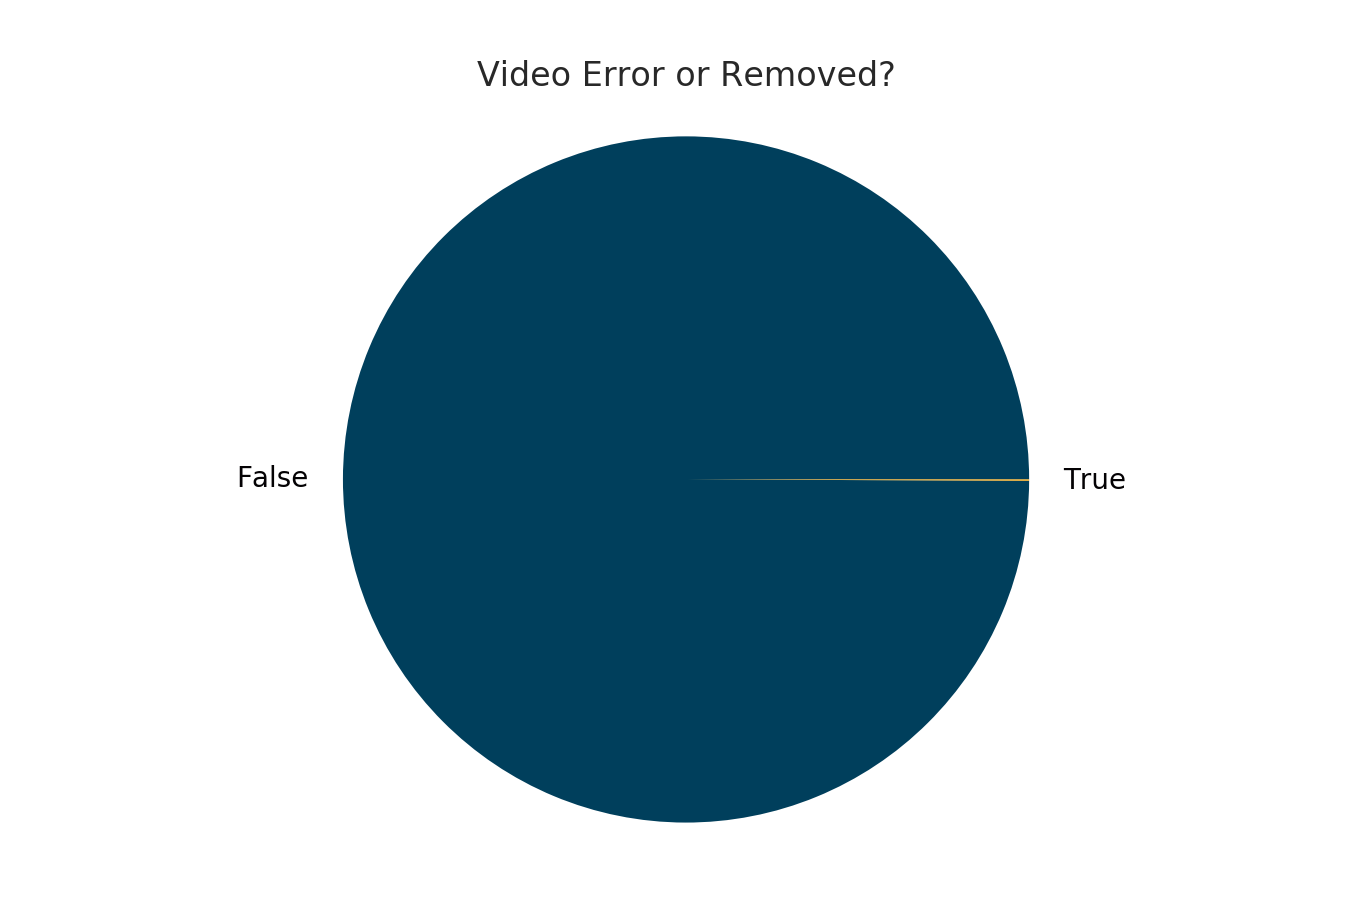

In [61]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

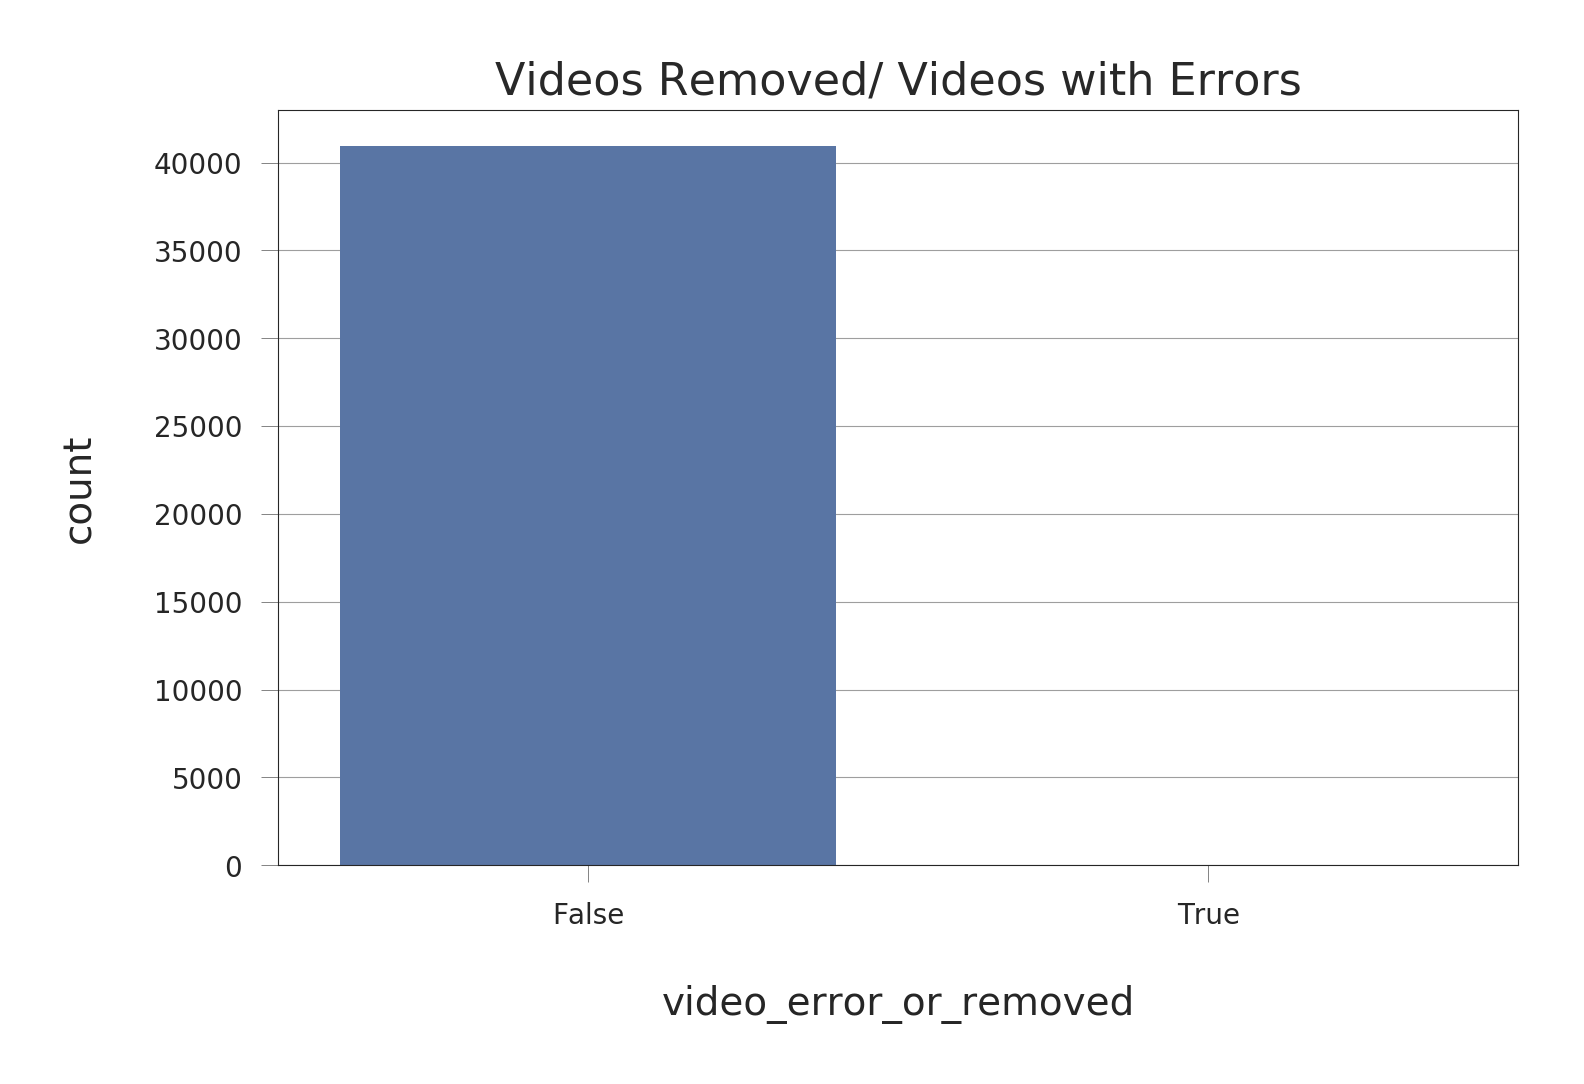

In [62]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);


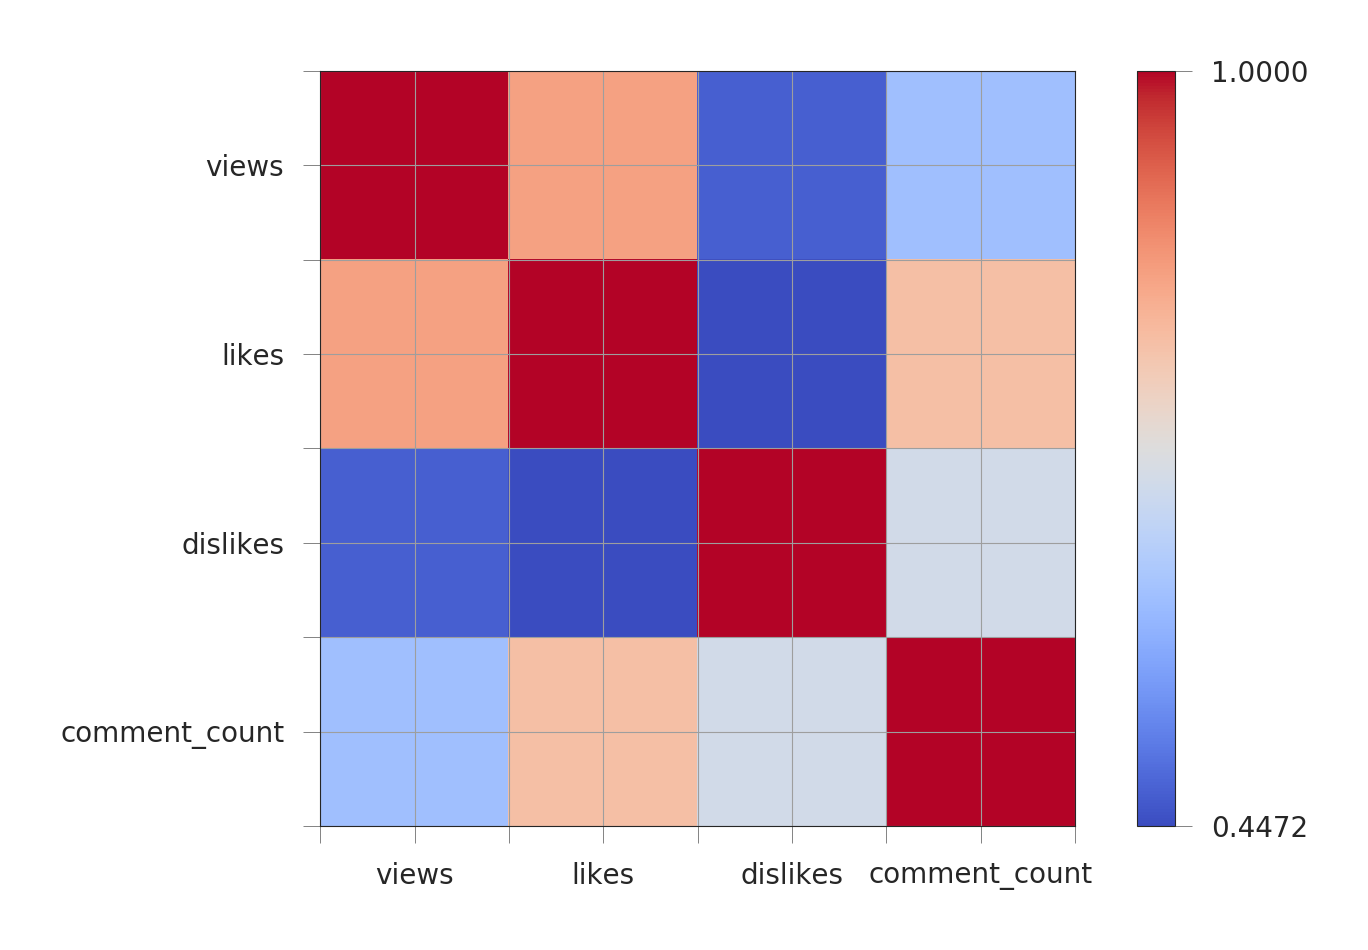

In [63]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show();

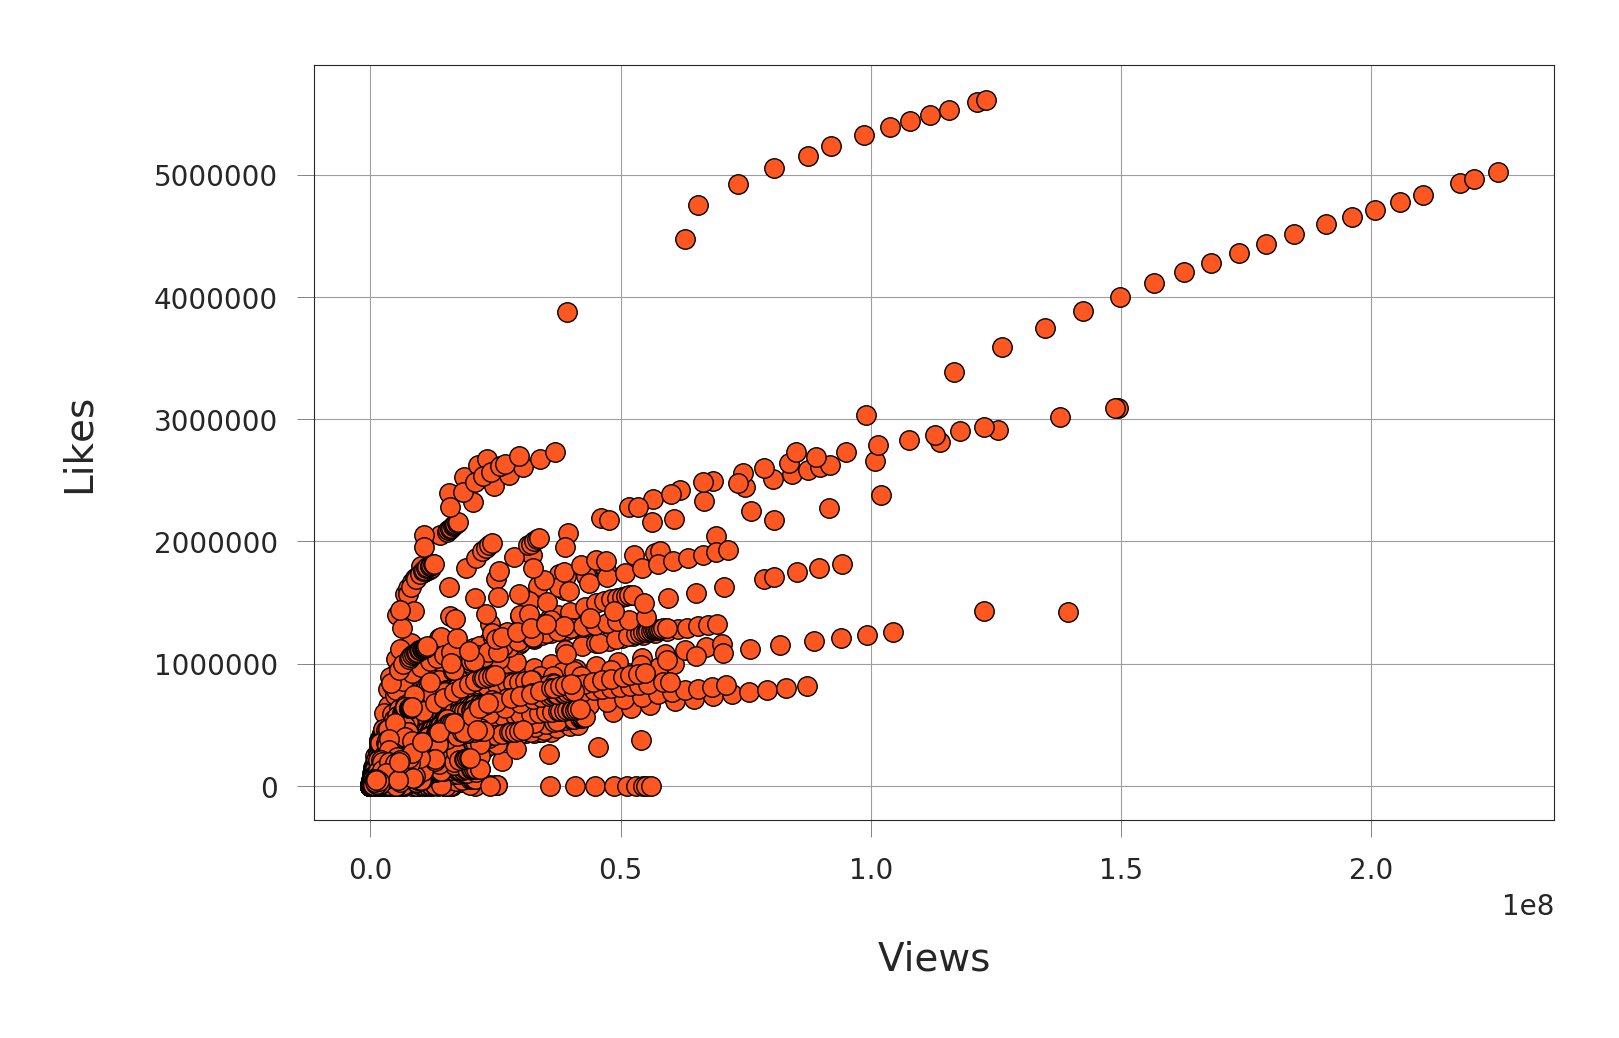

In [64]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

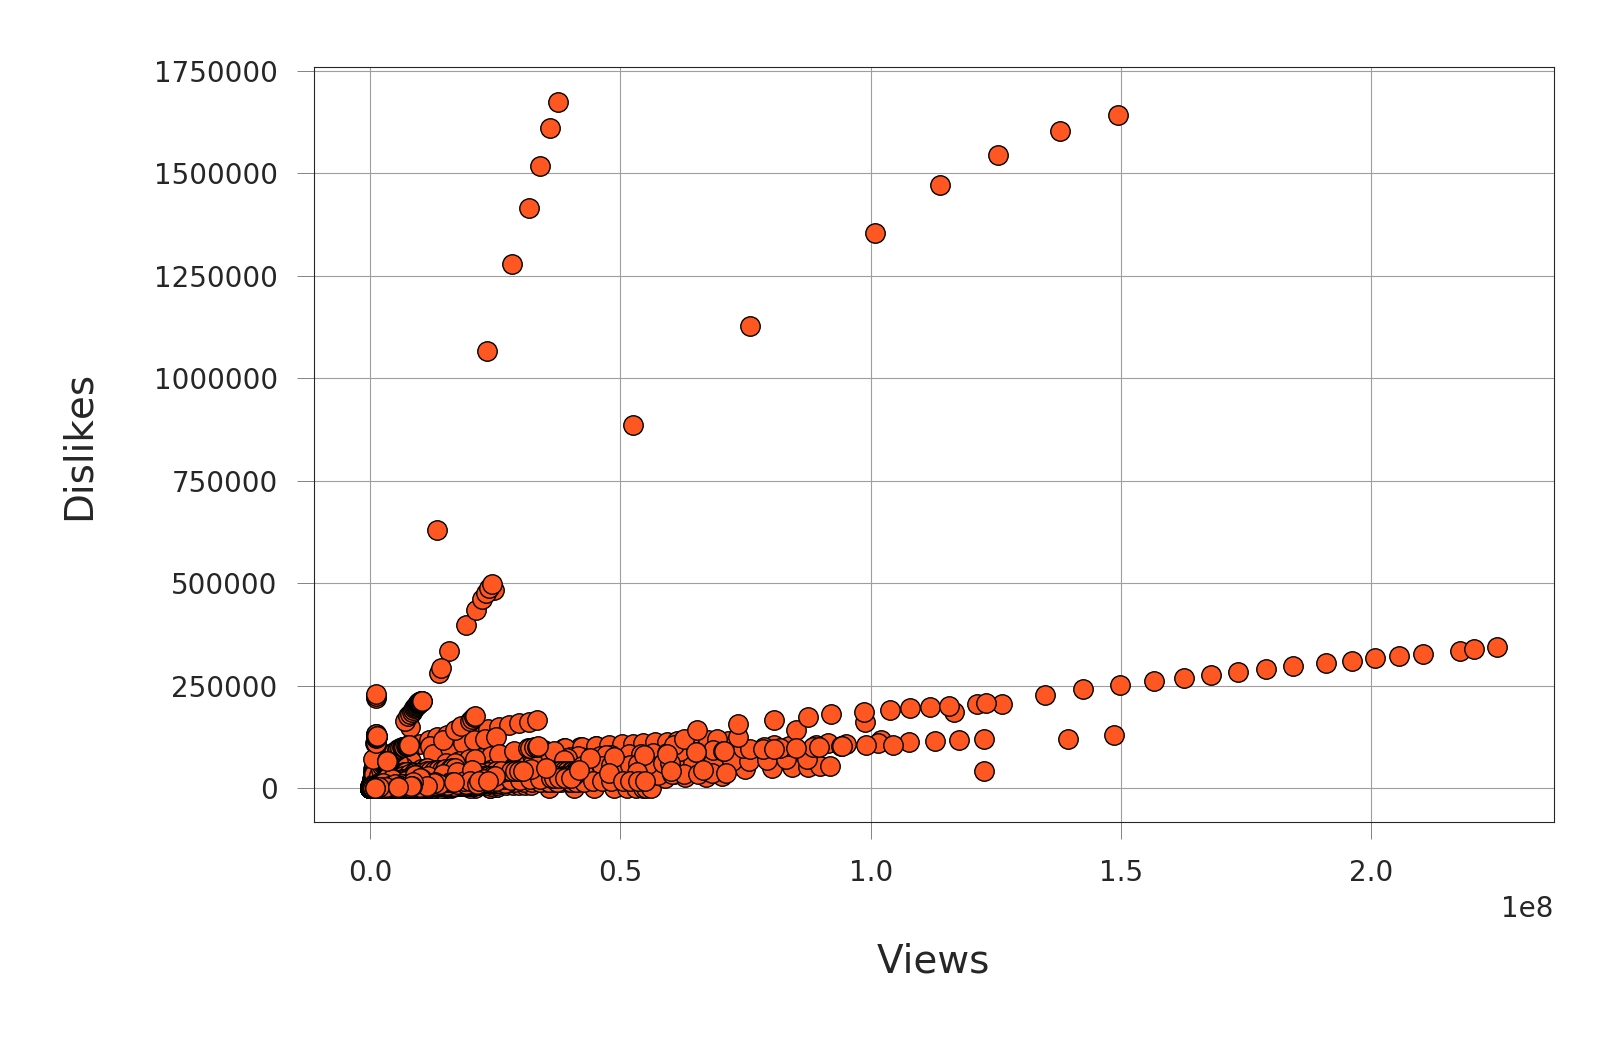

In [65]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

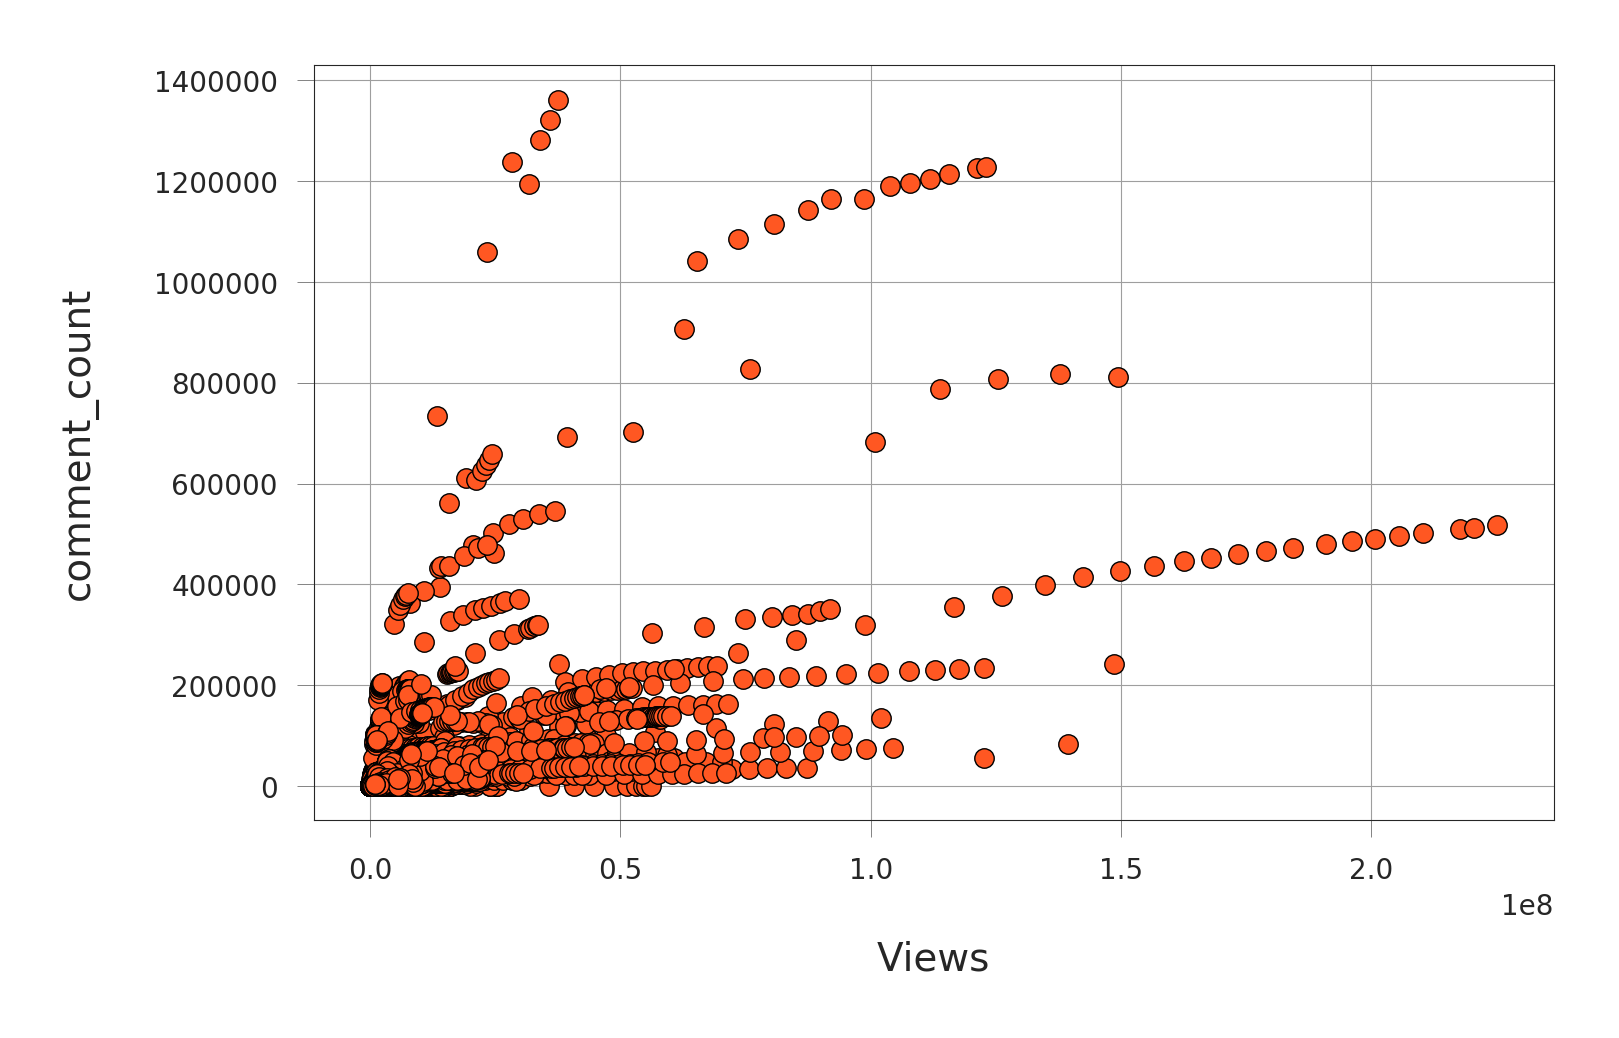

In [66]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="comment_count");

In [67]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


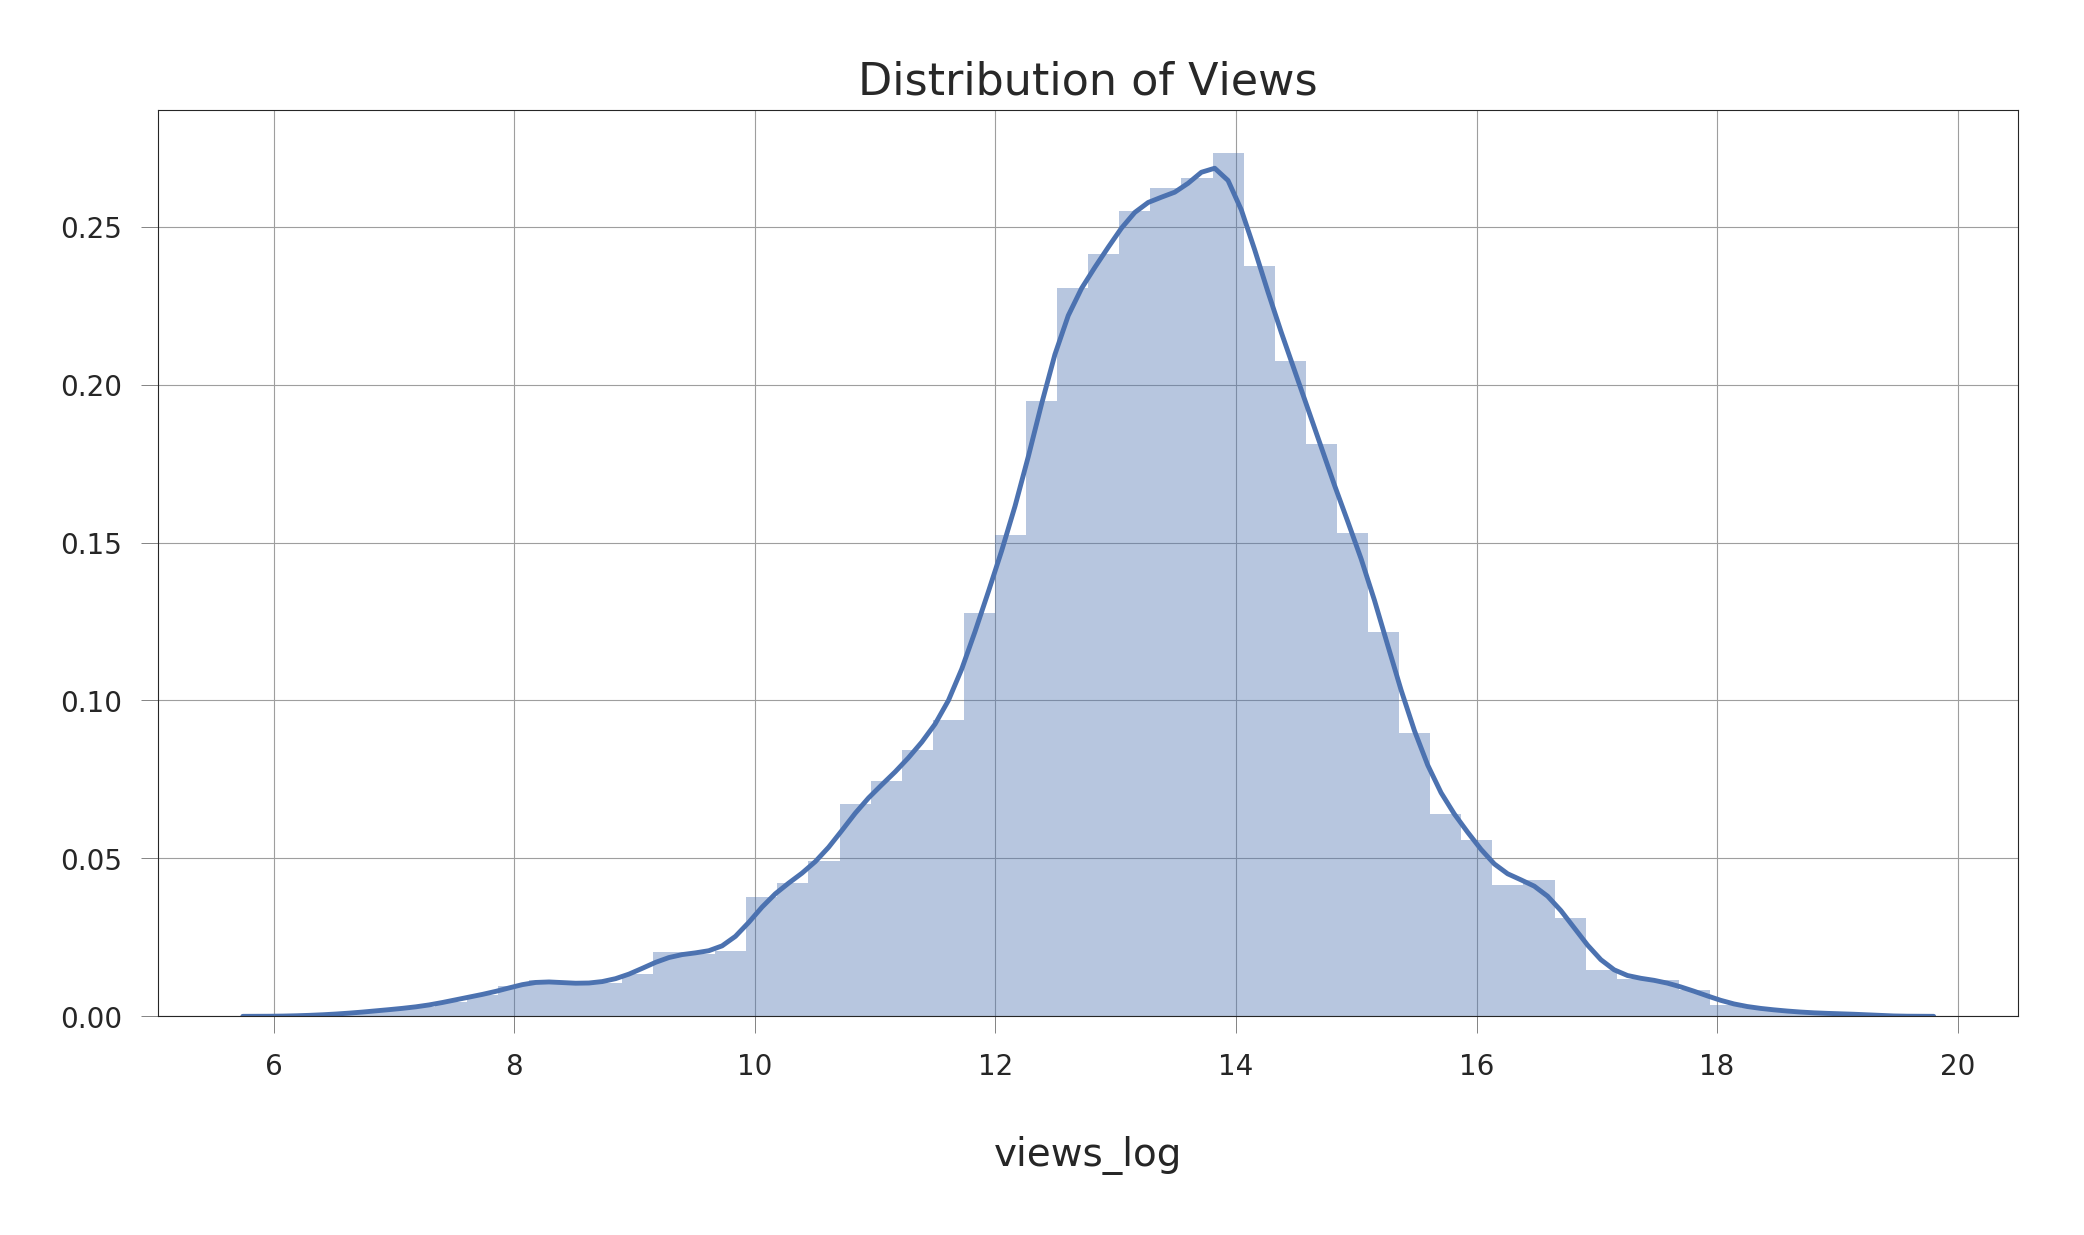

In [68]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16);

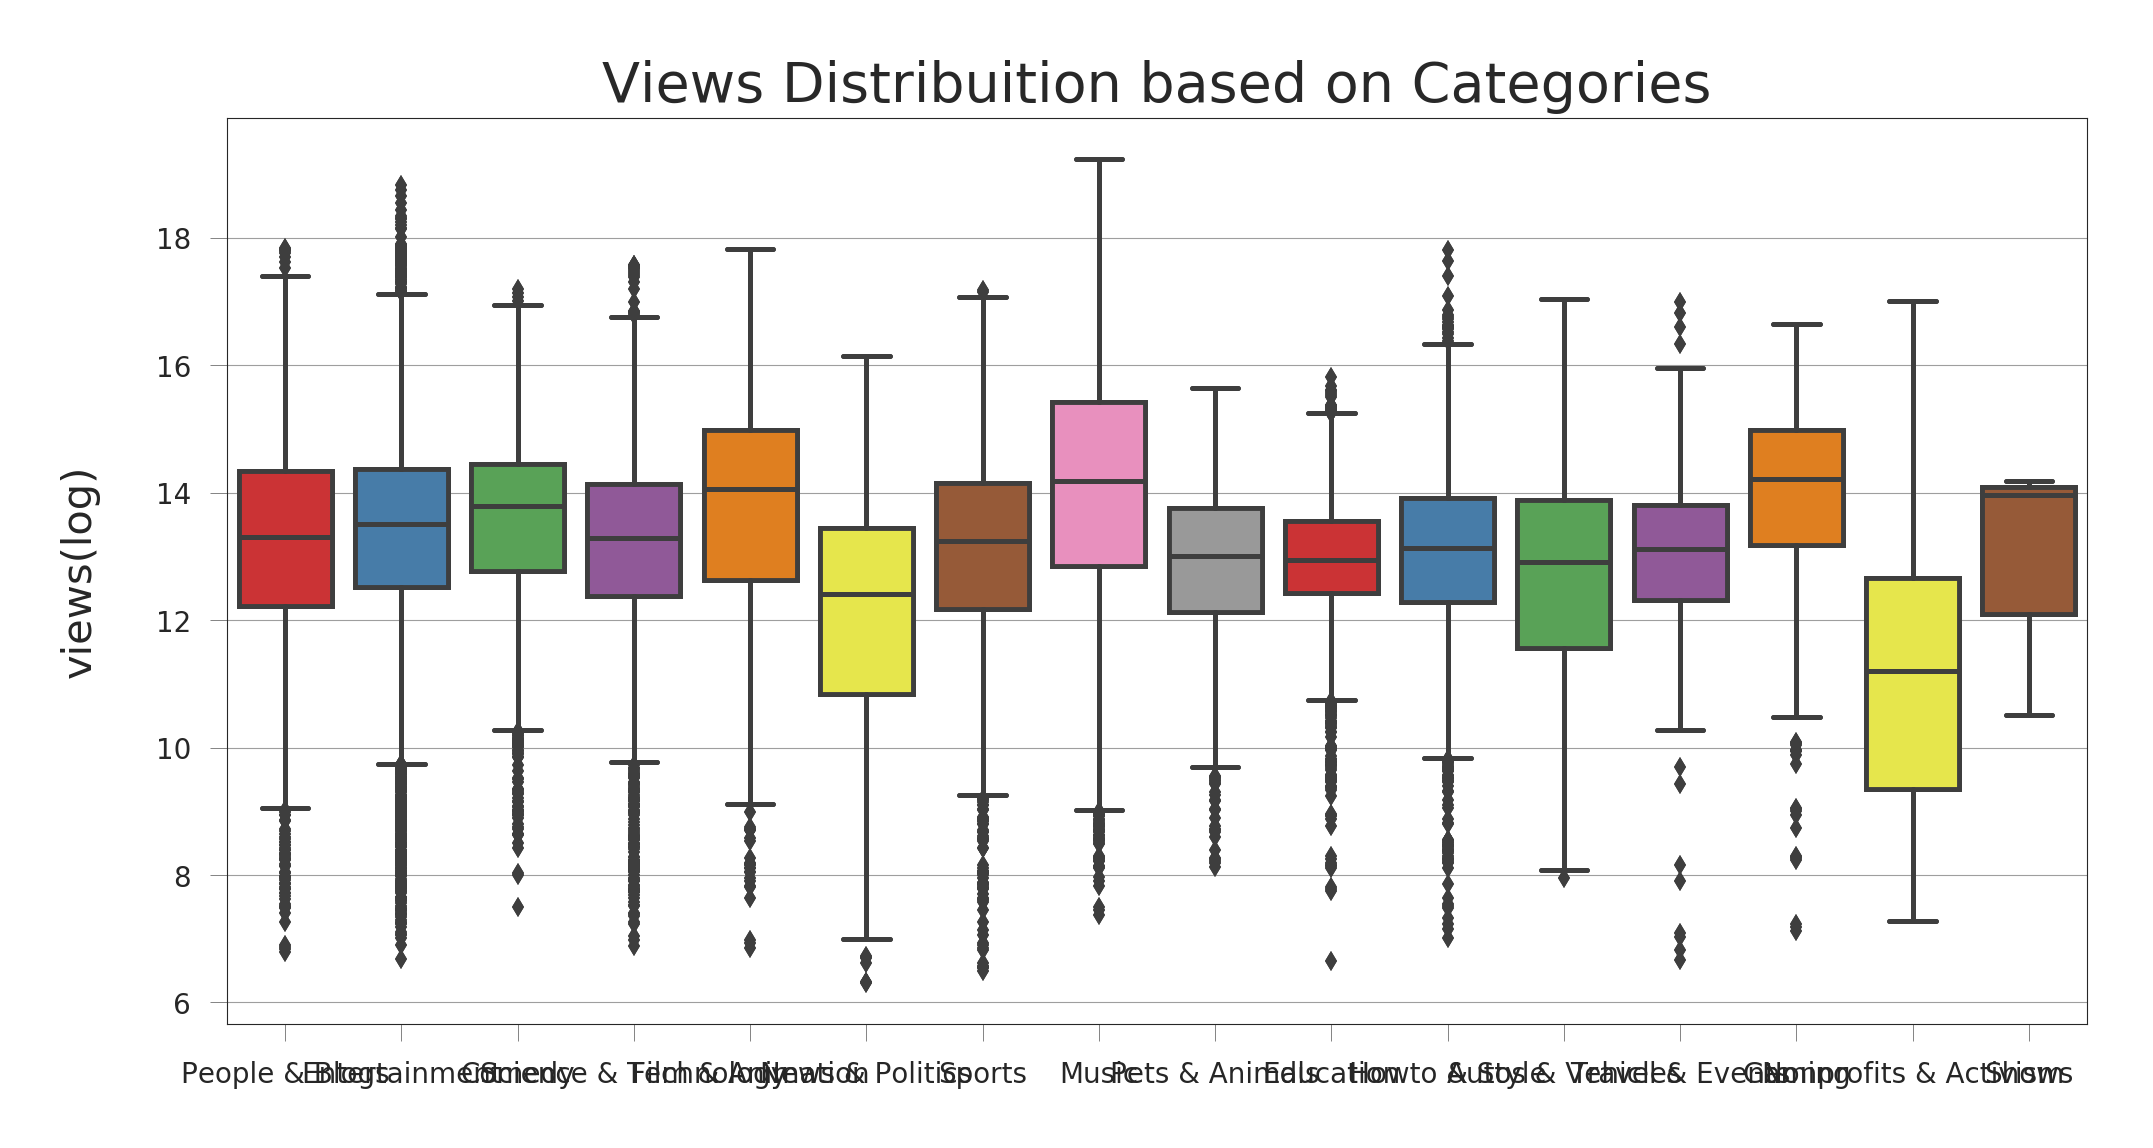

In [74]:
plt.figure(figsize = (12,6))
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_title("Views Distribuition based on Categories", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("views(log)", fontsize=15);

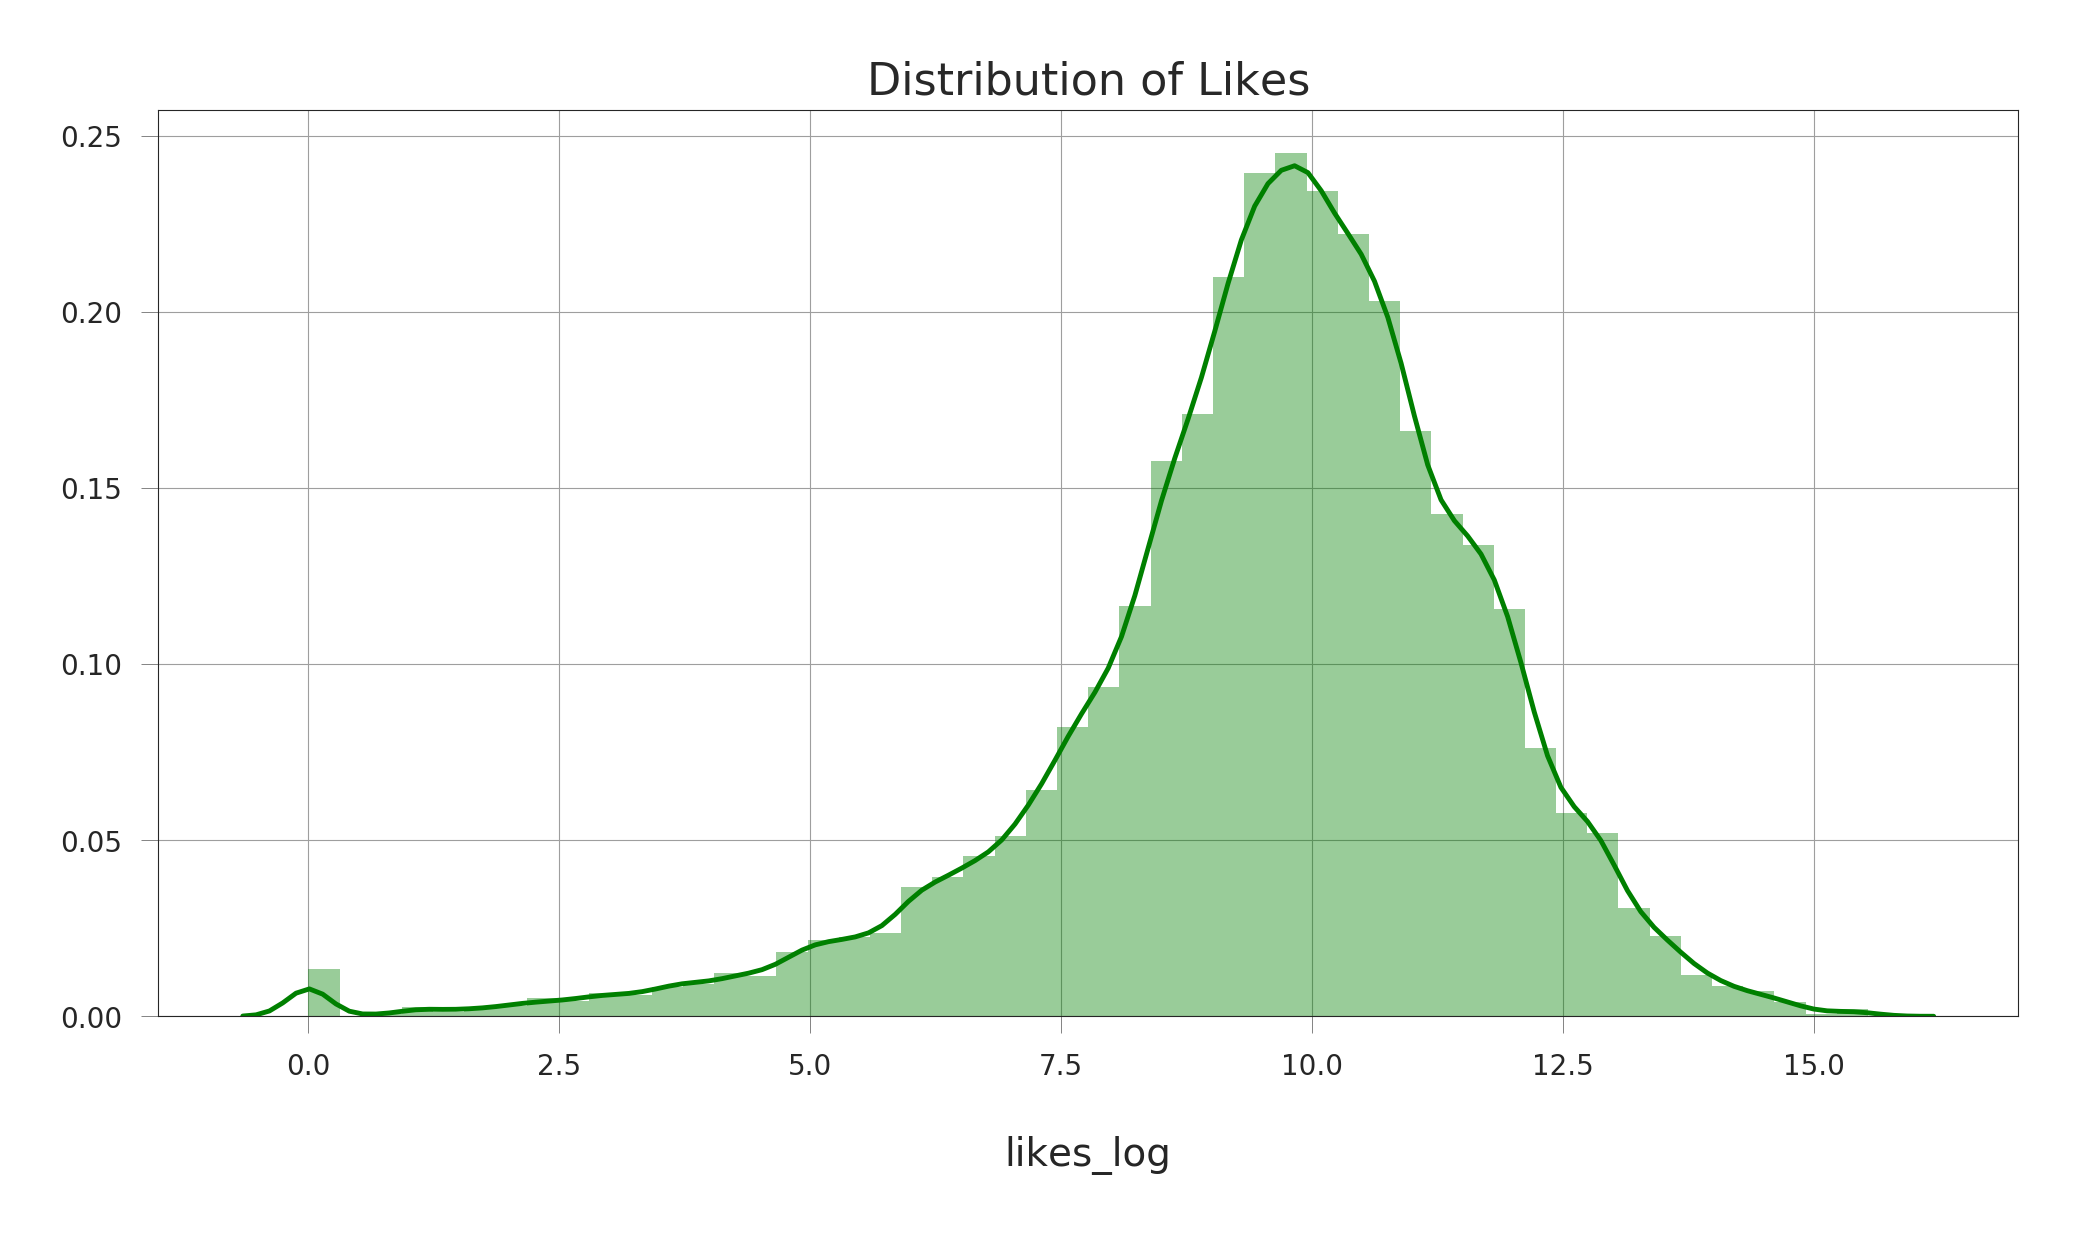

In [70]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16);

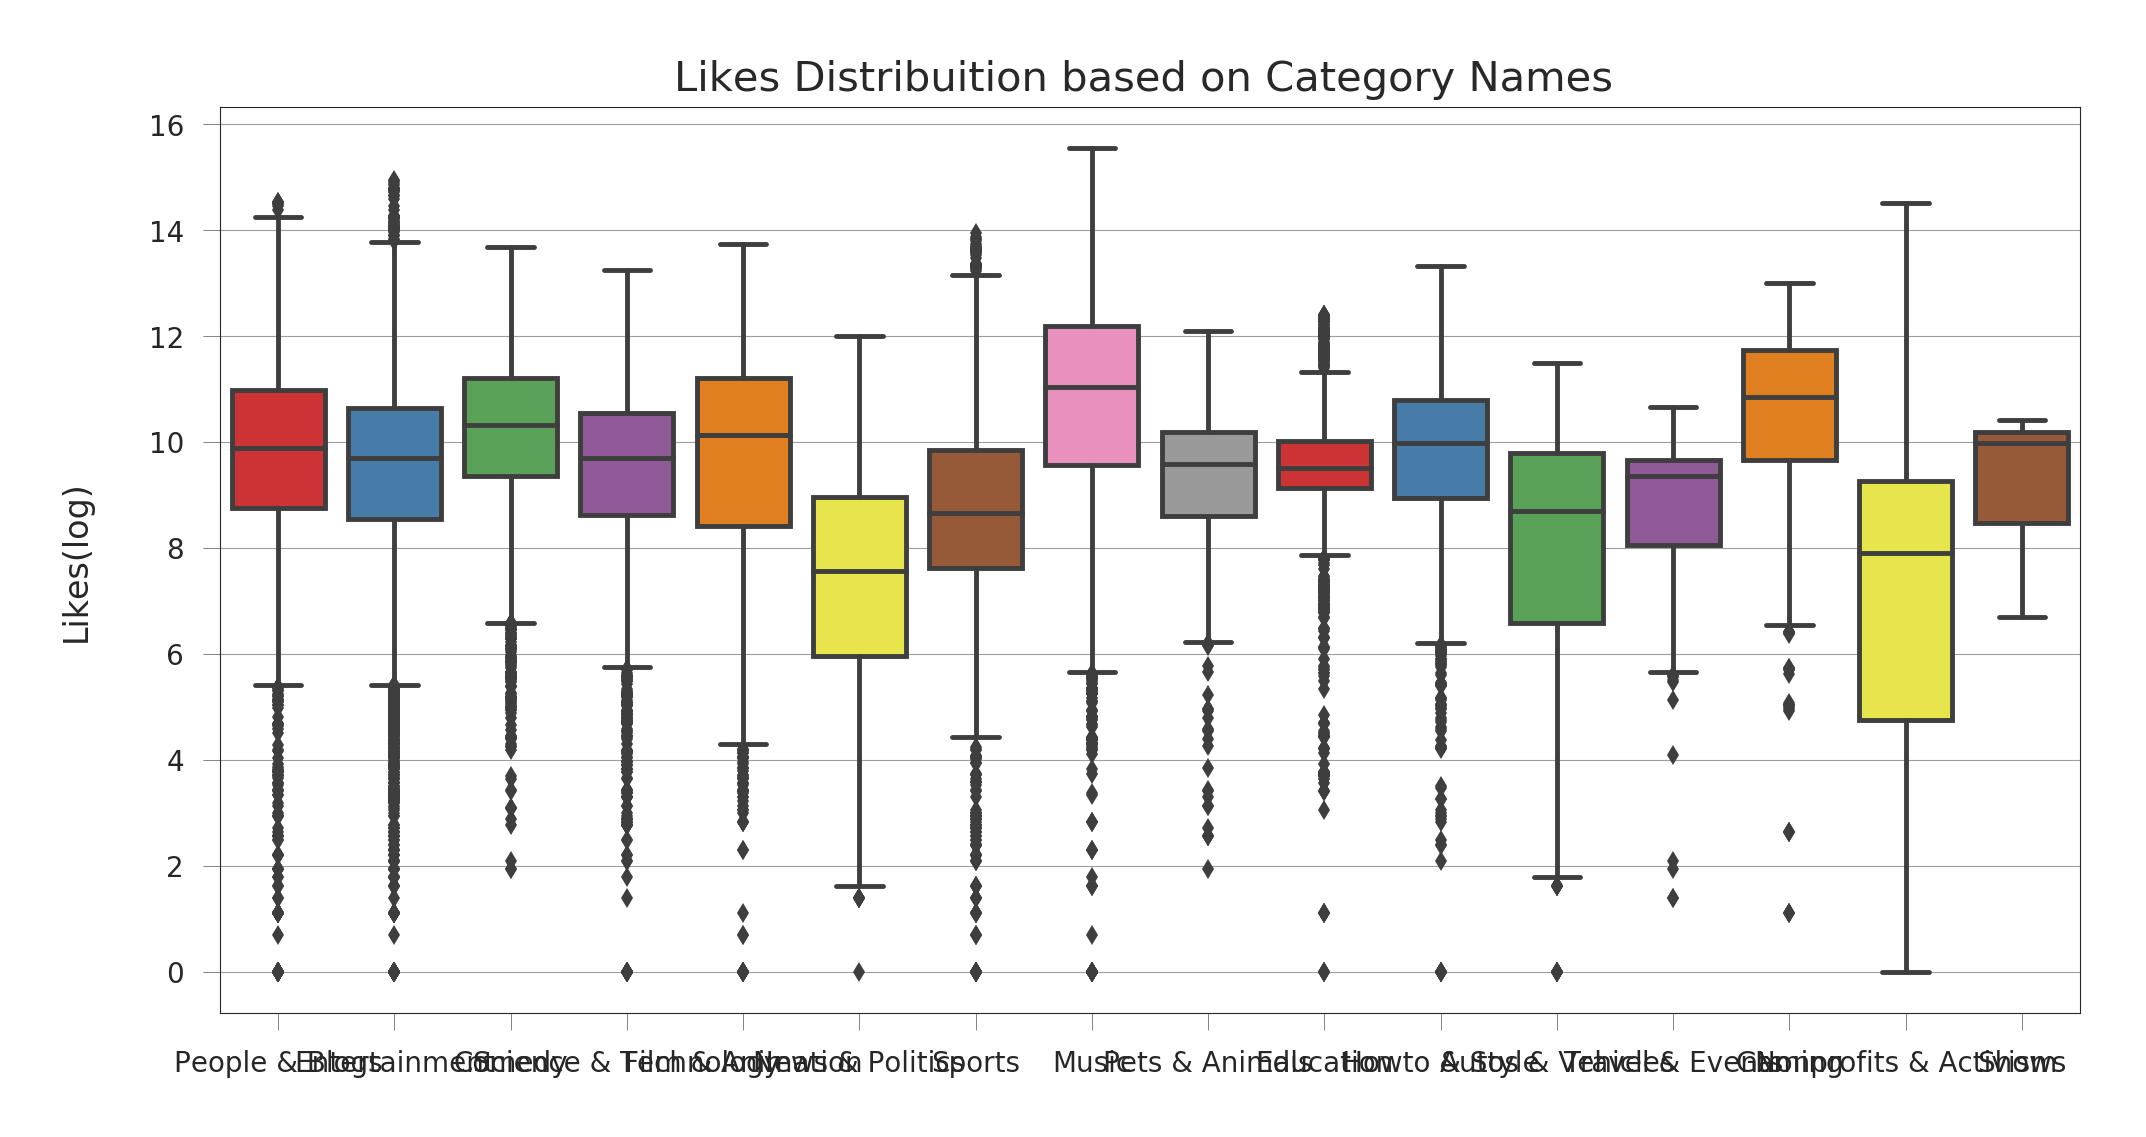

In [73]:
plt.figure(figsize = (12,6))
g2 = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g2.set_title("Likes Distribuition based on Category Names ", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Likes(log)", fontsize=12)
plt.show();

In [72]:
df['category_name']

video_id
2kyS6SvSYSE          People & Blogs
1ZAPwfrtAFY           Entertainment
5qpjK5DgCt4                  Comedy
puqaWrEC7tY           Entertainment
d380meD0W0M           Entertainment
gHZ1Qz0KiKM    Science & Technology
39idVpFF7NQ           Entertainment
nc99ccSXST0    Science & Technology
jr9QtXwC9vc        Film & Animation
TUmyygCMMGA         News & Politics
9wRQljFNDW8                  Sports
VifQlJit6A0           Entertainment
5E4ZBSInqUU                   Music
GgVmn66oK_A         News & Politics
TaTleo4cOs8          Pets & Animals
kgaO45SyaO4    Science & Technology
ZAQs-ctOqXQ                  Comedy
YVfyYrEmzgM               Education
eNSN6qet1kE    Science & Technology
B5HORANmzHw               Education
vU14JY3x81A               Education
6VhU_T463sU    Science & Technology
_-aDHxoblr4               Education
JBZTZZAcFTw           Howto & Style
lZ68j2J_GOM                  Comedy
dRpNZV18N_g           Entertainment
fcVjitaM3LY    Science & Technology
qeWvgZLz9yU        

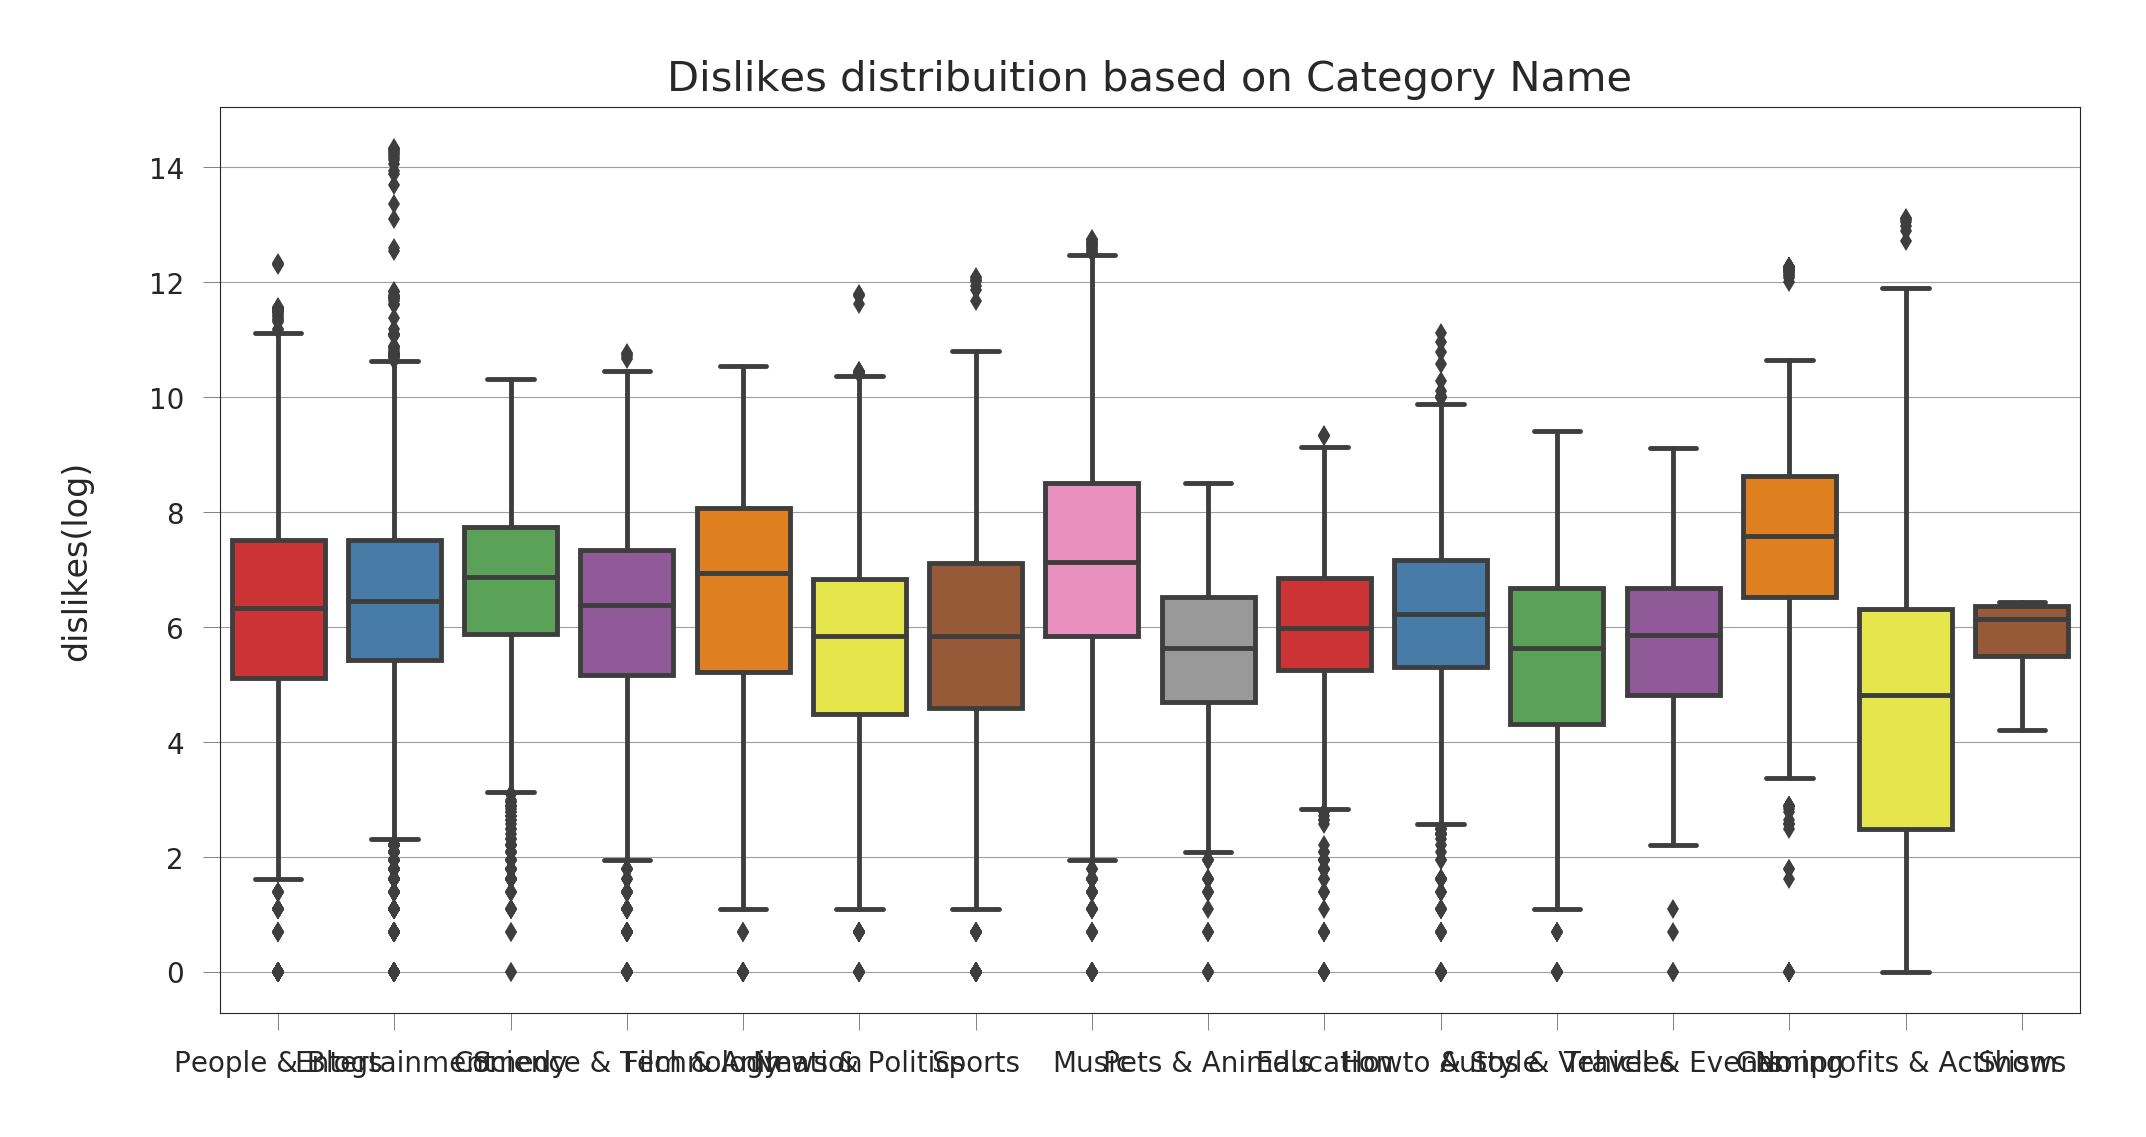

In [75]:
plt.figure(figsize = (12,6))
g3 = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g3.set_title("Dislikes distribuition based on Category Name", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("dislikes(log)", fontsize=12)
plt.show();

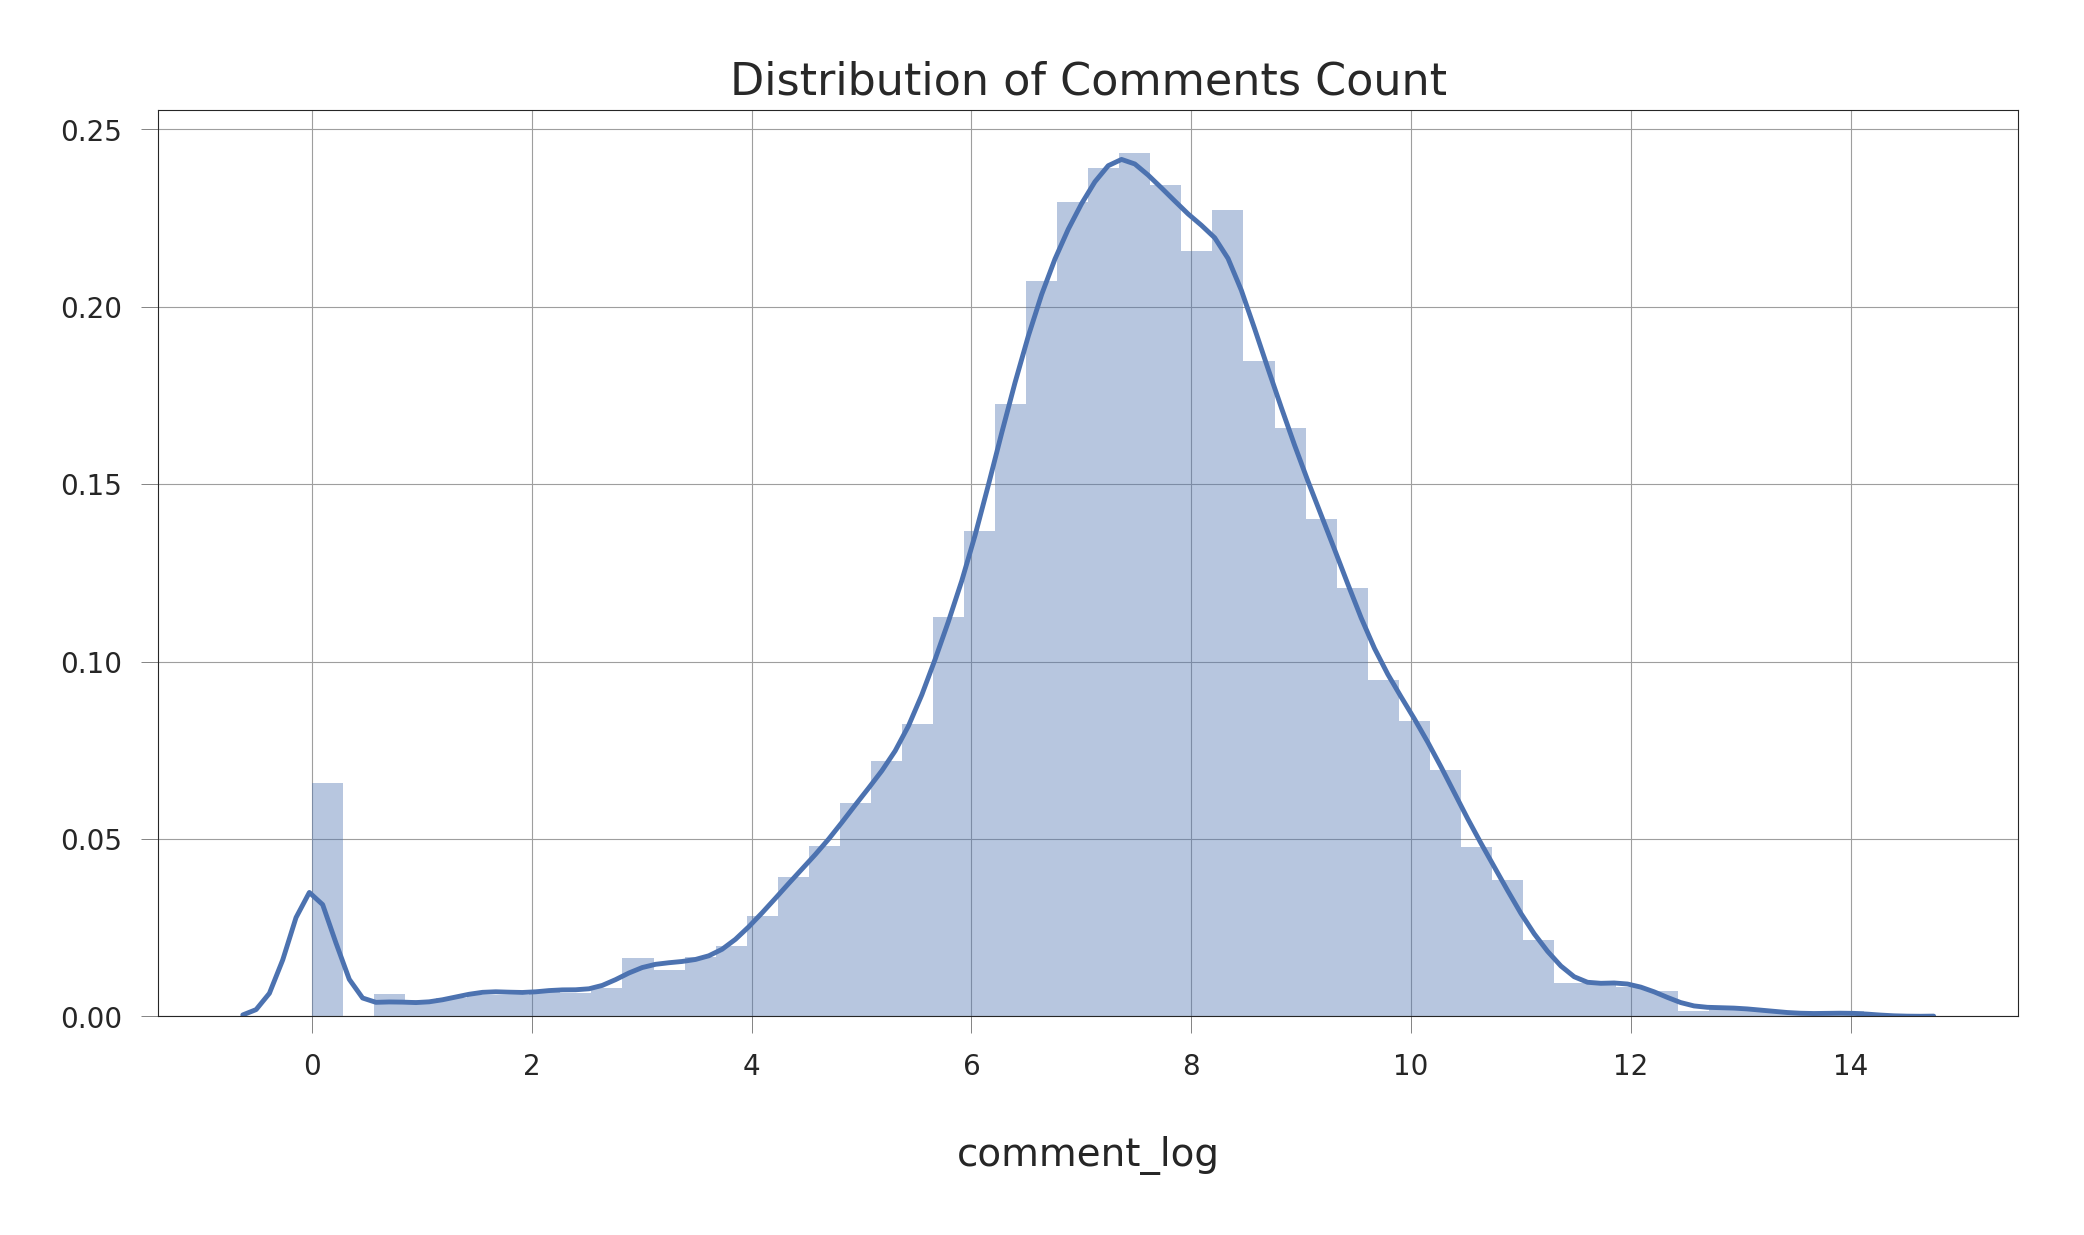

In [76]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16);

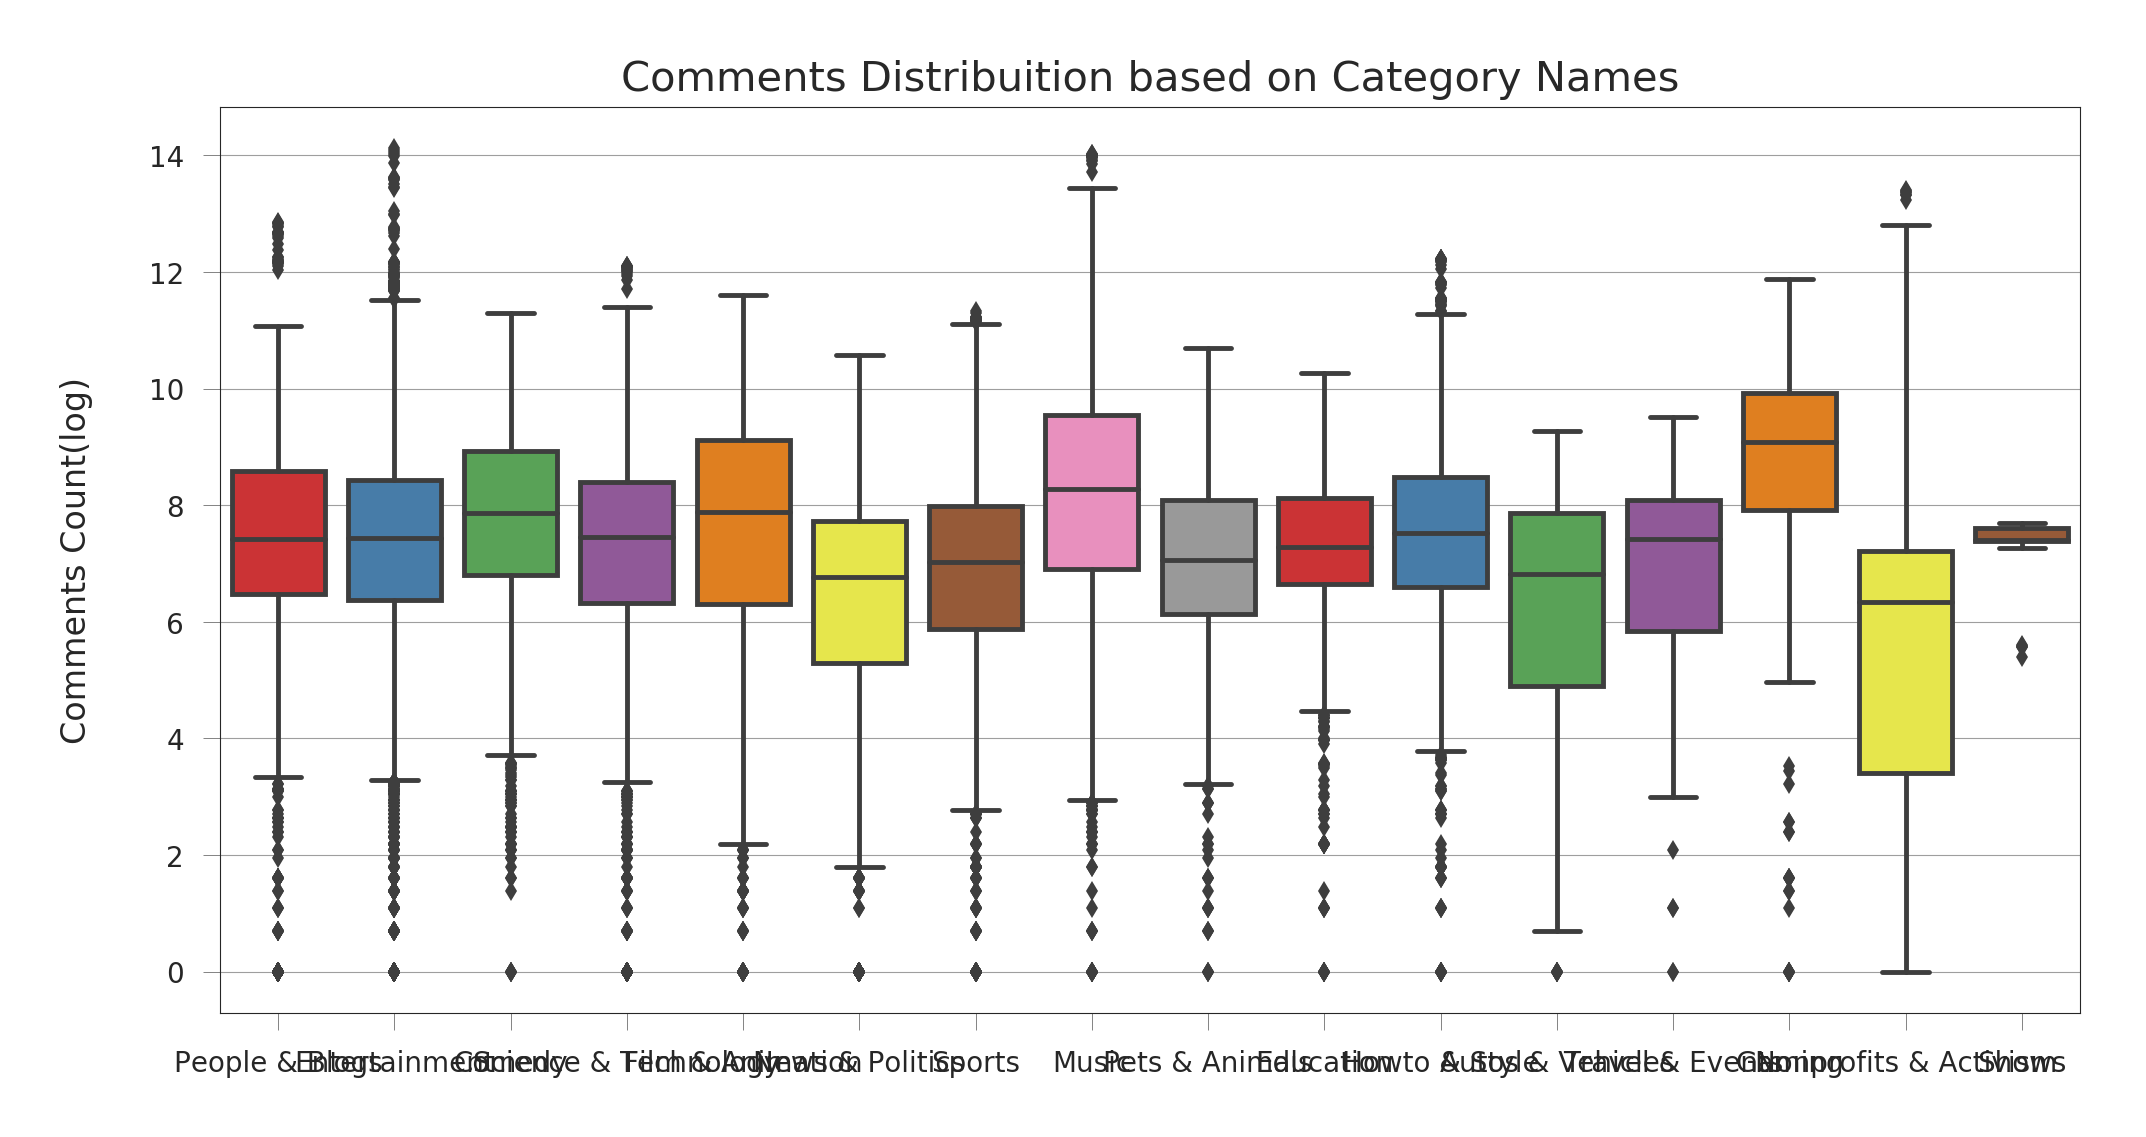

In [79]:
plt.figure(figsize = (12,6))
g4 = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g4.set_title("Comments Distribuition based on Category Names", fontsize=15)
g4.set_xlabel("", fontsize=12)
g4.set_ylabel("Comments Count(log)", fontsize=12)
plt.show();

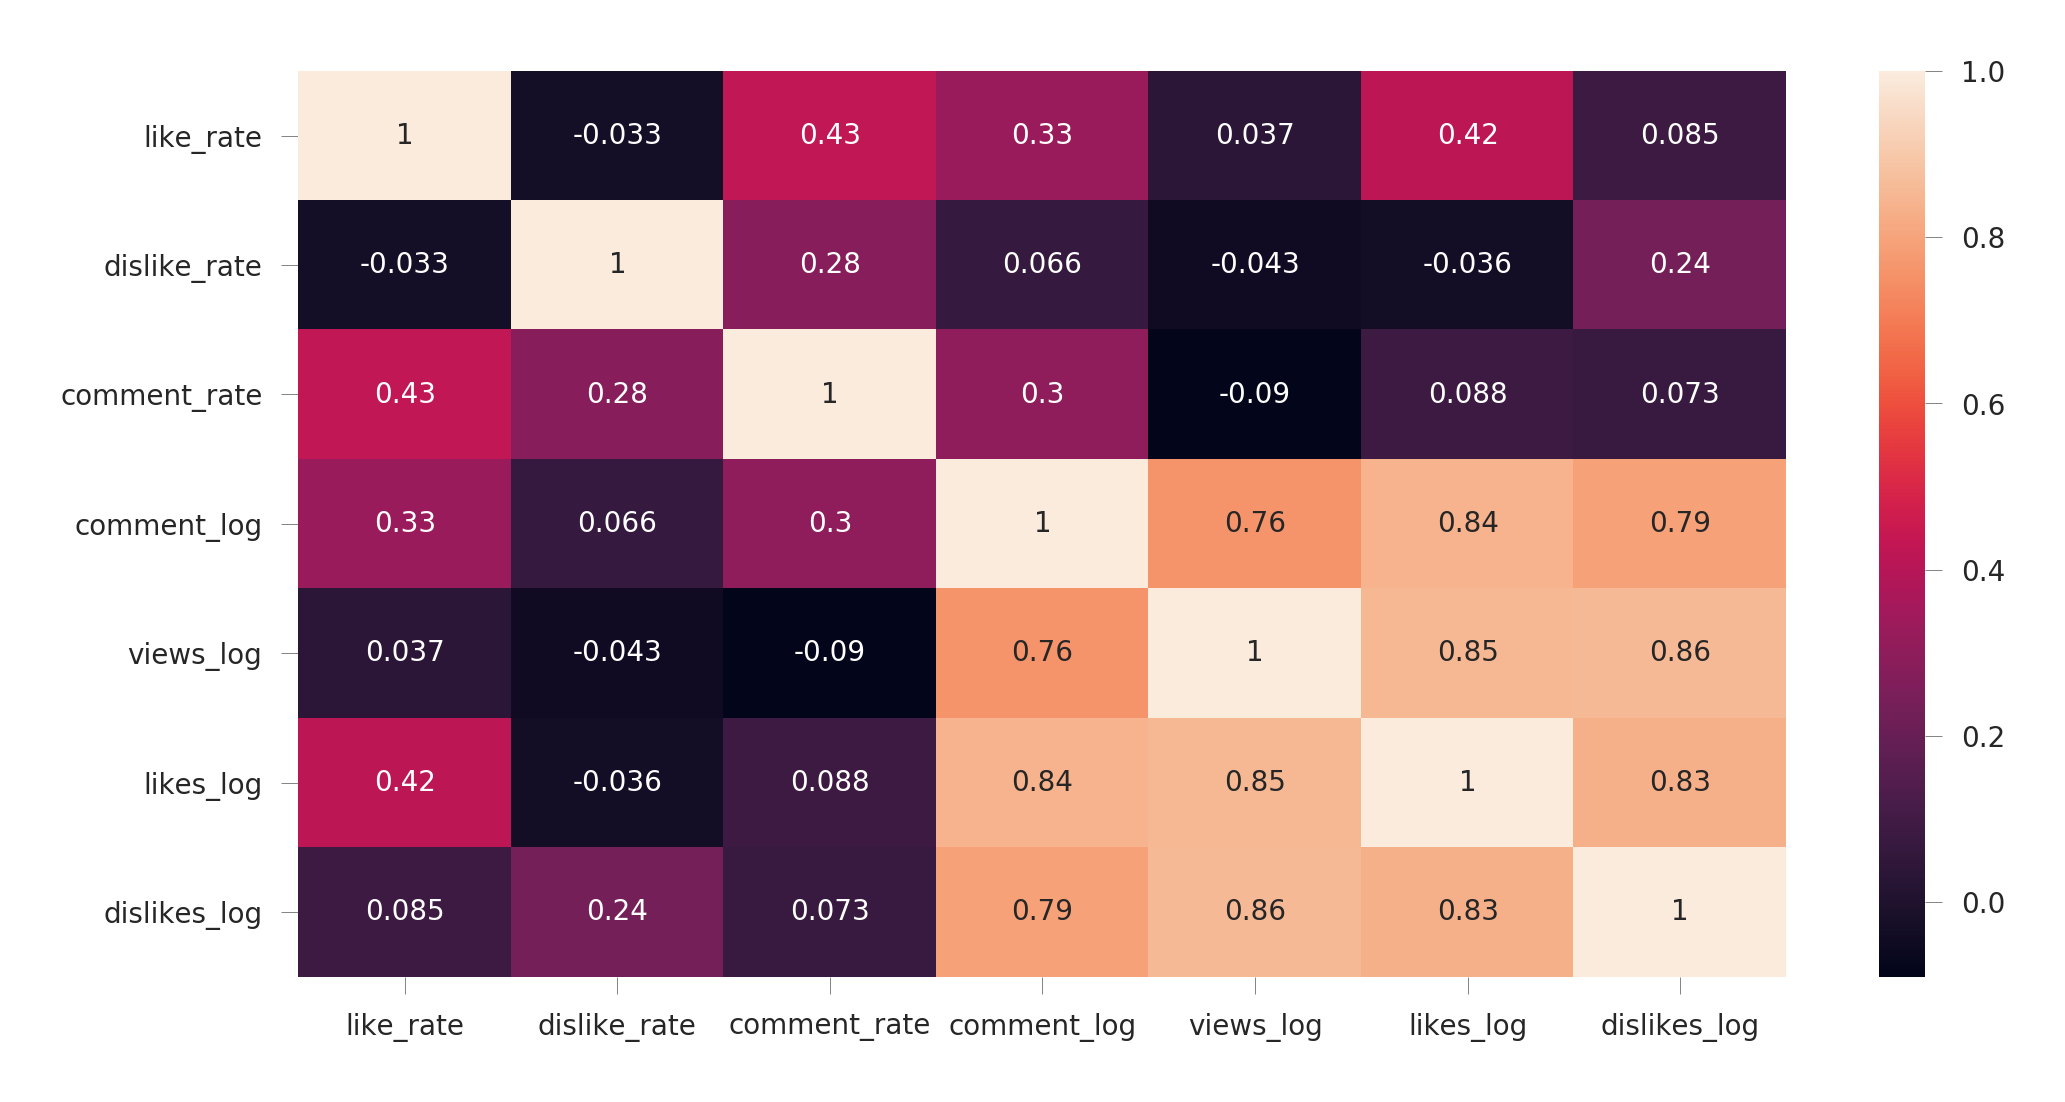

In [78]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log','views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show();

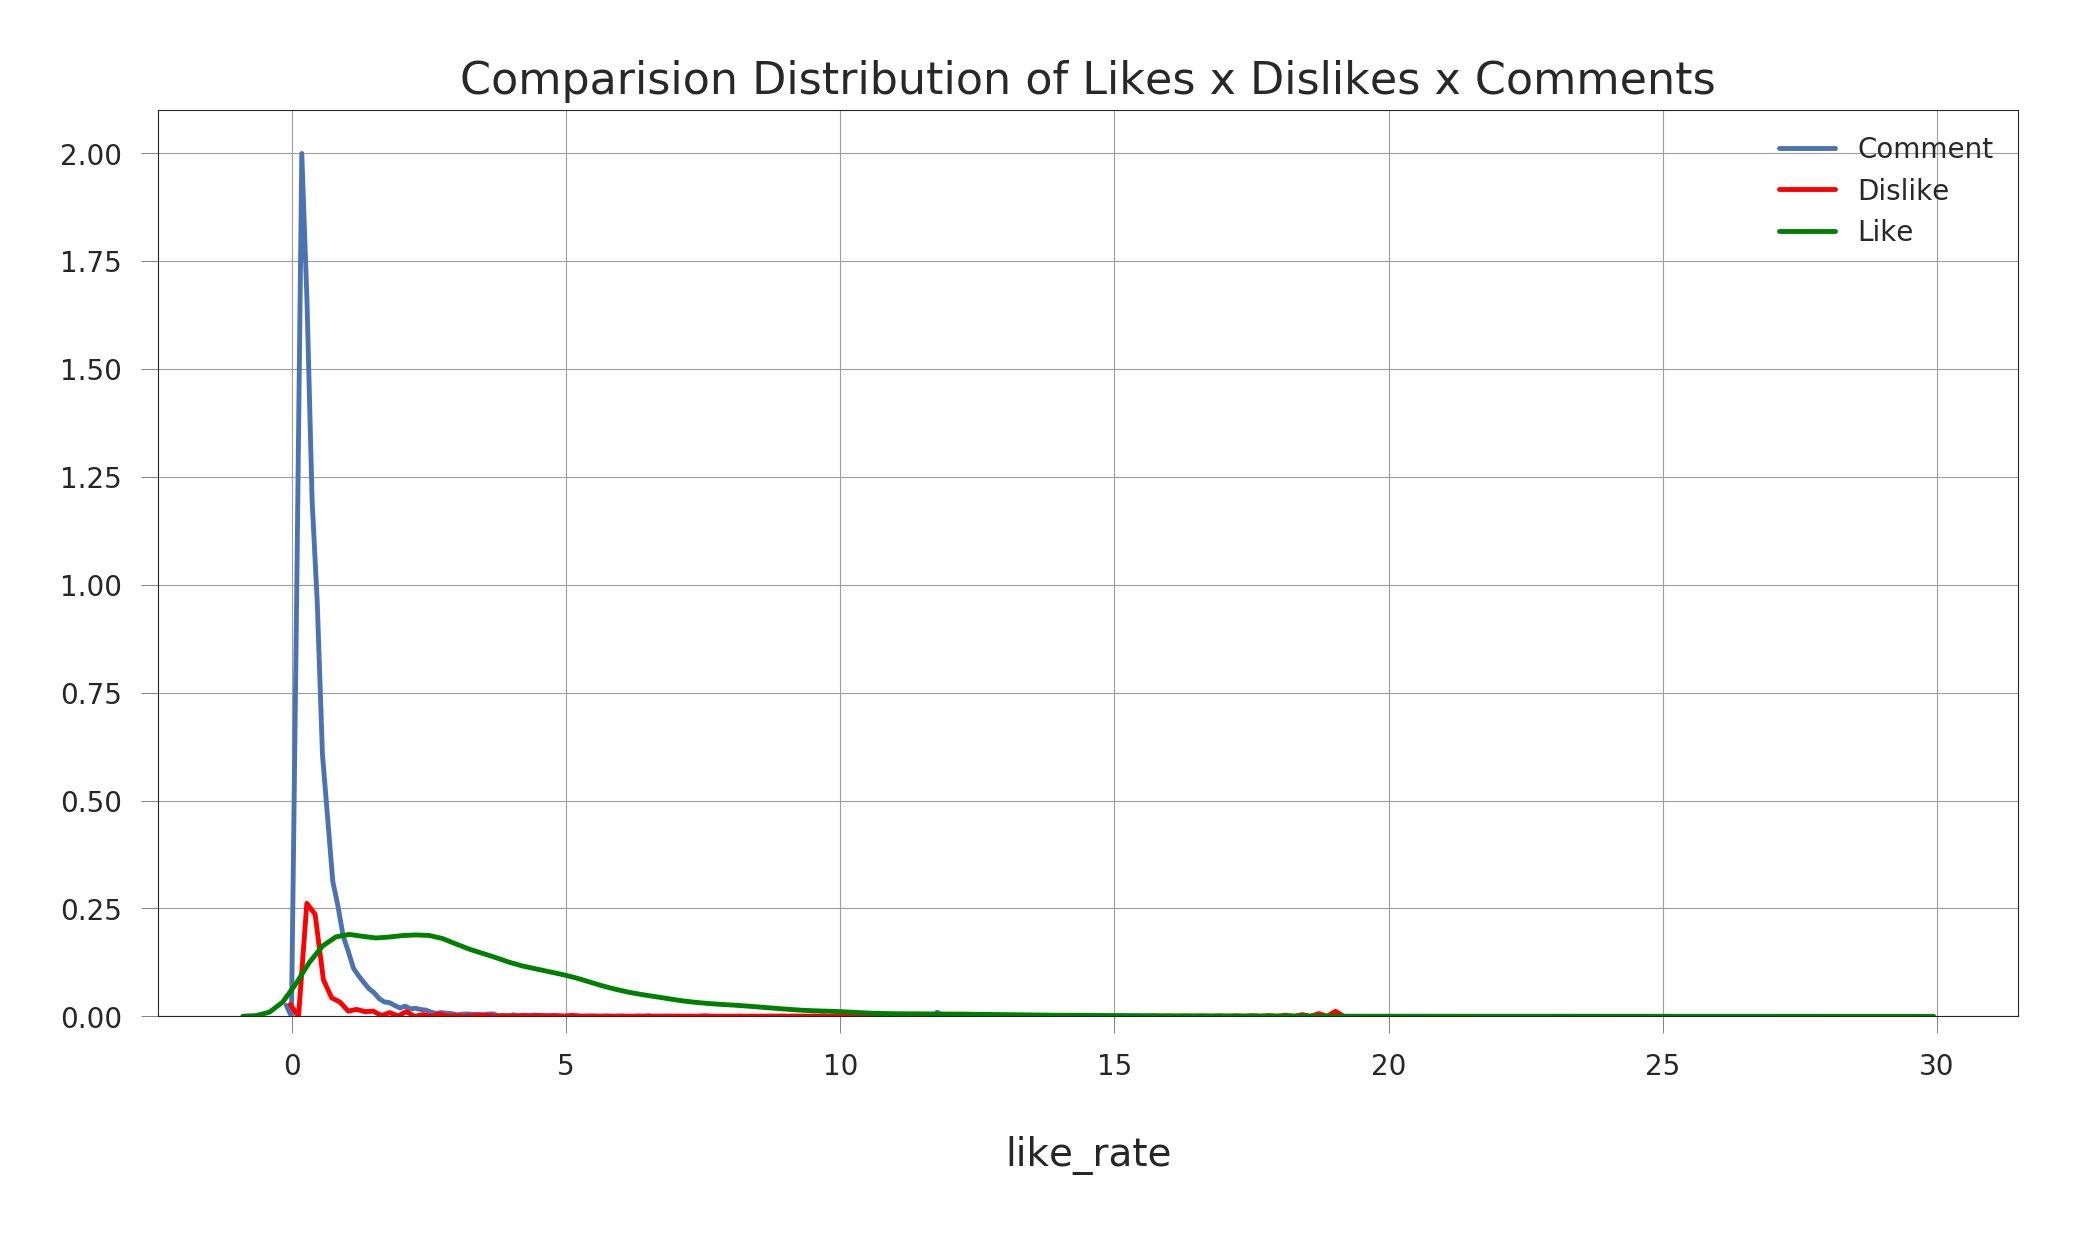

In [80]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

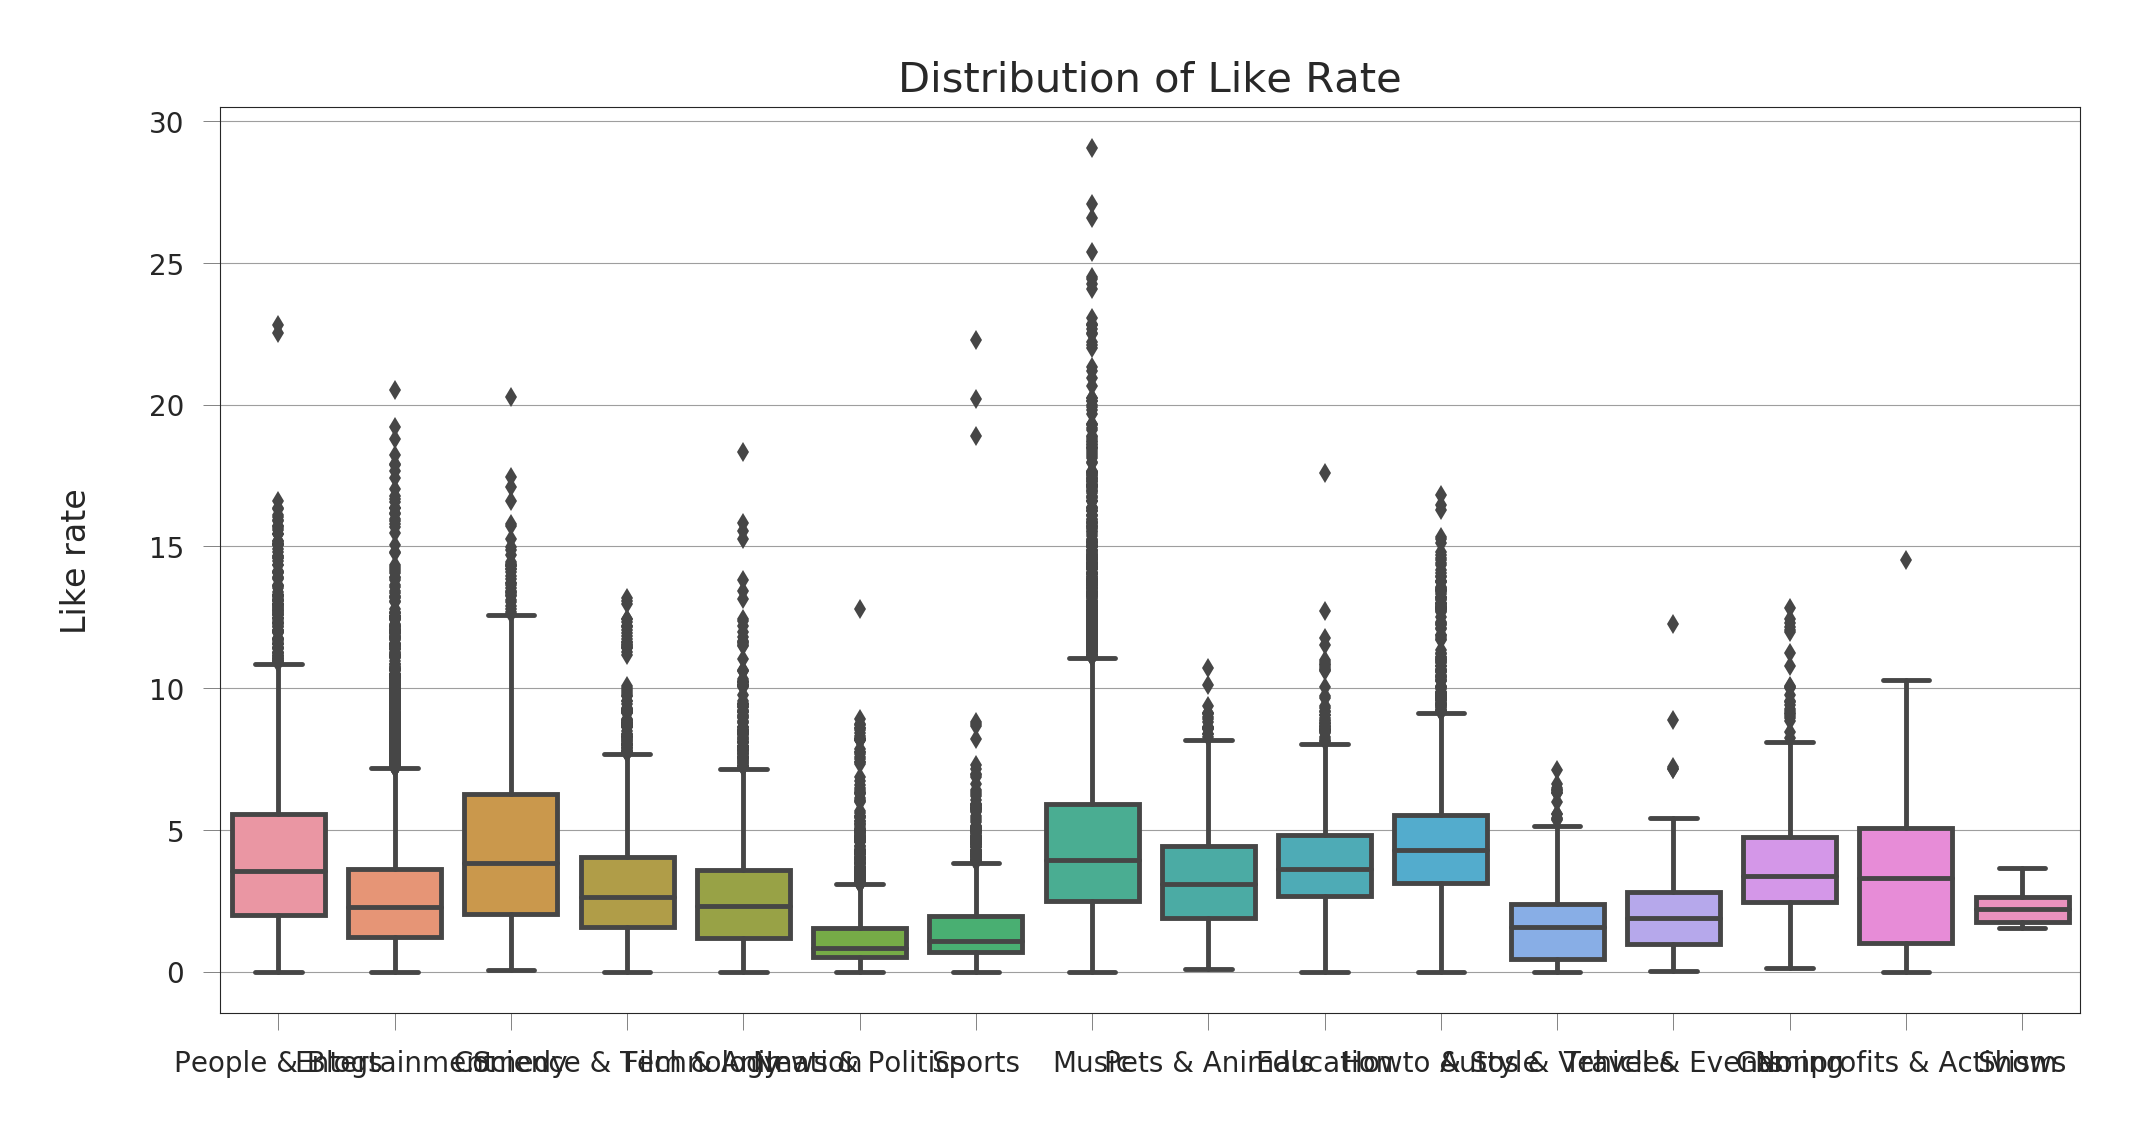

In [81]:
plt.figure(figsize = (12,6))

r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12);


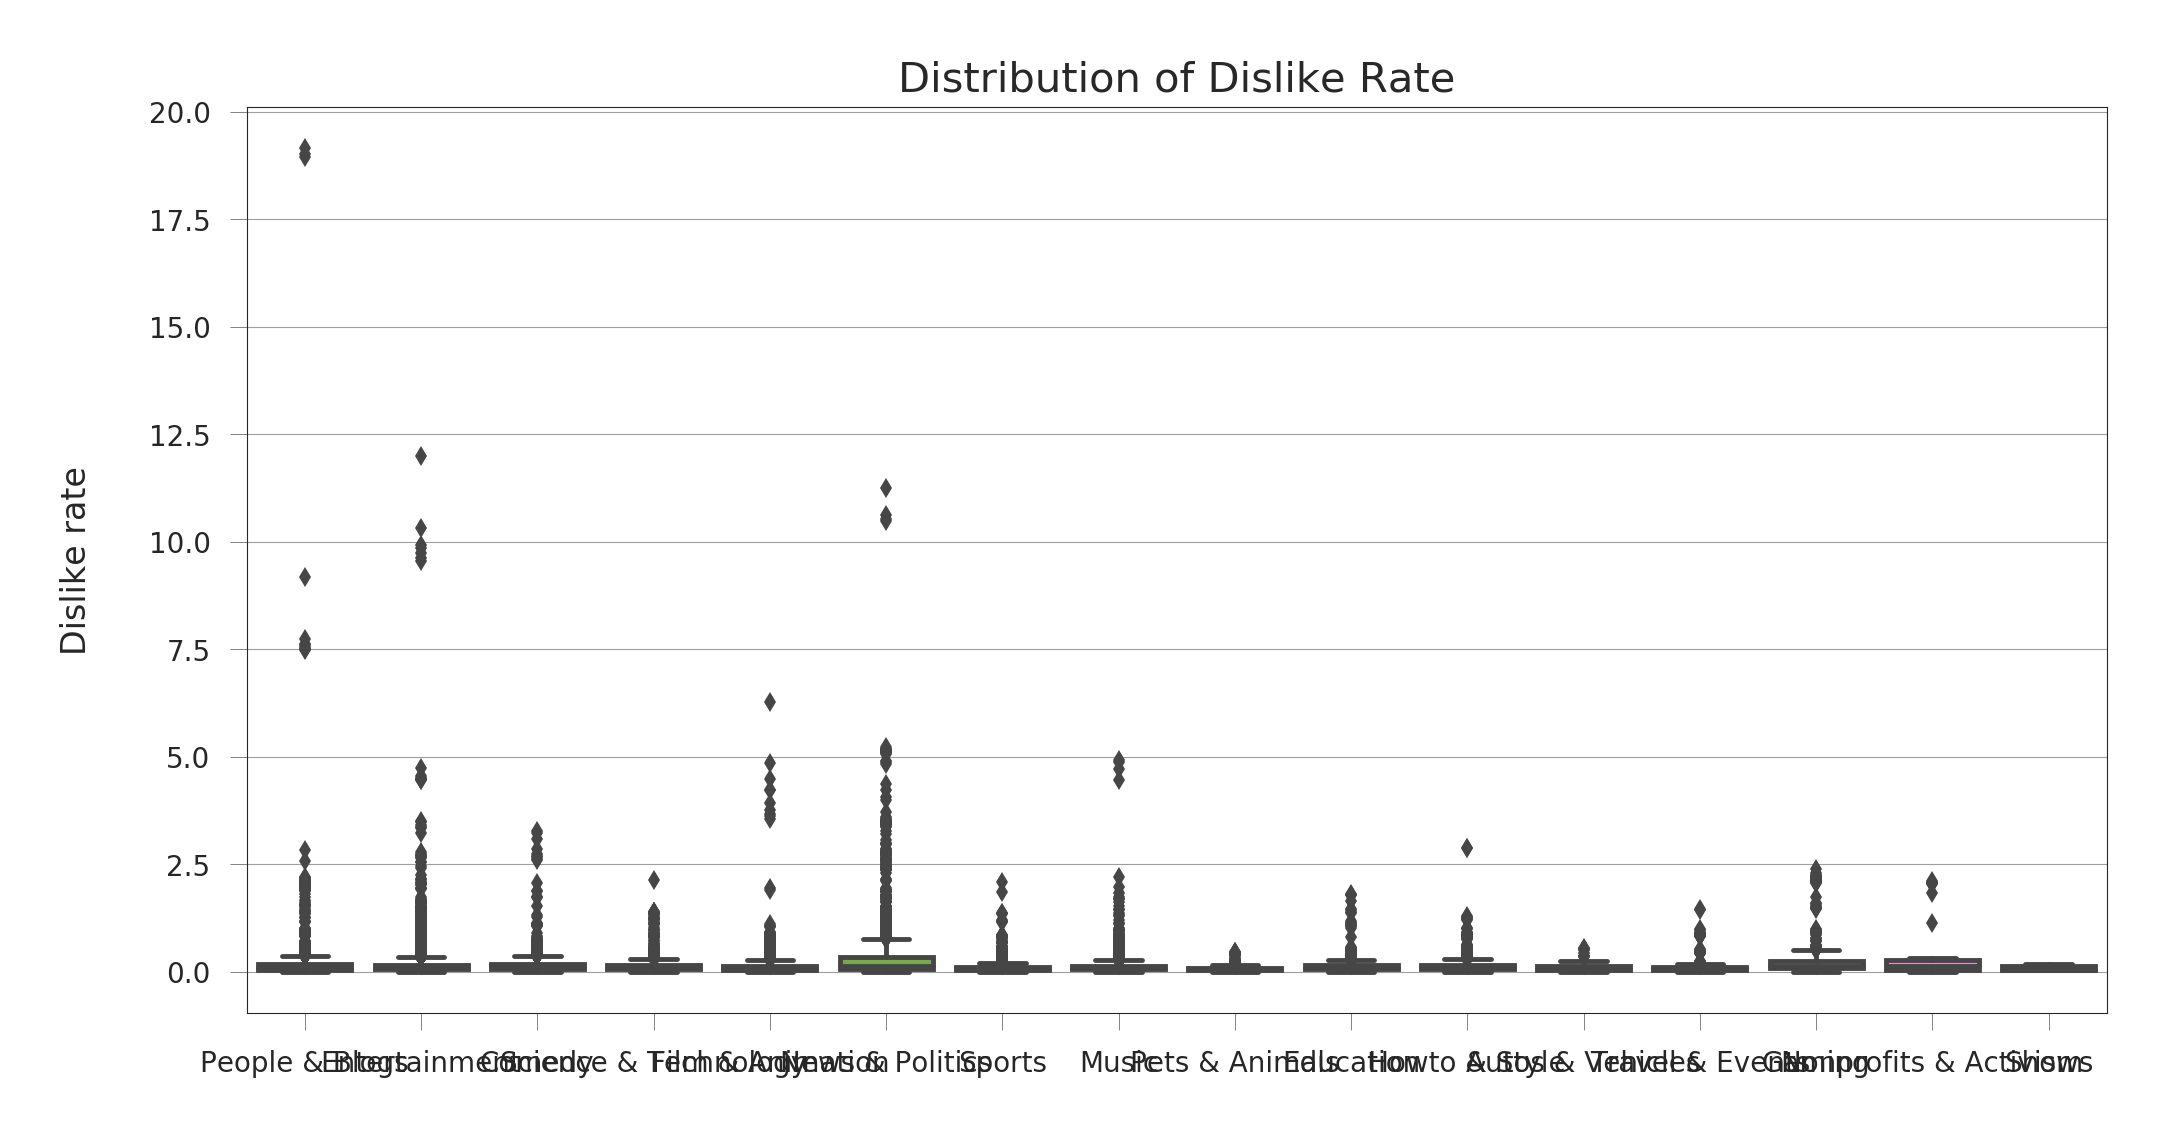

In [82]:
plt.figure(figsize=(12,6))

r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12);

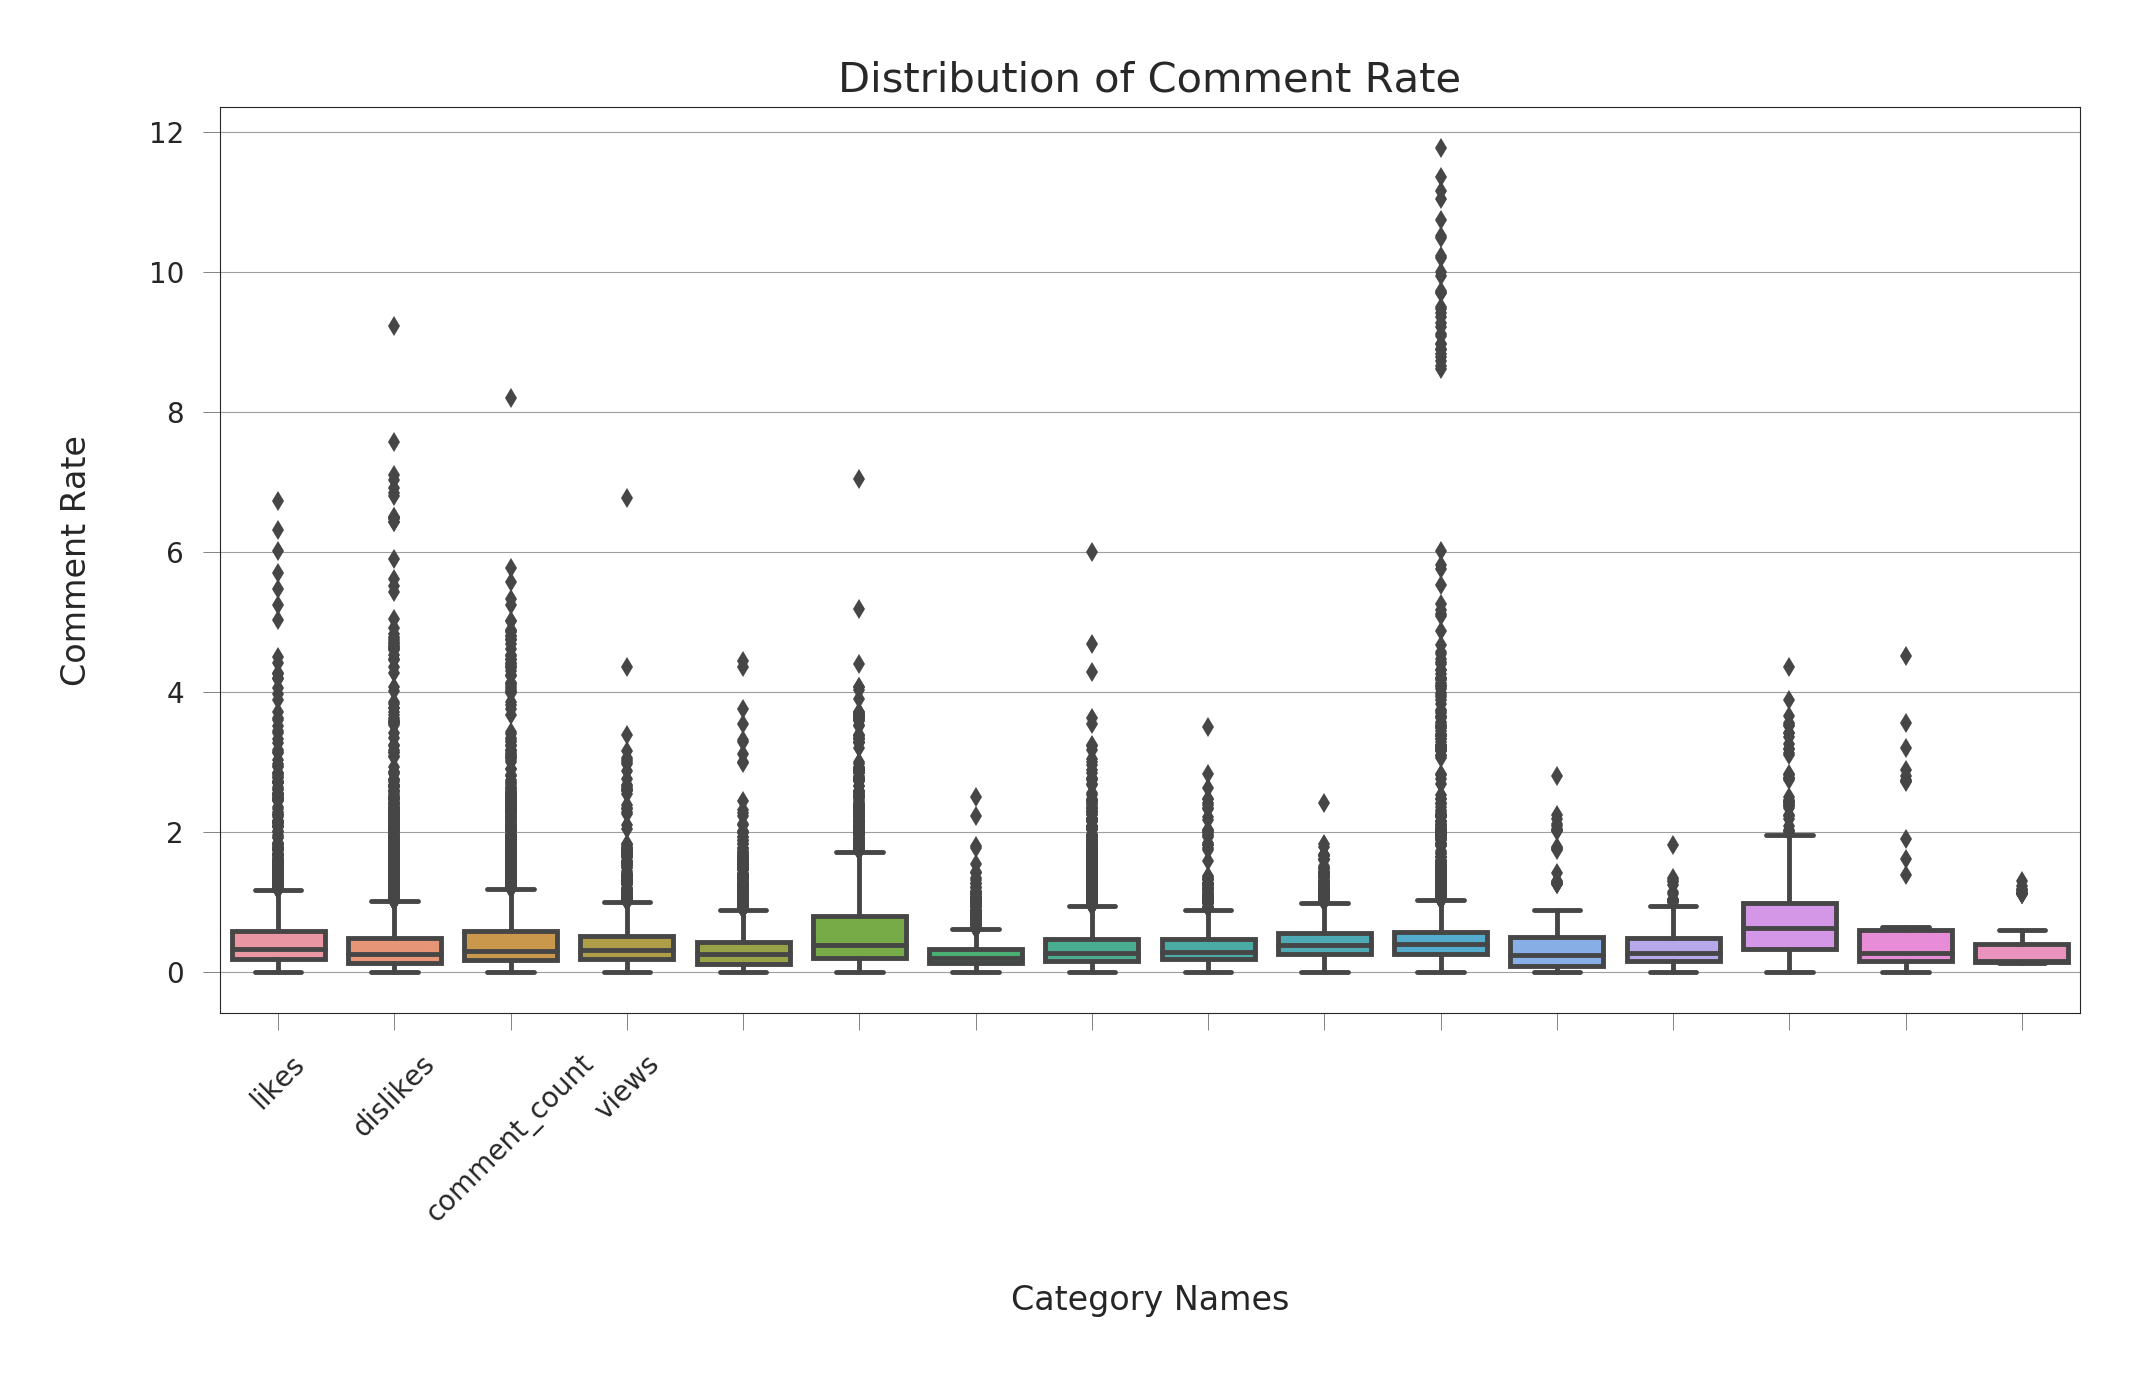

In [83]:
plt.figure(figsize=(12,6))

r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12);

In [84]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.85      0.47           0.62   
likes                    0.85   1.00      0.45           0.80   
dislikes                 0.47   0.45      1.00           0.70   
comment_count            0.62   0.80      0.70           1.00   
comments_disabled        0.00  -0.03     -0.00          -0.03   
ratings_disabled         0.02  -0.02     -0.01          -0.01   
video_error_or_removed  -0.00  -0.00     -0.00          -0.00   
likes_log                0.39   0.46      0.18           0.31   
views_log                0.49   0.47      0.21           0.32   
dislikes_log             0.43   0.44      0.26           0.34   
comment_log              0.36   0.43      0.20           0.36   
like_rate               -0.03   0.18     -0.00           0.13   
dislike_rate            -0.00   0.01      0.26           0.13   
comment_rate            -0.05   0.07      0.09           0.25   

                        comments_disabled  ratings_disabled  \
views                                0.00              0.02   
likes                               -0.03             -0.02   
dislikes                            -0.00             -0.01   
comment_count                       -0.03             -0.01   
comments_disabled                    1.00              0.32   
ratings_disabled                     0.32              1.00   
video_error_or_removed              -0.00             -0.00   
likes_log                           -0.15             -0.29   
views_log                           -0.02             -0.02   
dislikes_log                        -0.07             -0.21   
comment_log                         -0.45             -0.17   
like_rate                           -0.10             -0.08   
dislike_rate                         0.04             -0.03   
comment_rate                        -0.10             -0.03   

                        video_error_or_removed  likes_log  views_log  \
views                                    -0.00       0.39       0.49   
likes                                    -0.00       0.46       0.47   
dislikes                                 -0.00       0.18       0.21   
comment_count                            -0.00       0.31       0.32   
comments_disabled                        -0.00      -0.15      -0.02   
ratings_disabled                         -0.00      -0.29      -0.02   
video_error_or_removed                    1.00      -0.00      -0.00   
likes_log                                -0.00       1.00       0.85   
views_log                                -0.00       0.85       1.00   
dislikes_log                             -0.00       0.83       0.86   
comment_log                              -0.01       0.84       0.76   
like_rate                                -0.00       0.42       0.04   
dislike_rate                             -0.00      -0.04      -0.04   
comment_rate                             -0.00       0.09      -0.09   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.43         0.36      -0.03         -0.00   
likes                           0.44         0.43       0.18          0.01   
dislikes                        0.26         0.20      -0.00          0.26   
comment_count                   0.34         0.36       0.13          0.13   
comments_disabled              -0.07        -0.45      -0.10          0.04   
ratings_disabled               -0.21        -0.17      -0.08         -0.03   
video_error_or_removed         -0.00        -0.01      -0.00         -0.00   
likes_log                       0.83         0.84       0.42         -0.04   
views_log                       0.86         0.76       0.04         -0.04   
dislikes_log                    1.00         0.79       0.09          0.24   
comment_log                     0.79         1.00       0.33          0.07   
like_rate                       0.09         0.33       1.00         -0.03   
dislike

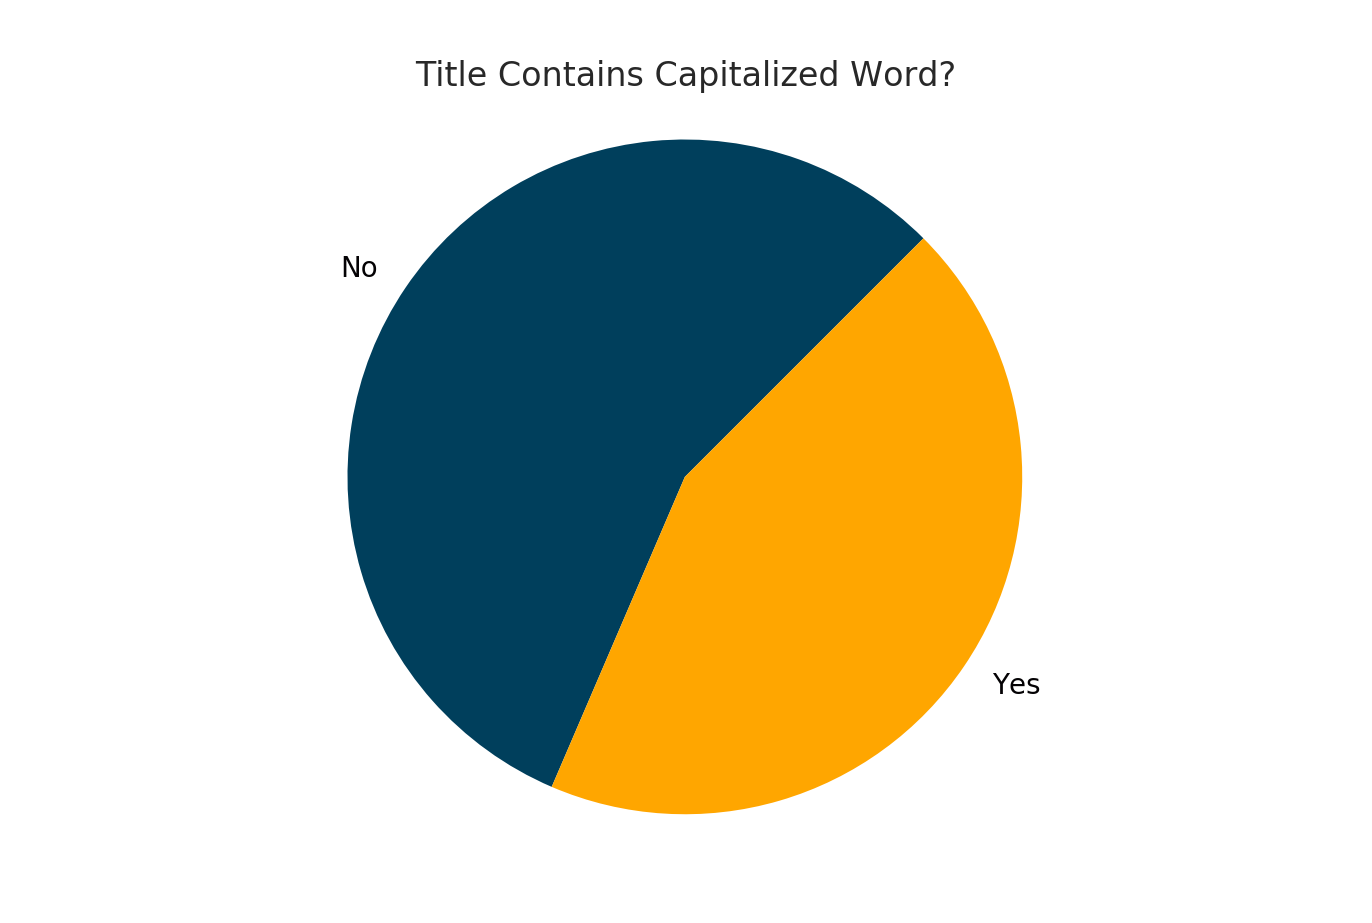

In [85]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [86]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

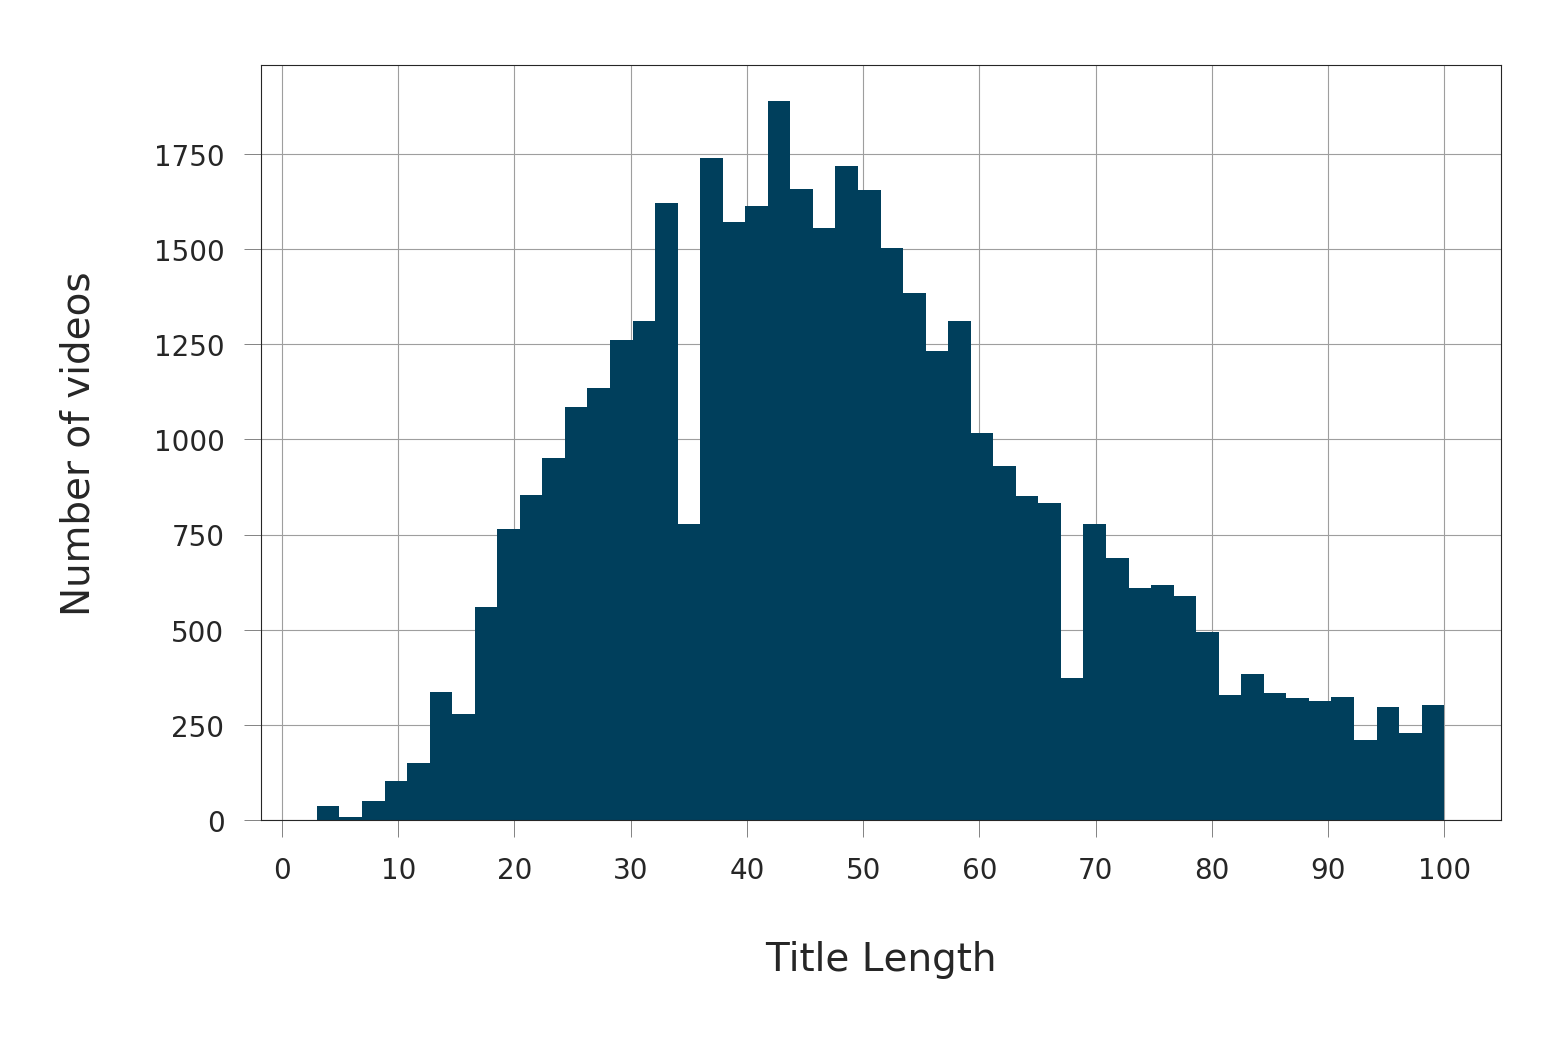

In [87]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

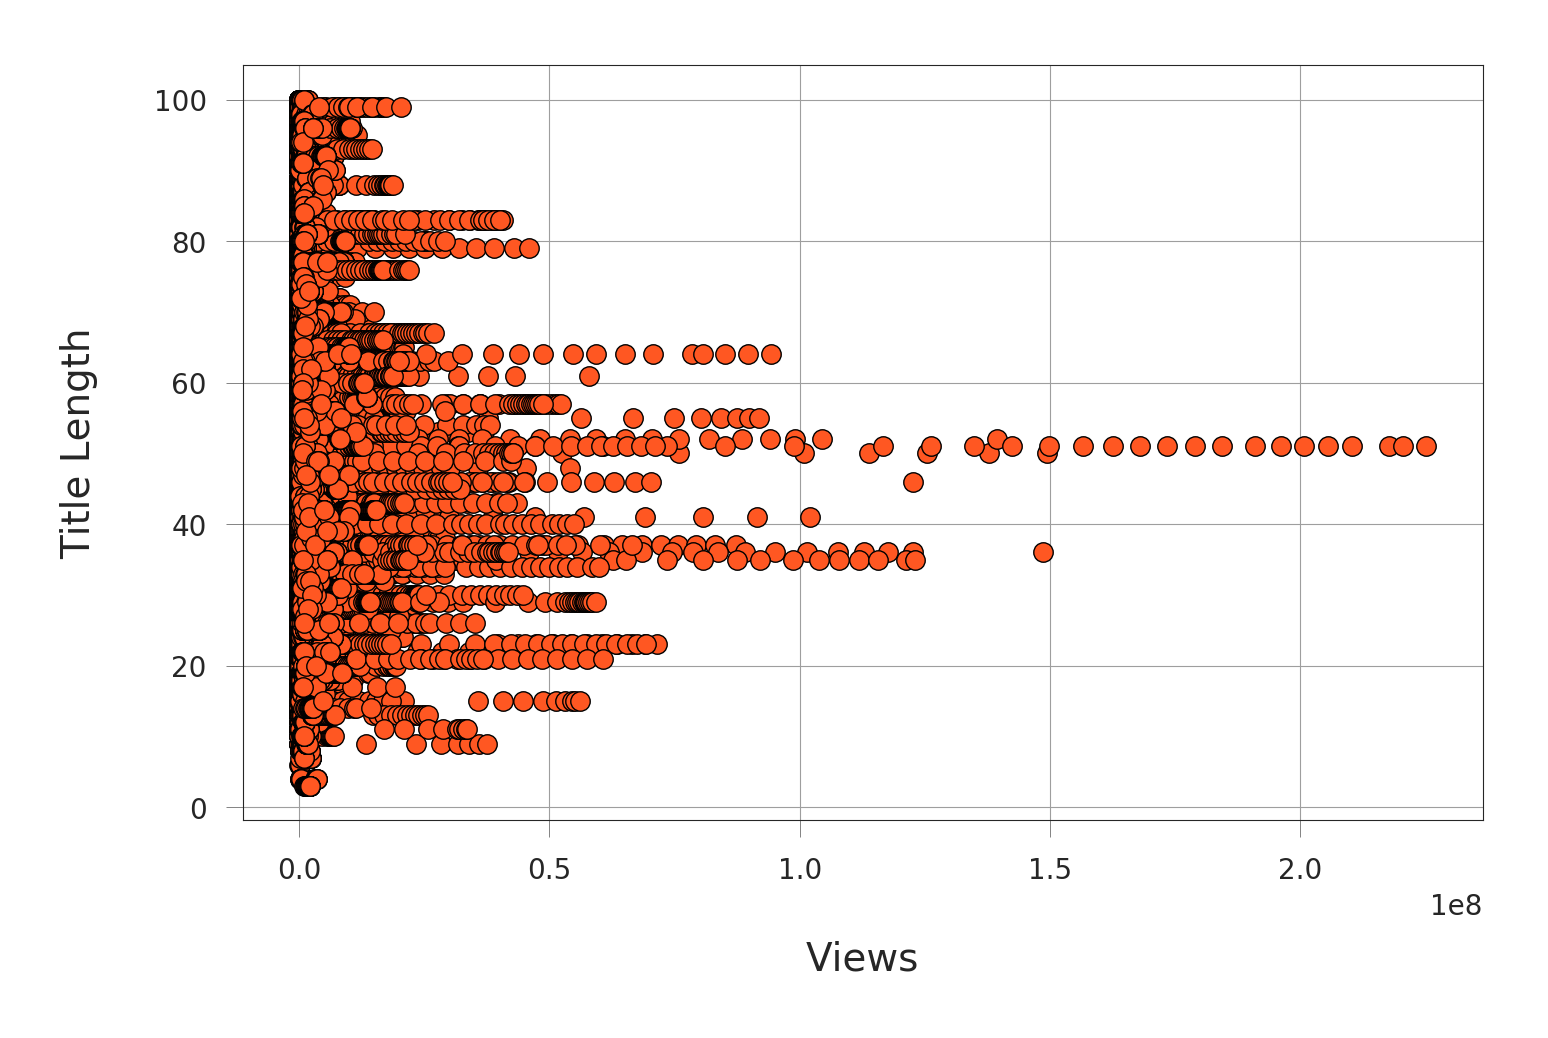

In [88]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

In [89]:
df['title'].value_counts()

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                                           30
The ULTIMATE $30,000 Gaming PC Setup                                                                 29
Charlie Puth - BOY [Official Audio]                                                                  29
Sam Smith - Pray (Official Video) ft. Logic                                                          29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                                        29
Rooster Teeth Animated Adventures - Millie So Serious                                                29
Why I'm So Scared (being myself and crying too much)                                                 29
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                         29
Rita Ora - Girls ft. Cardi B, Bebe Rexha & Charli XCX (Official Lyric Video)                         28
The Deadliest Being on Planet Earth – The Bacteriophage         

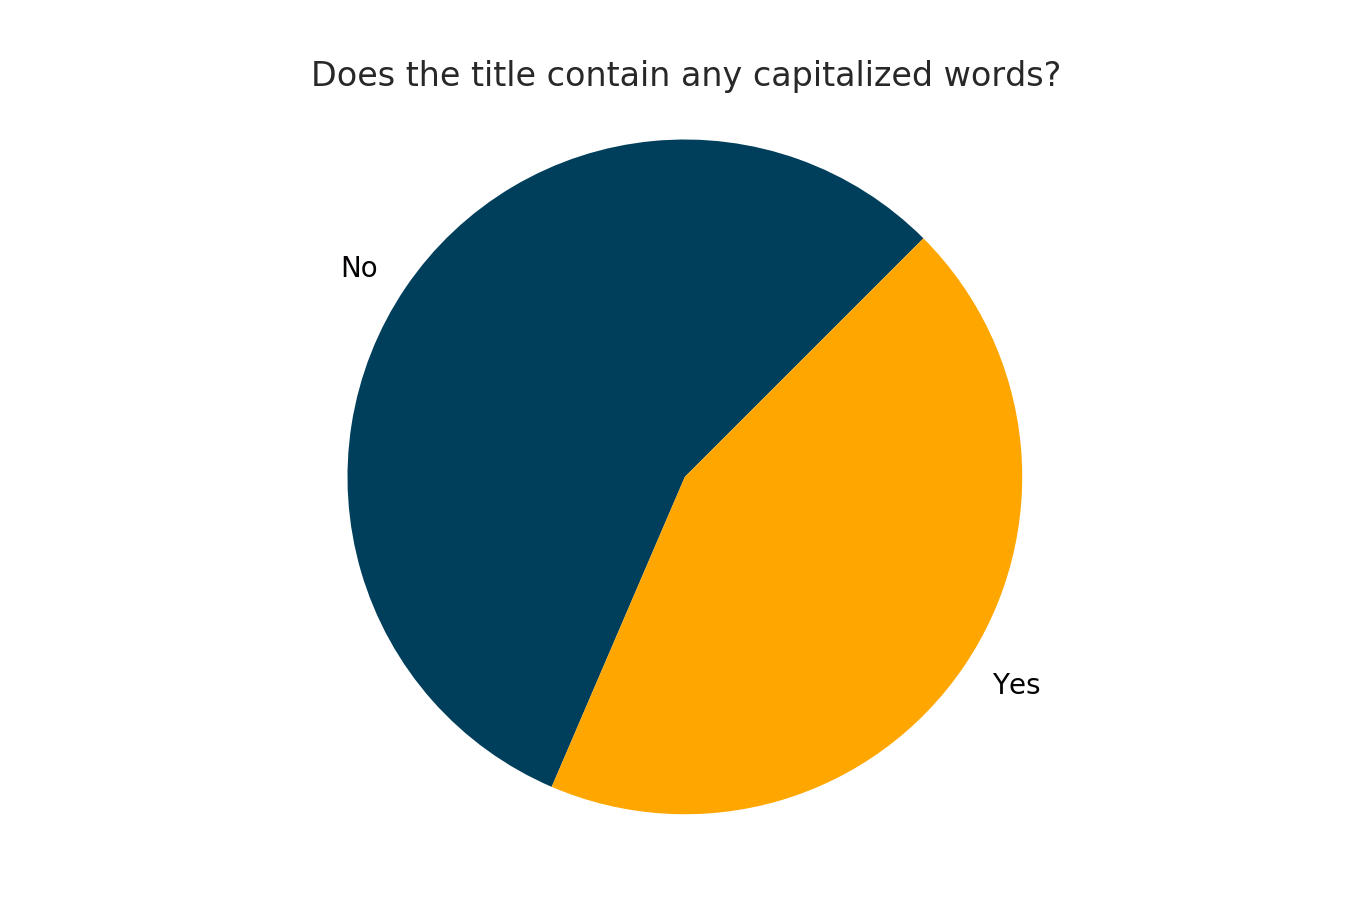

In [90]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()

ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')

ax.set_title('Does the title contain any capitalized words?');

In [91]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

In [96]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 11452), ('|', 10663), ('The', 5762), ('the', 3610), ('a', 2566)]

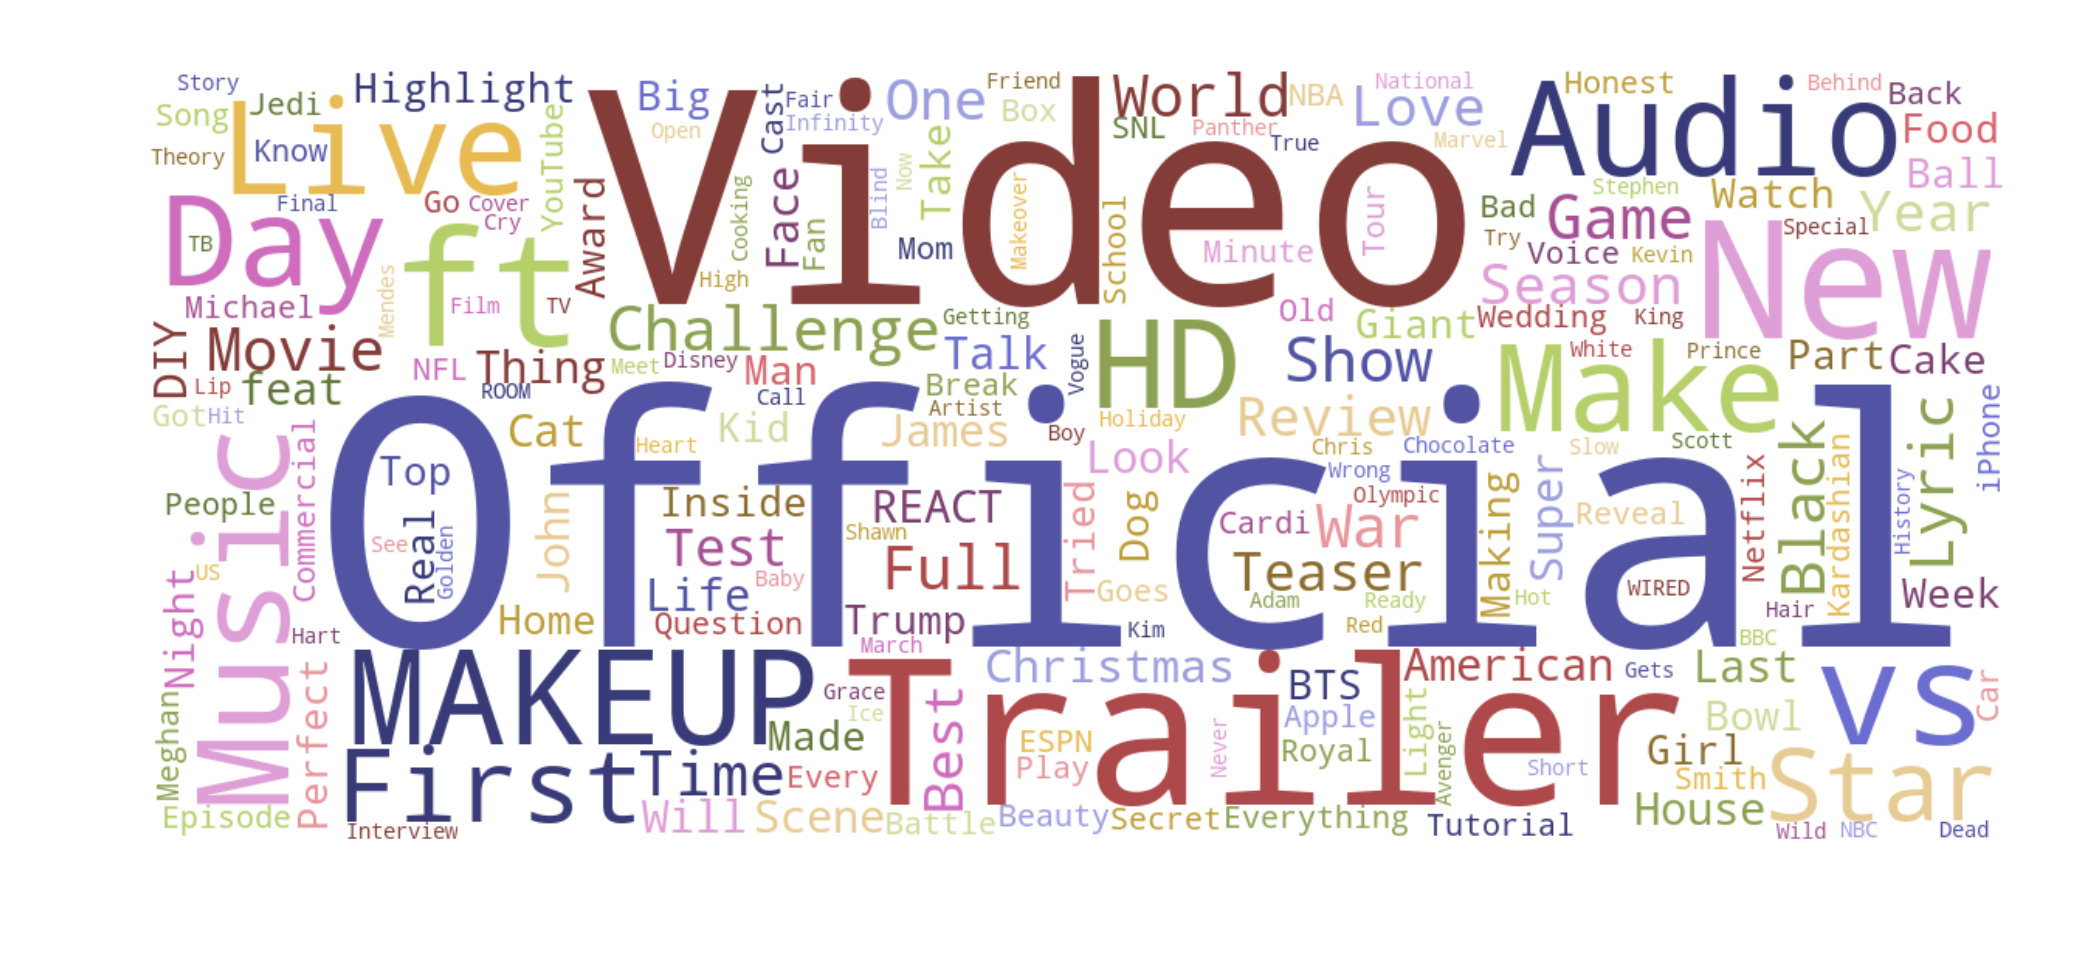

In [97]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

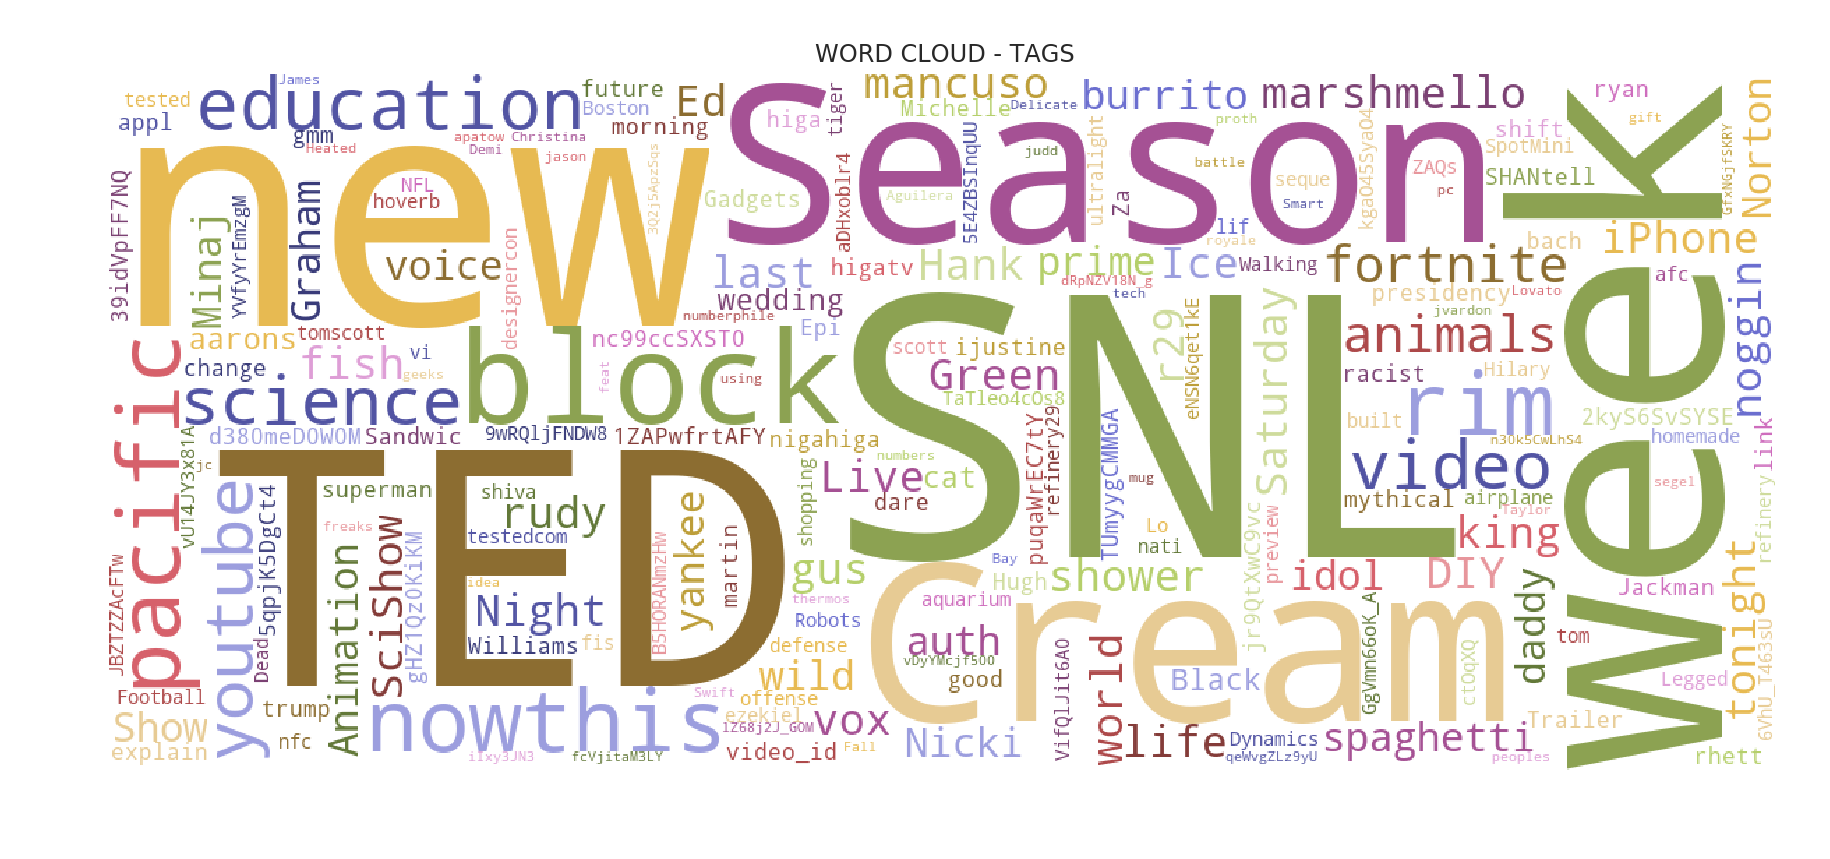

In [102]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['tags']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show();

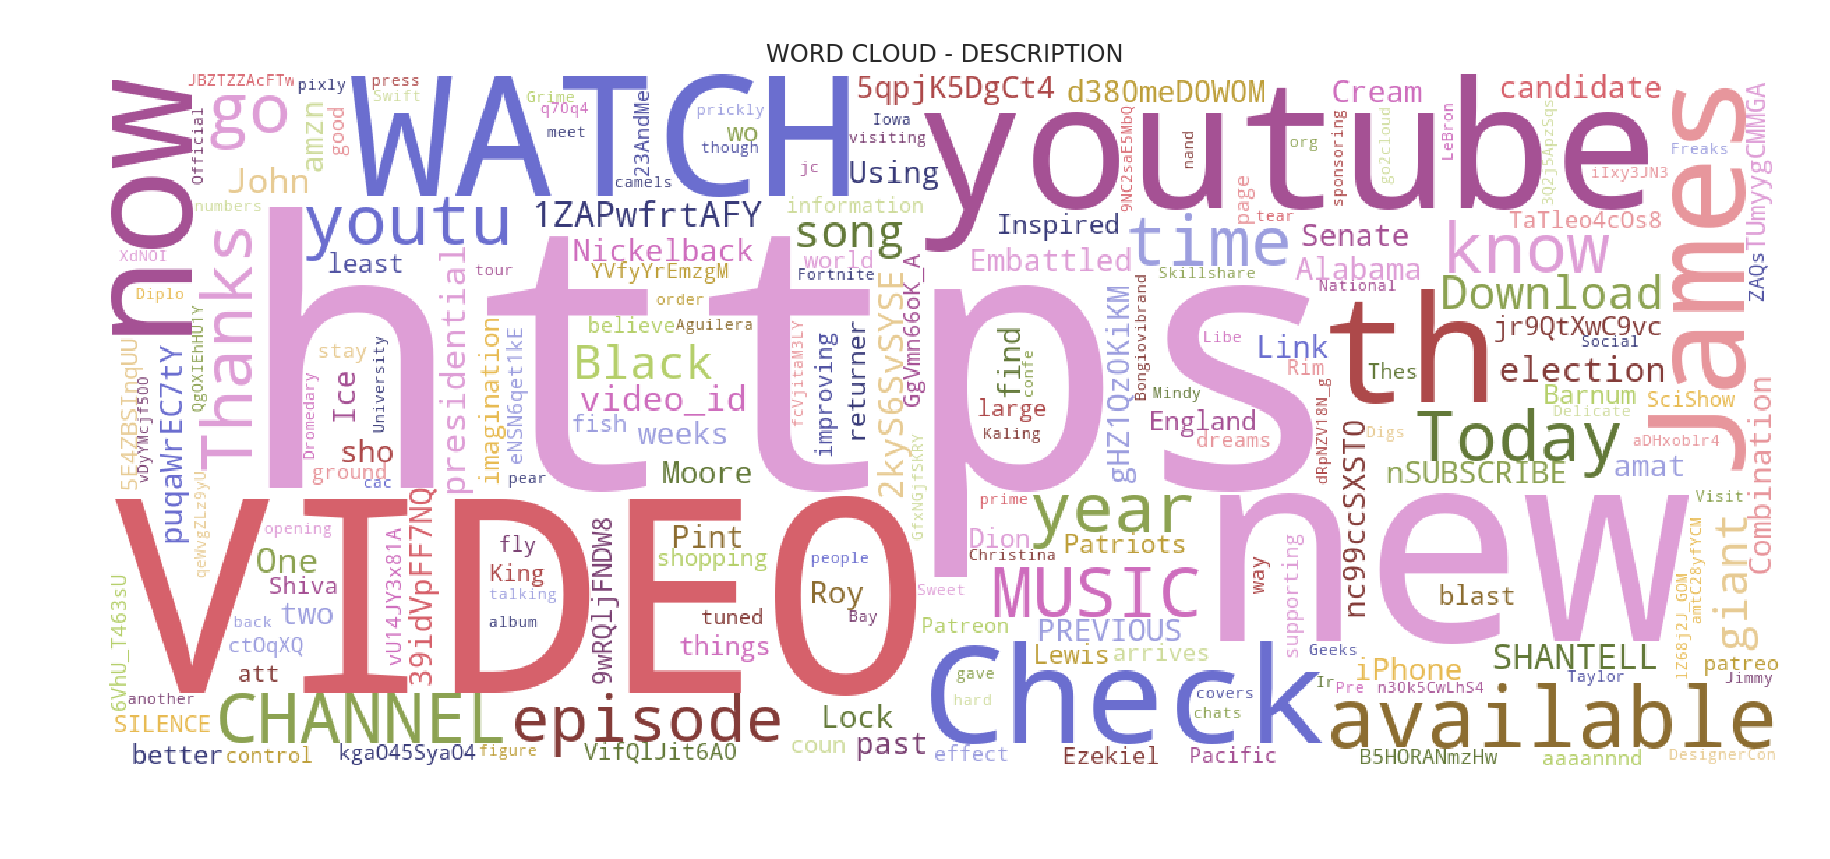

In [104]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show();

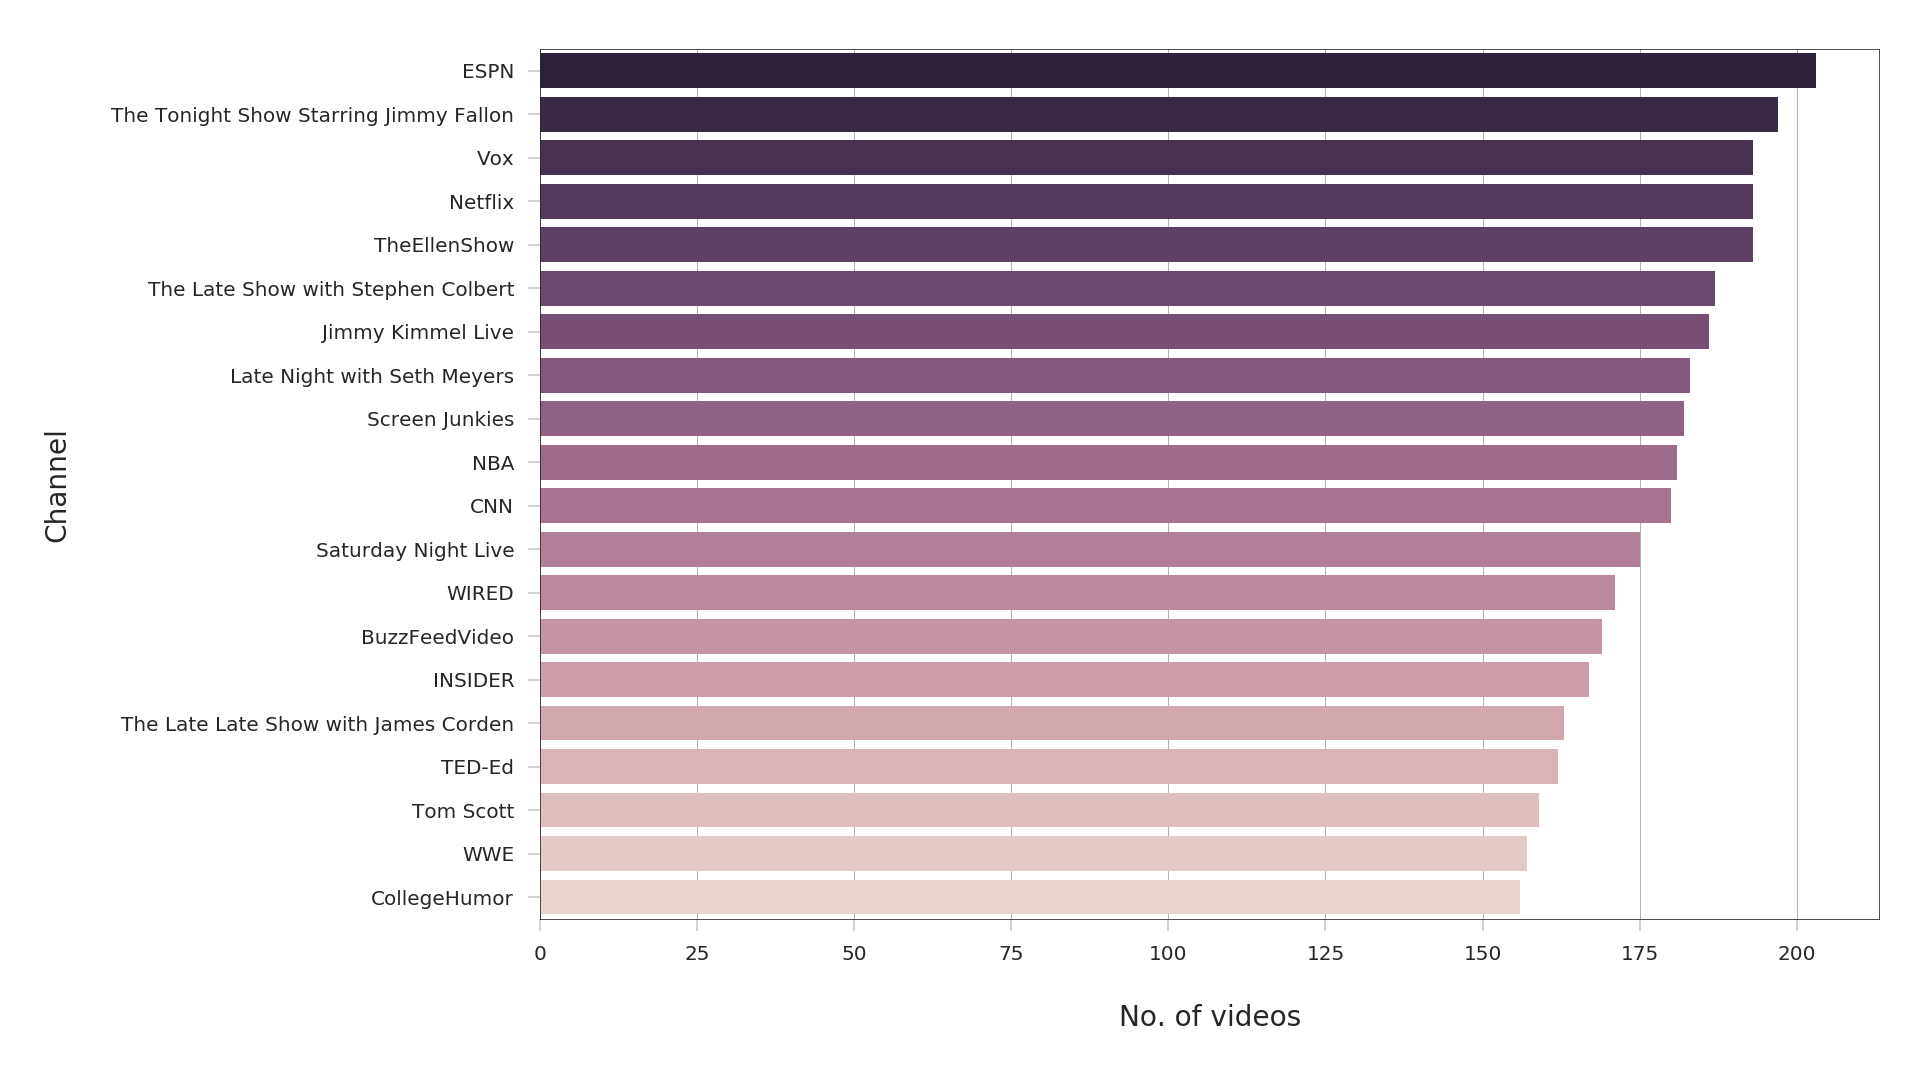

In [105]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

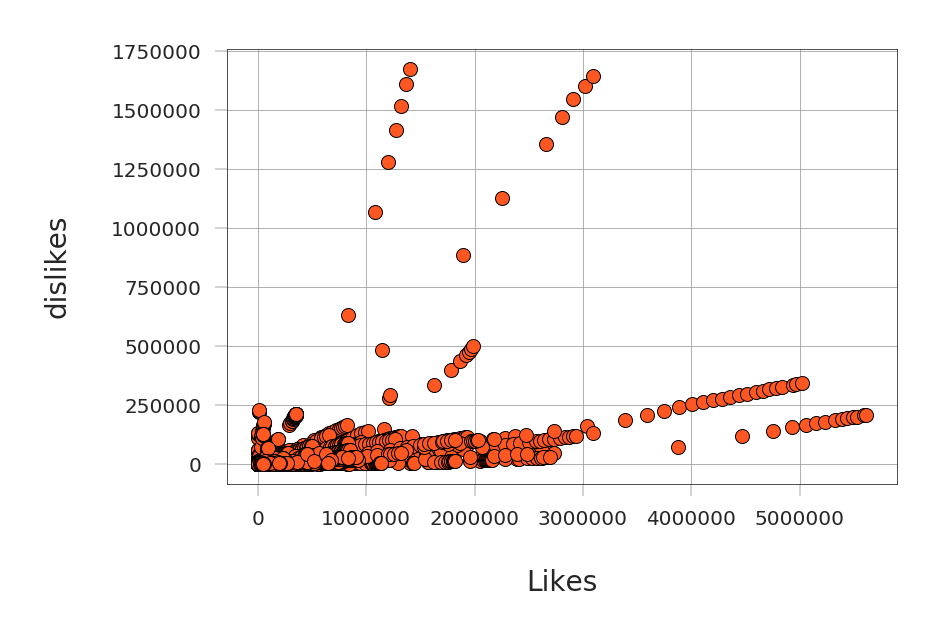

In [106]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="dislikes");

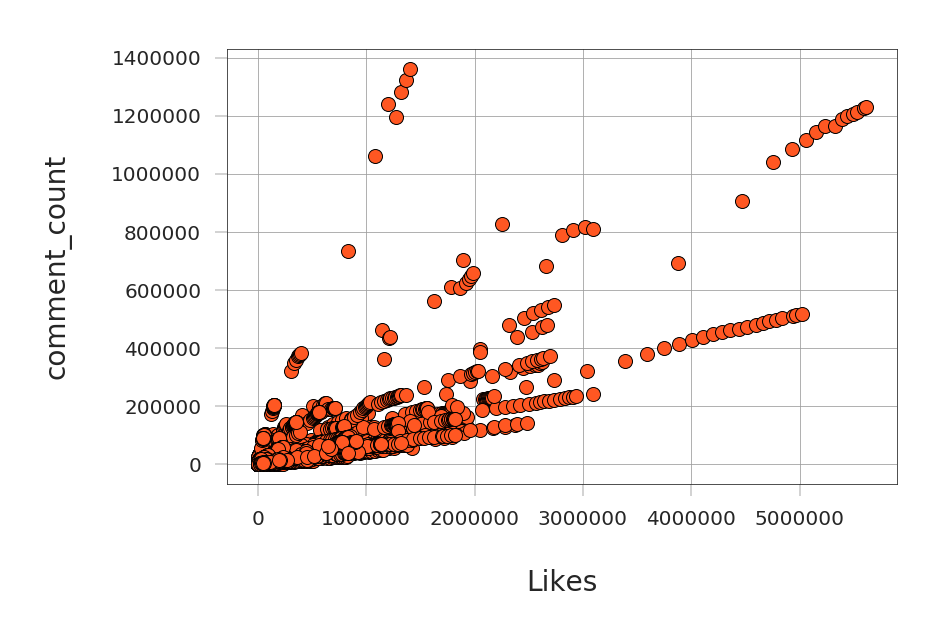

In [107]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

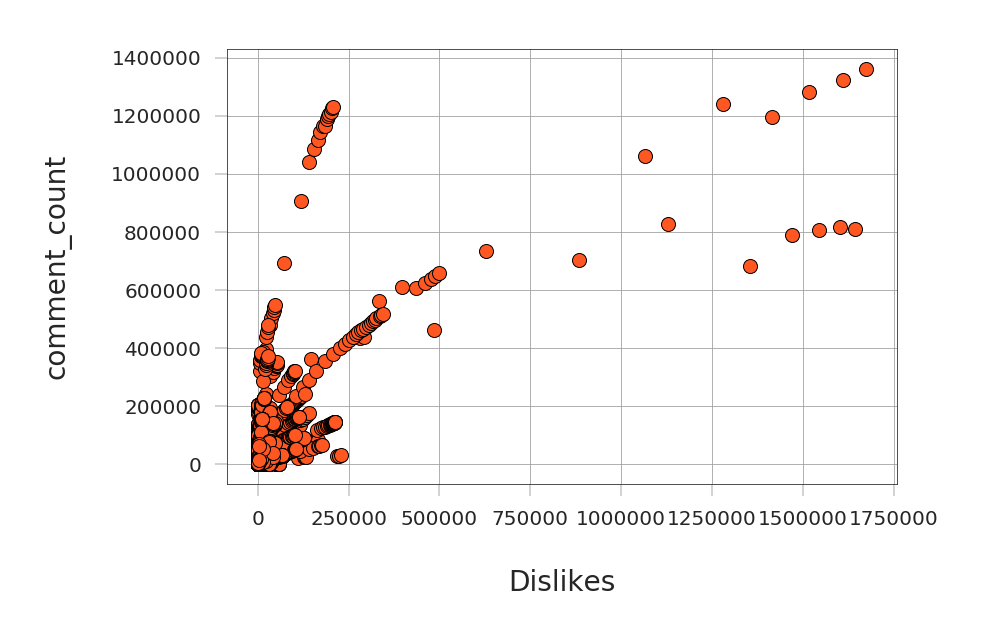

In [108]:
fig, ax = plt.subplots()
plt.scatter(x=df['dislikes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Dislikes", ylabel="comment_count");

Fin.